# Regression Project - House Price Prediction

### Read the dataset

In [1]:
from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
import os
os.chdir('E:/Datasets/')

In [3]:
import pandas as pd
df = pd.read_csv('training_set.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### SalePrice ~ Remaining features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check missing values in dataframe

In [5]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Check duplicates in dataframe

In [6]:
df.duplicated().sum()

0

### Drop any statistically insignificant features

In [7]:
df = df.drop(columns=['Id'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### Seperate Cat and Con features

In [8]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [9]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Perform the descriptive analytics

In [11]:
df[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [12]:
df[con].describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

### Perform univariate analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

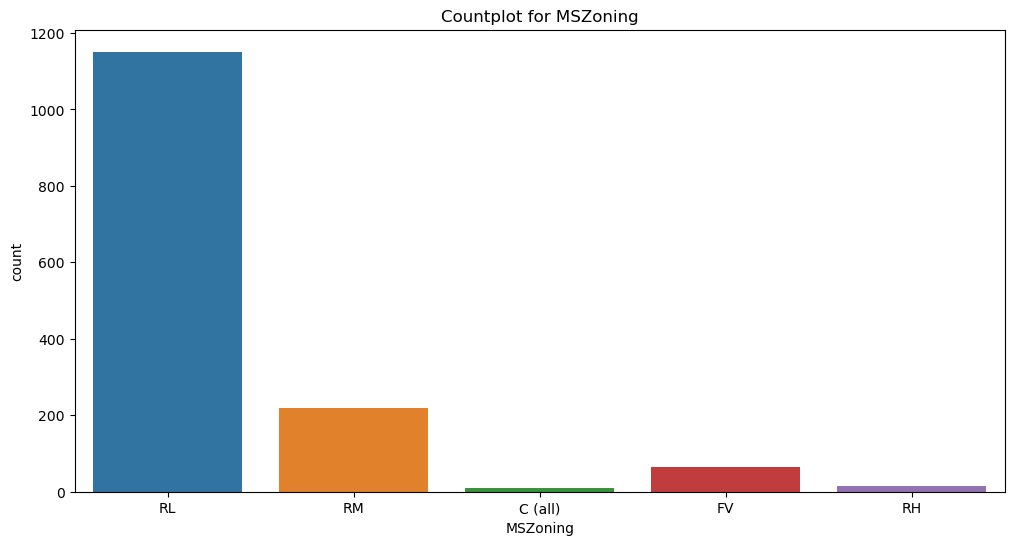

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='MSZoning')
plt.title('Countplot for MSZoning')
plt.show()

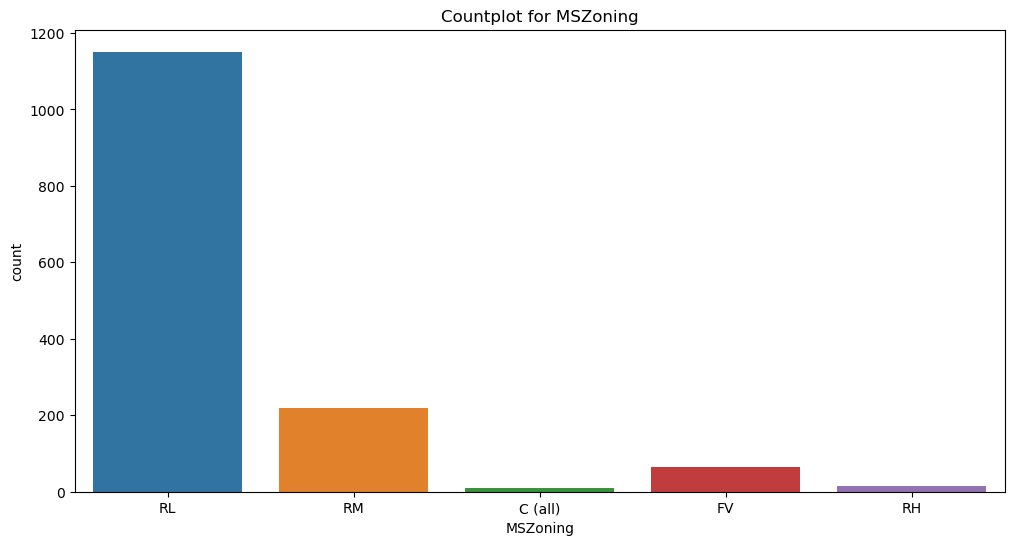

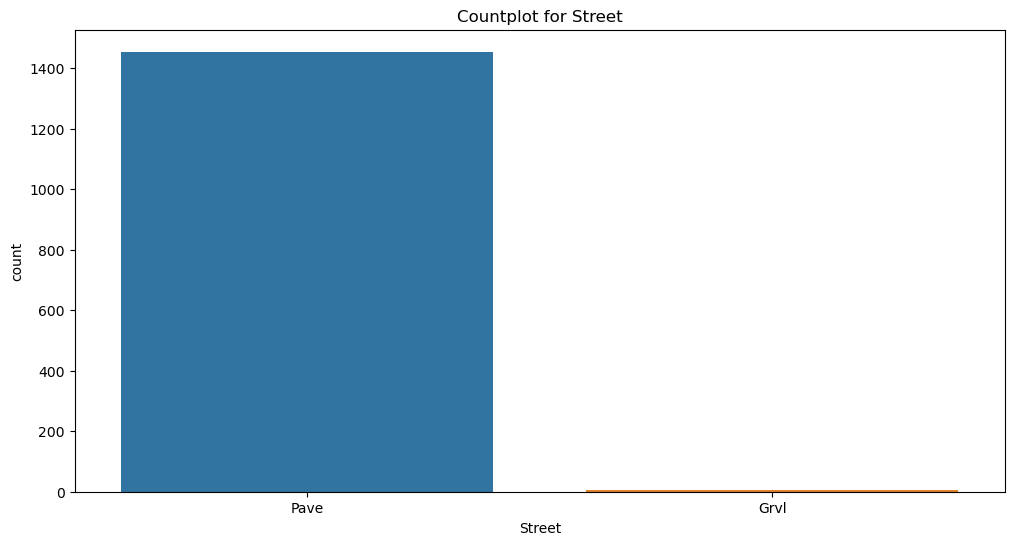

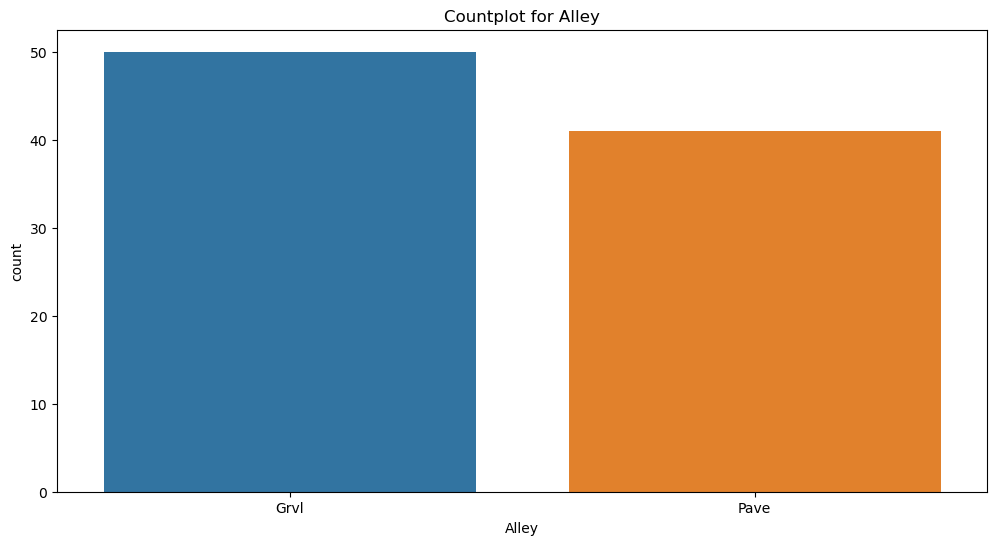

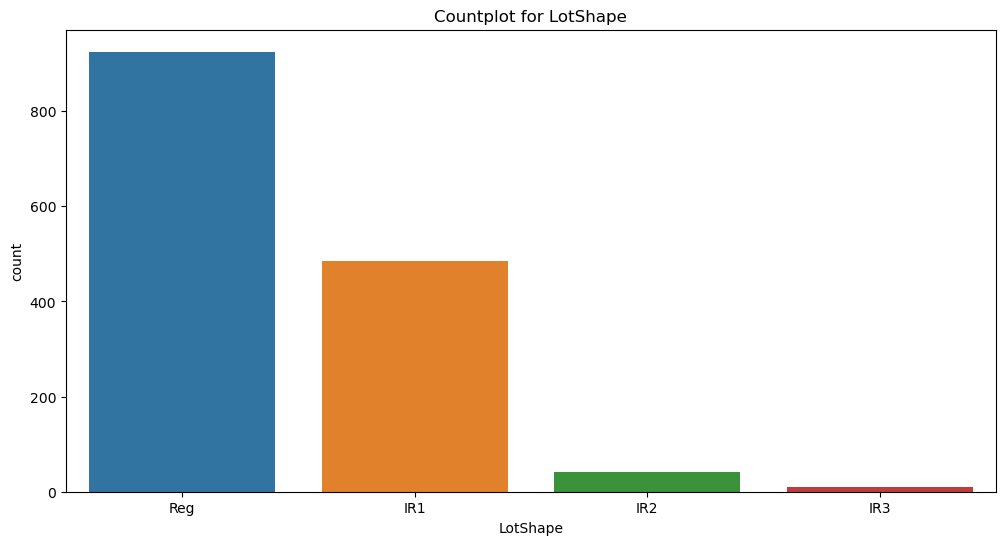

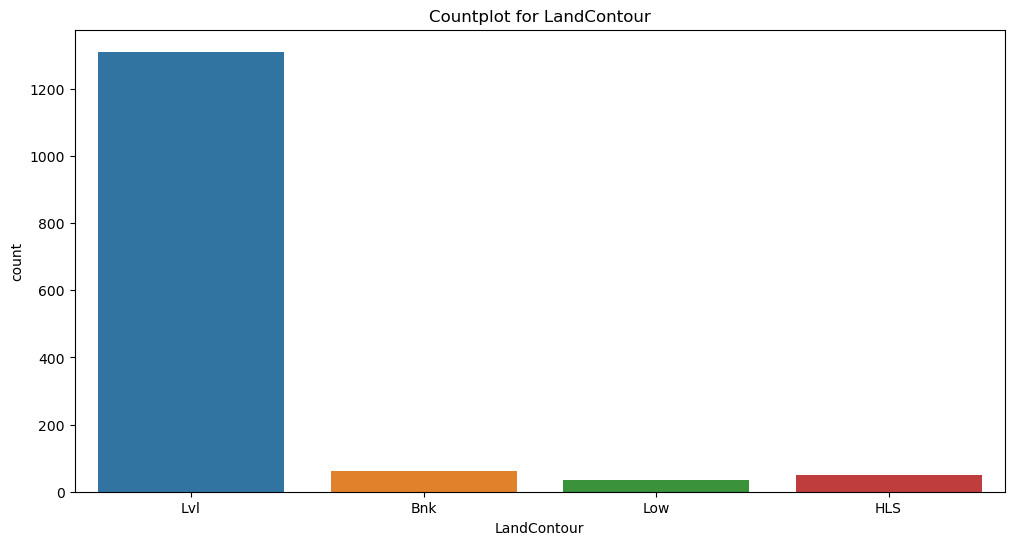

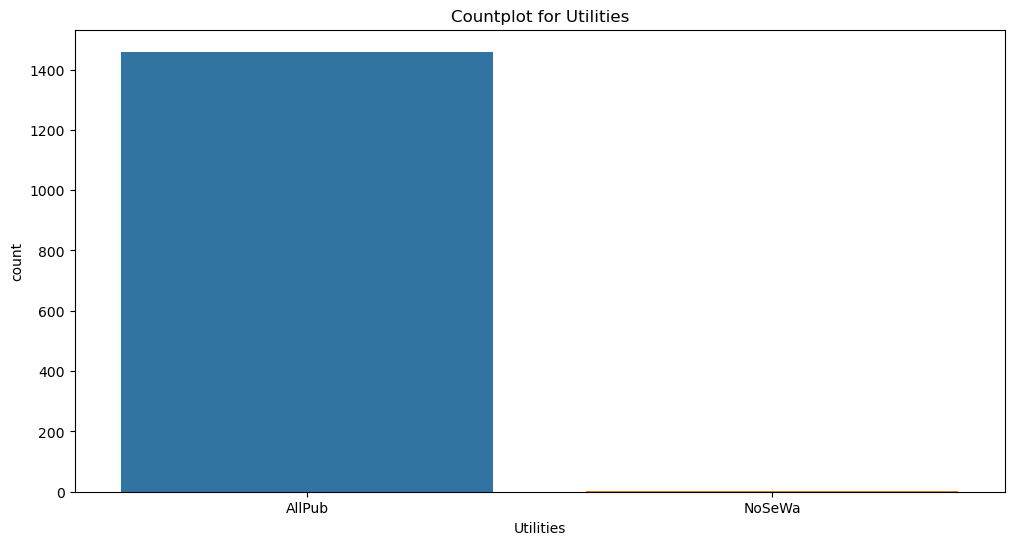

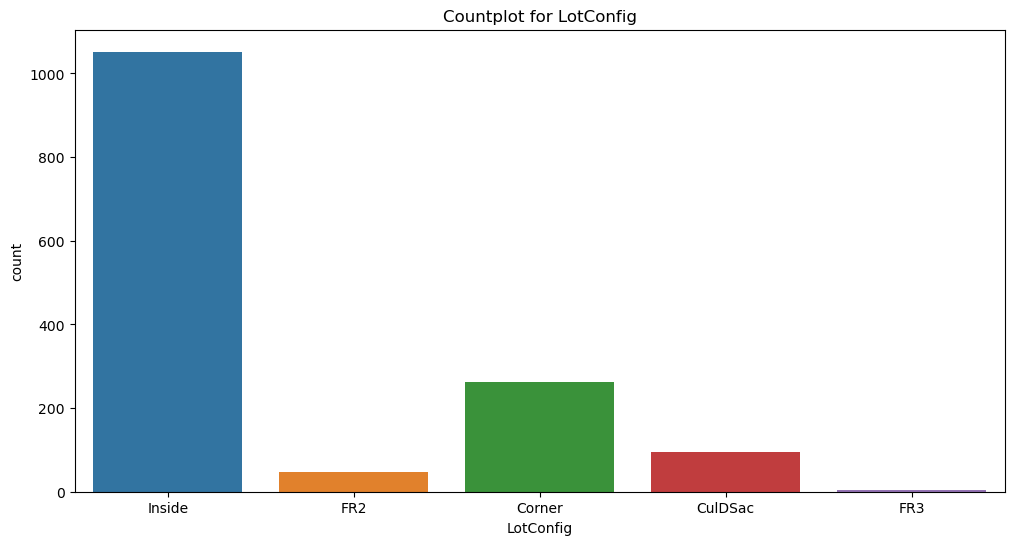

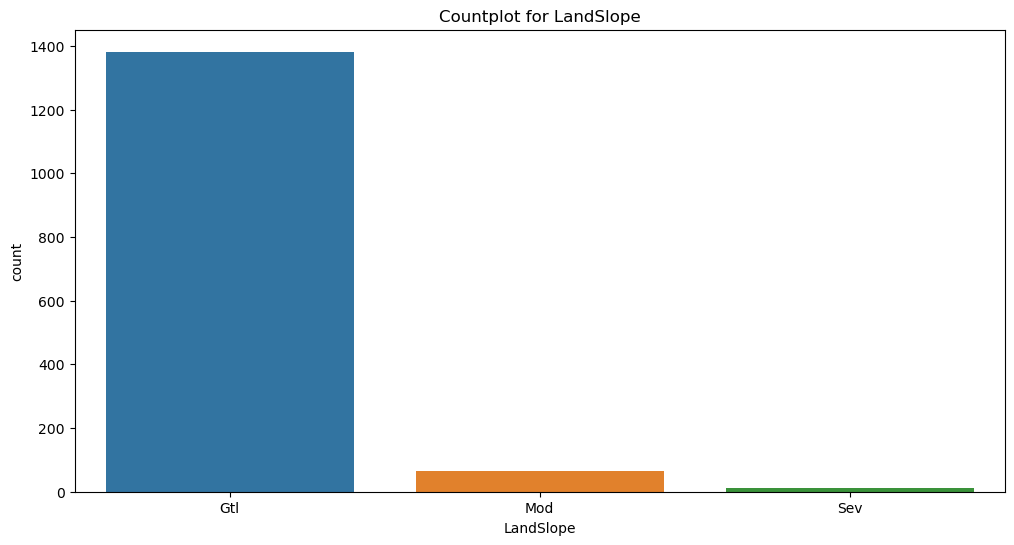

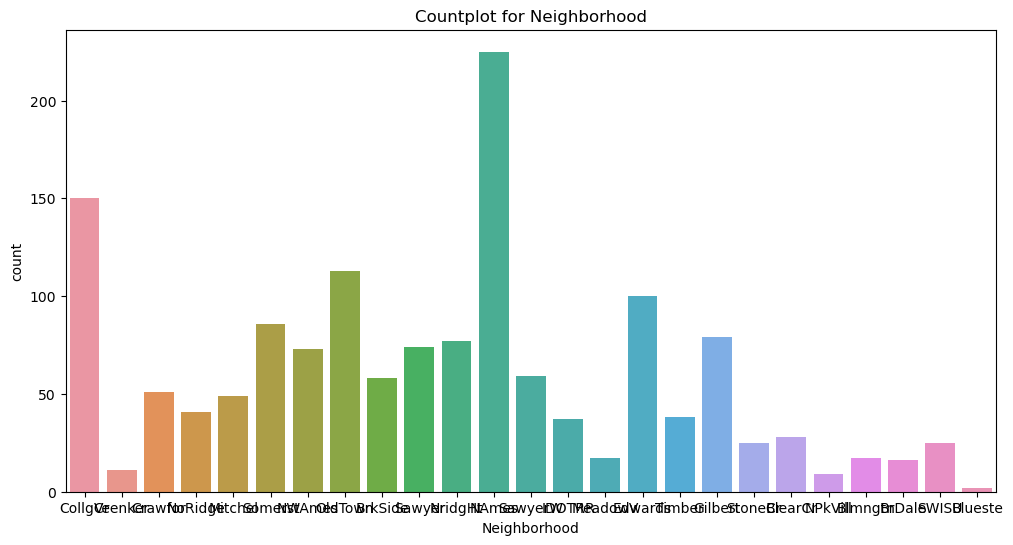

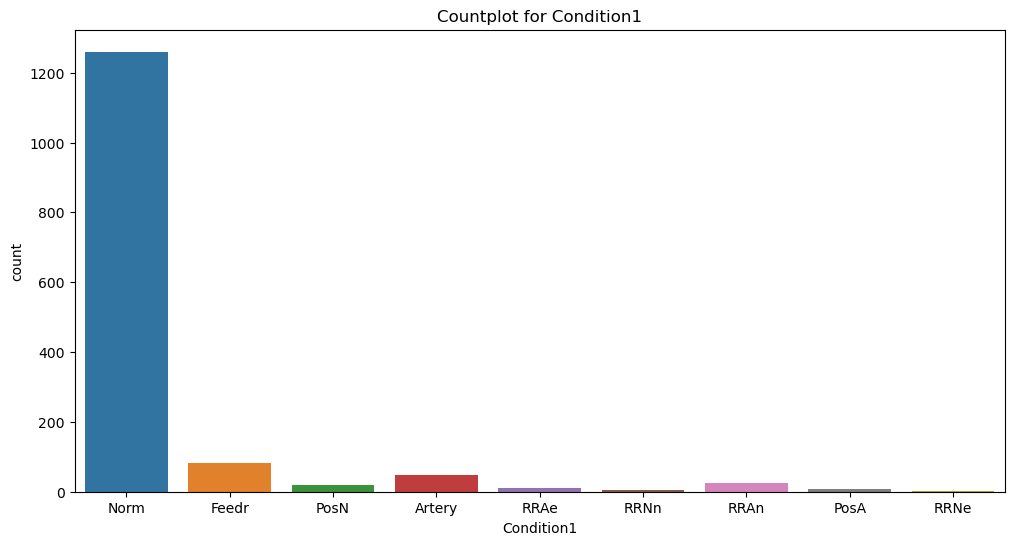

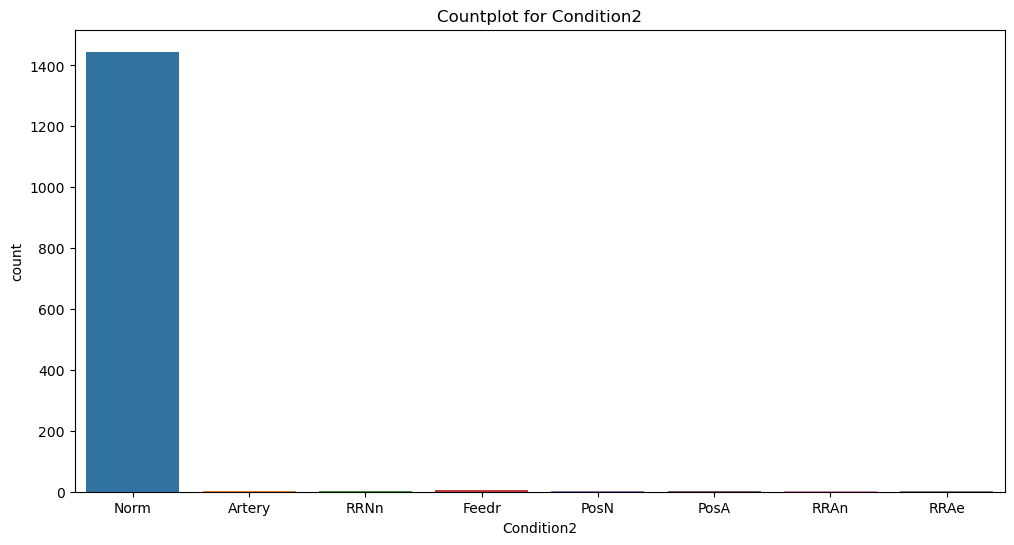

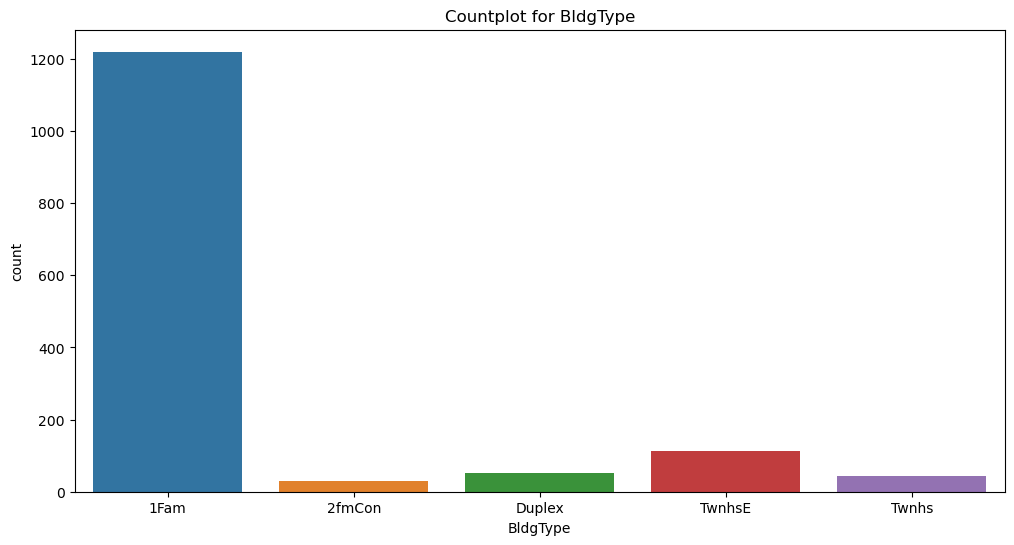

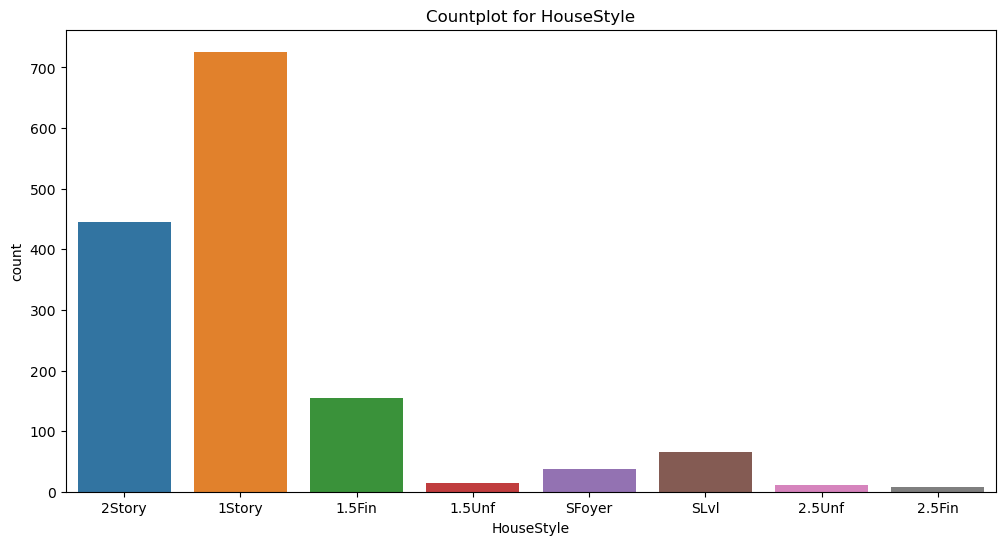

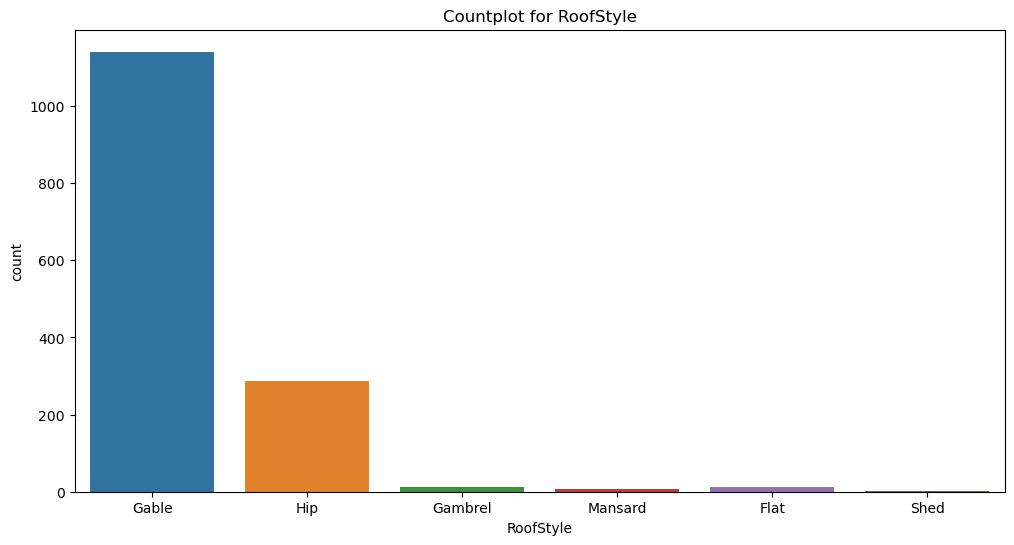

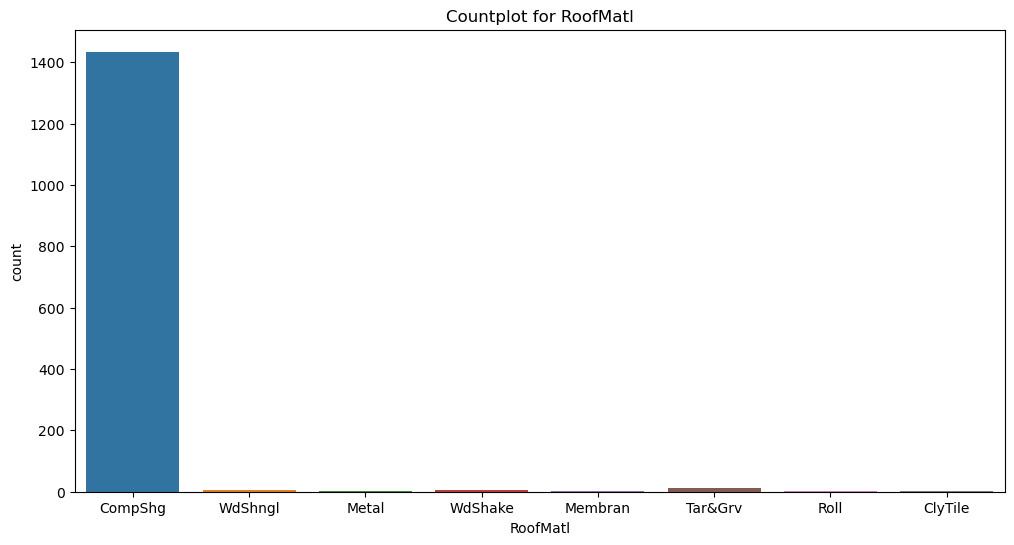

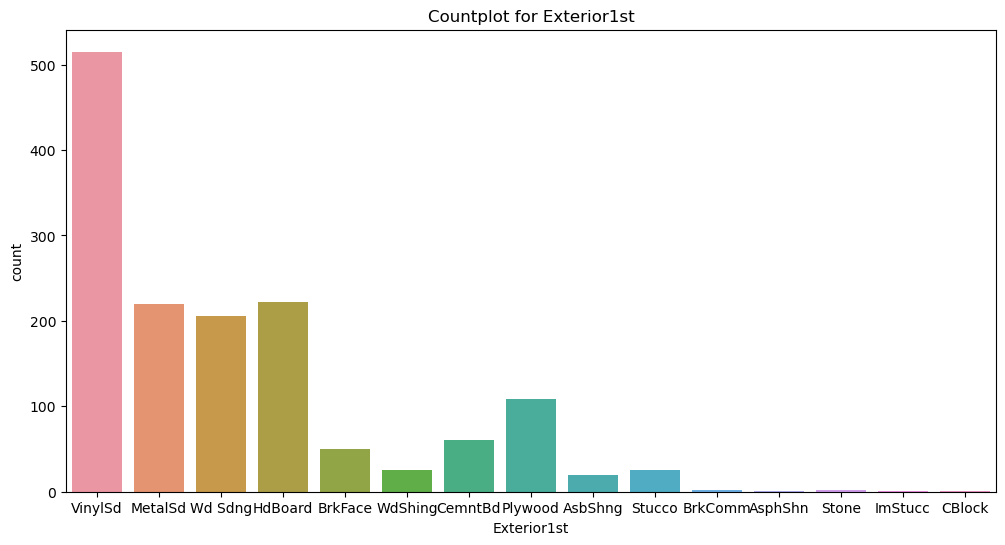

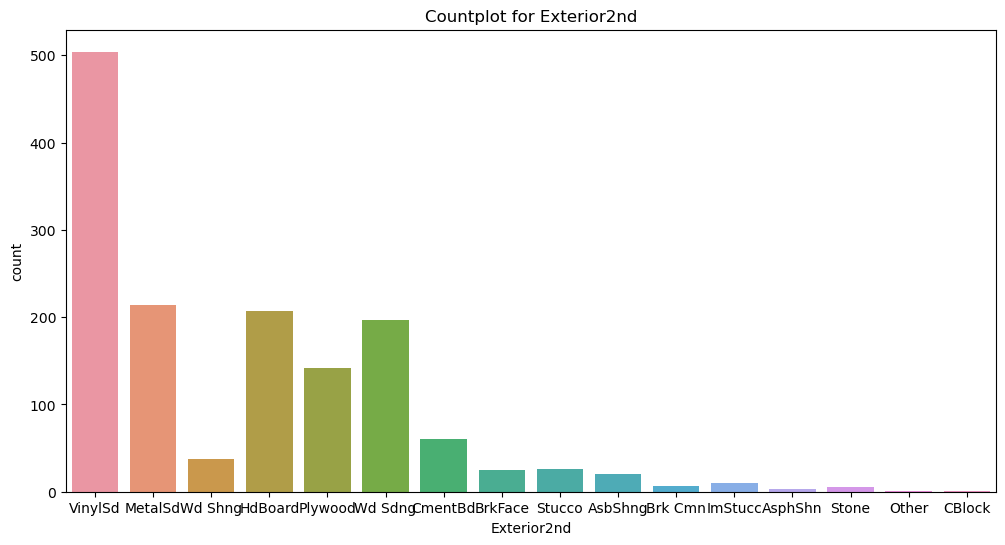

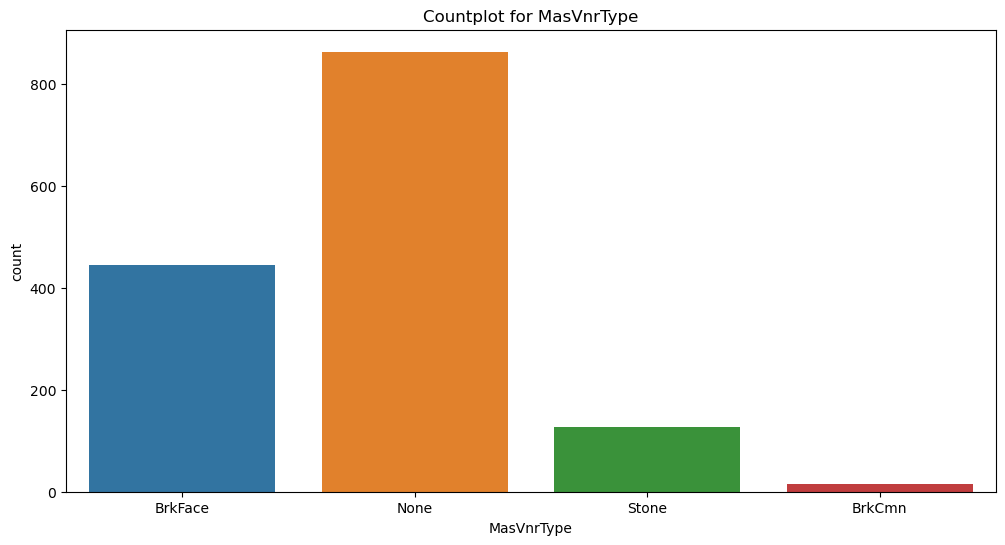

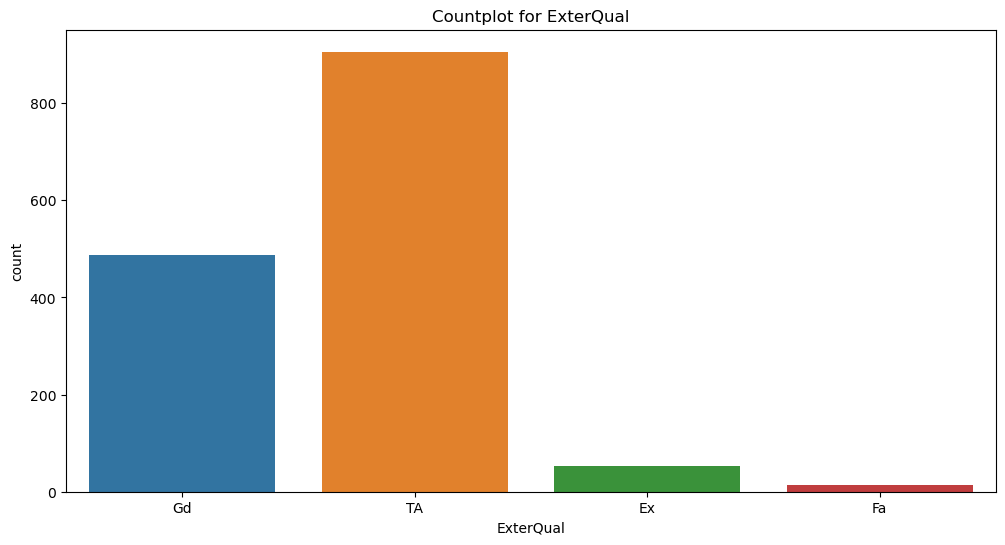

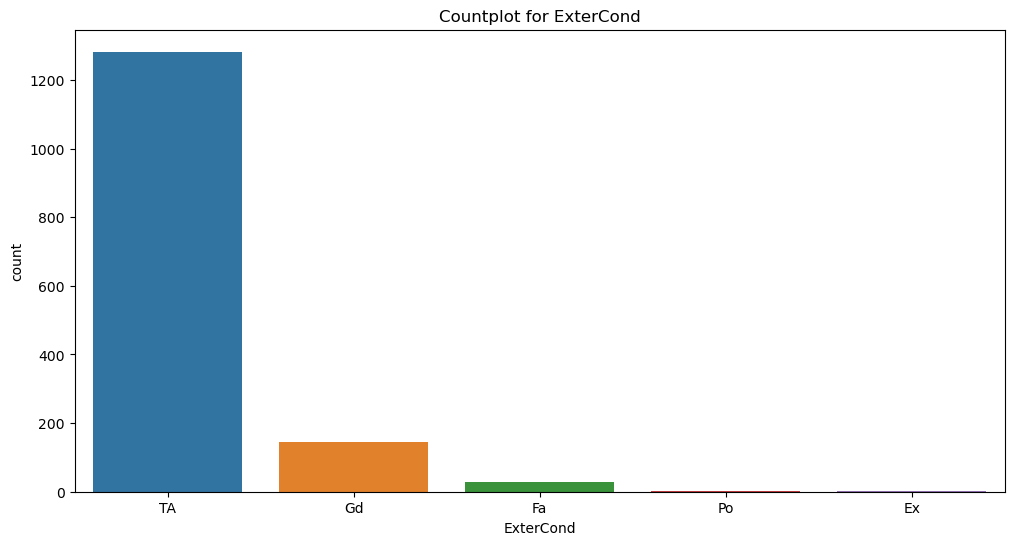

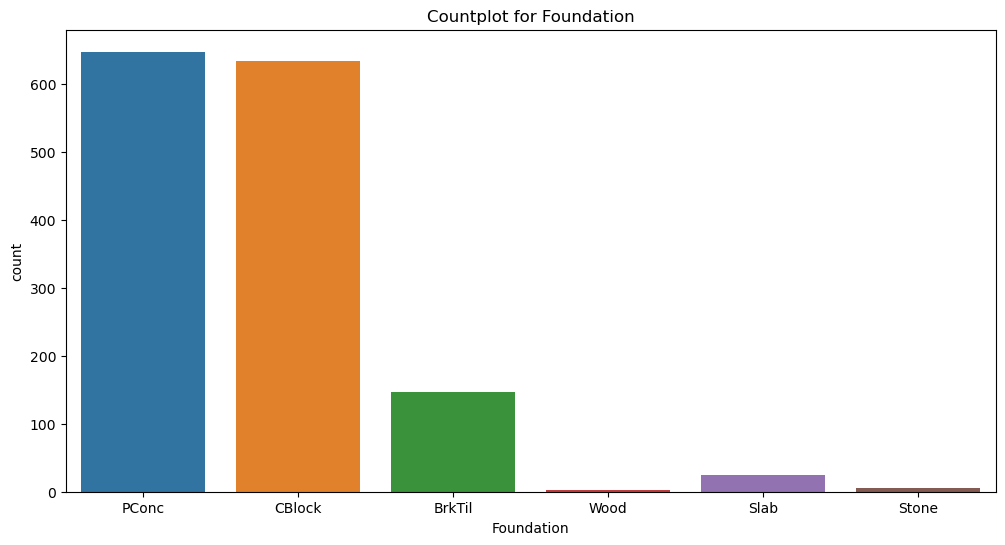

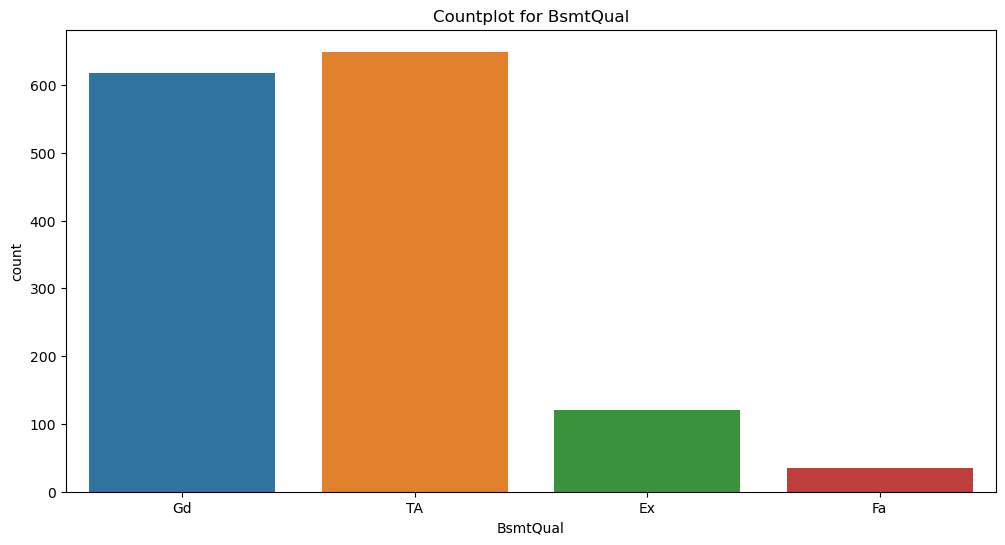

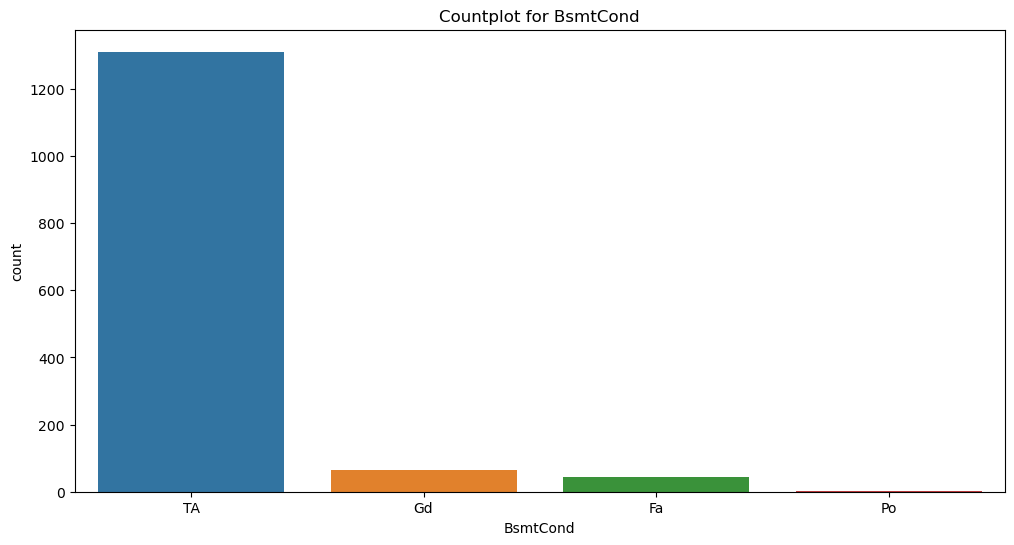

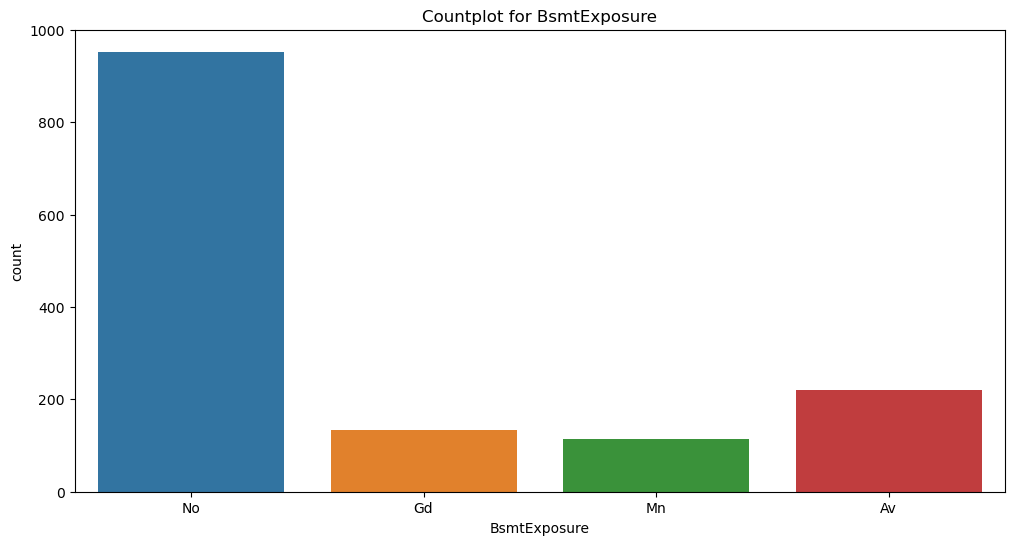

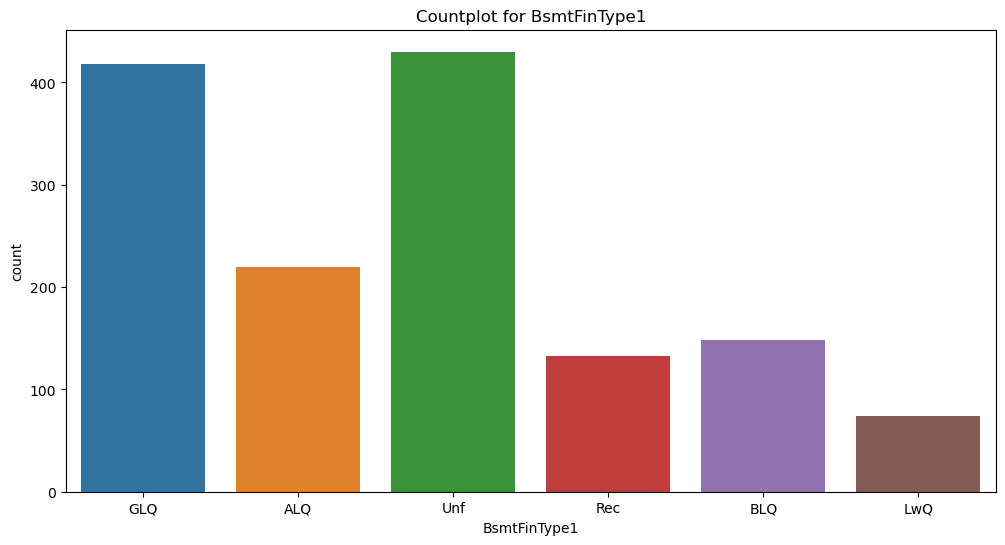

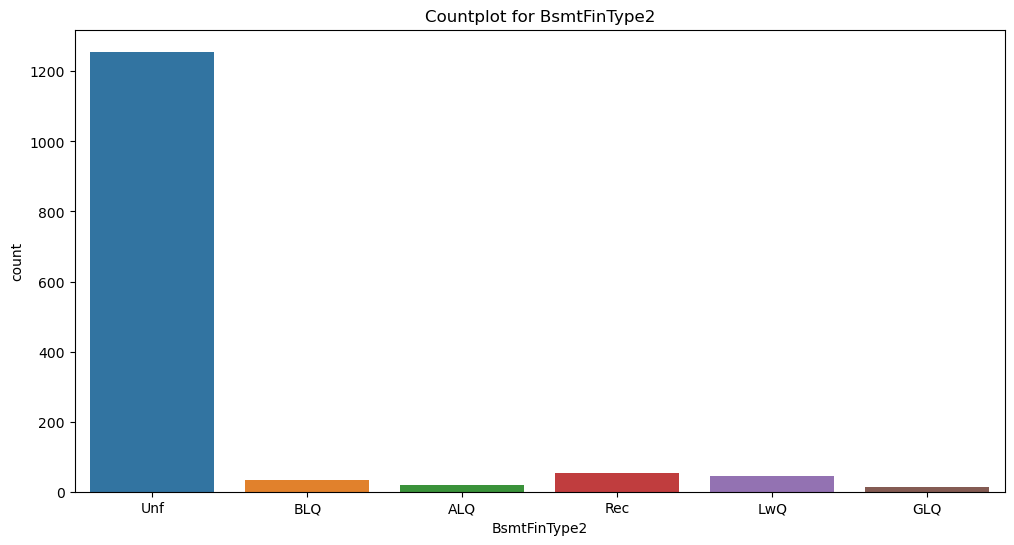

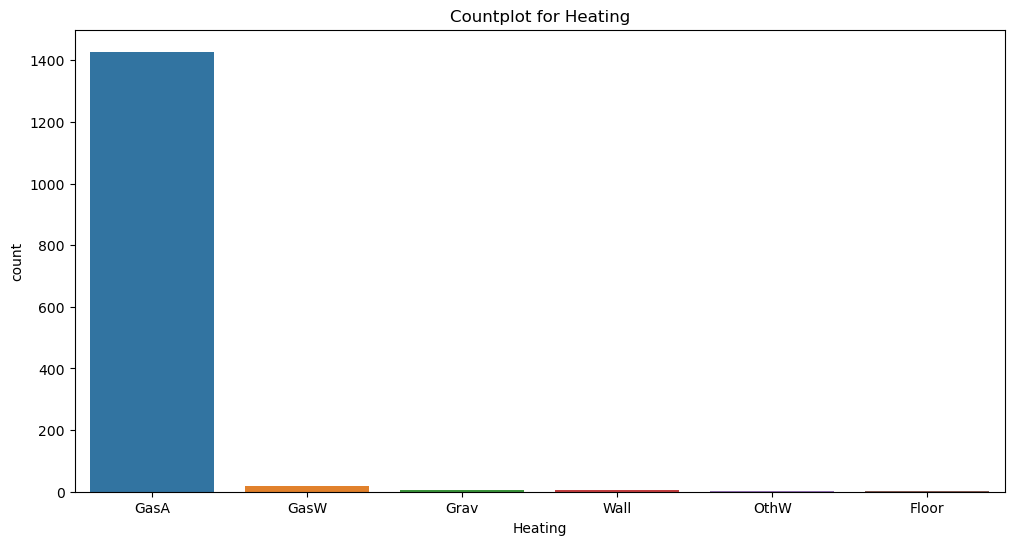

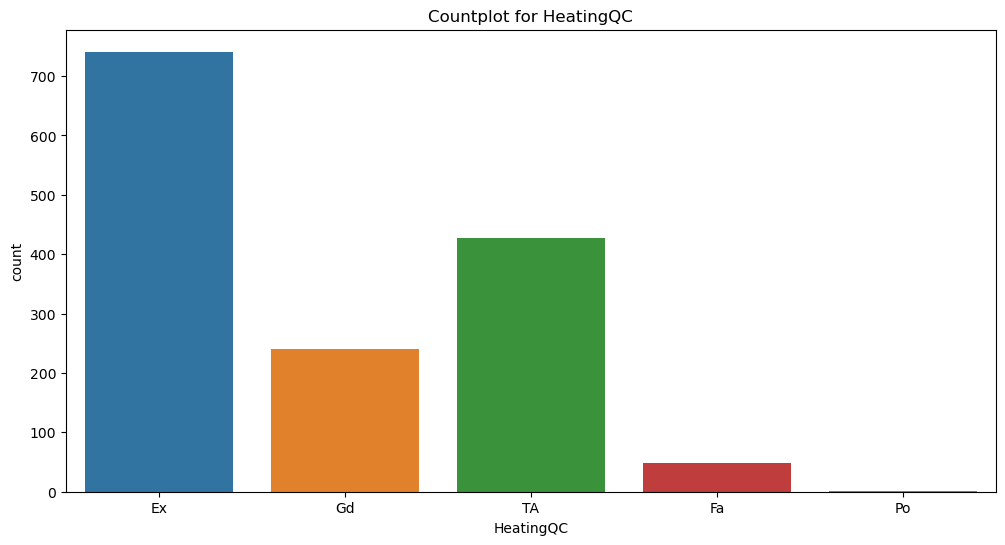

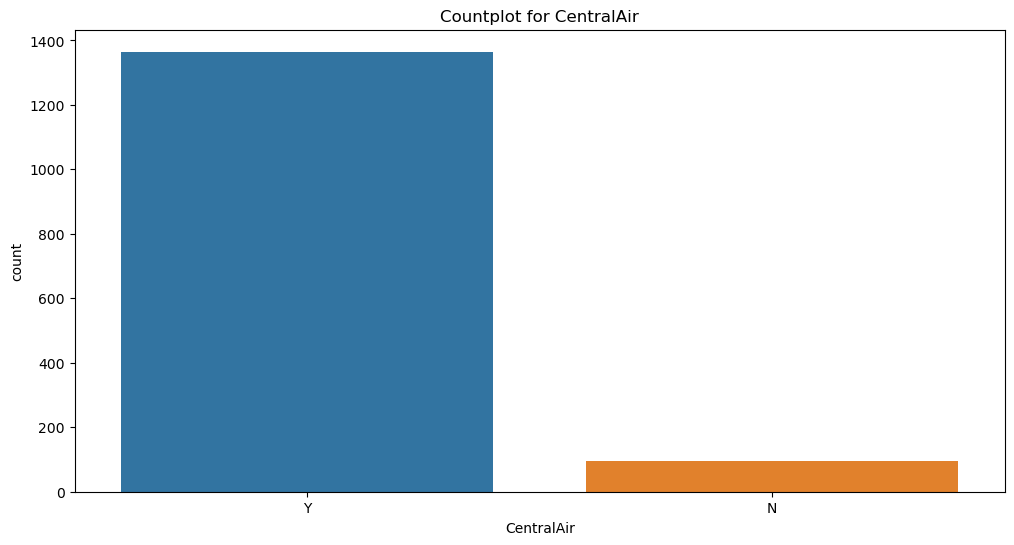

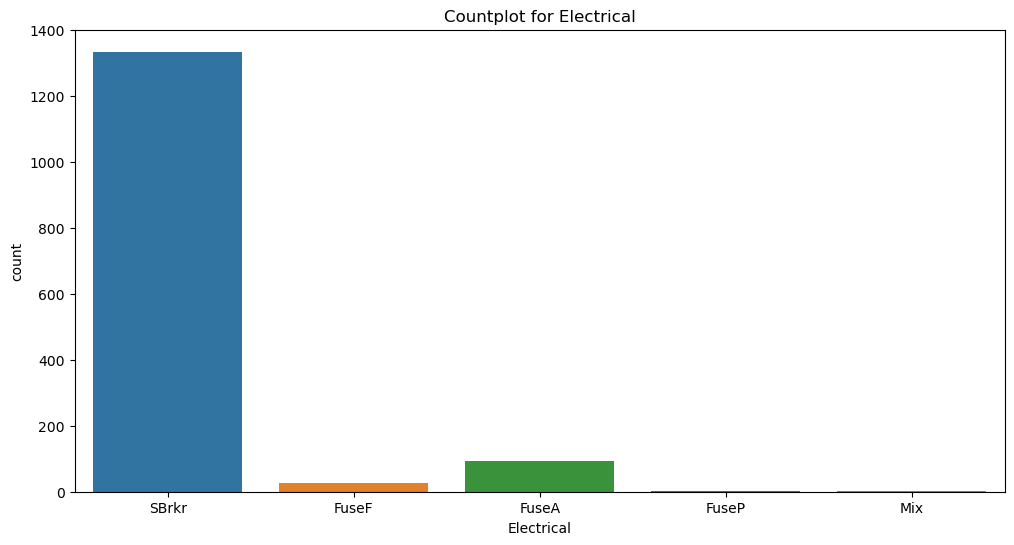

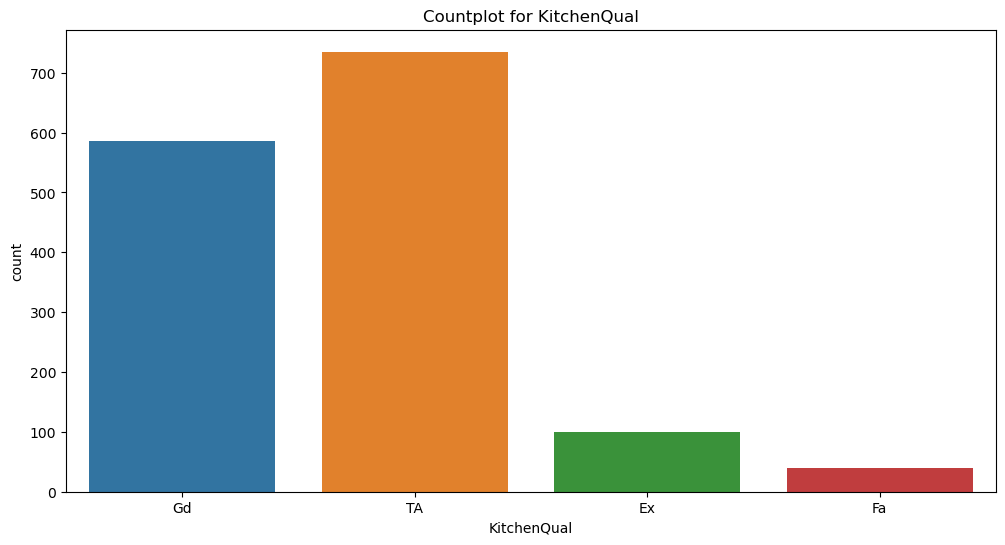

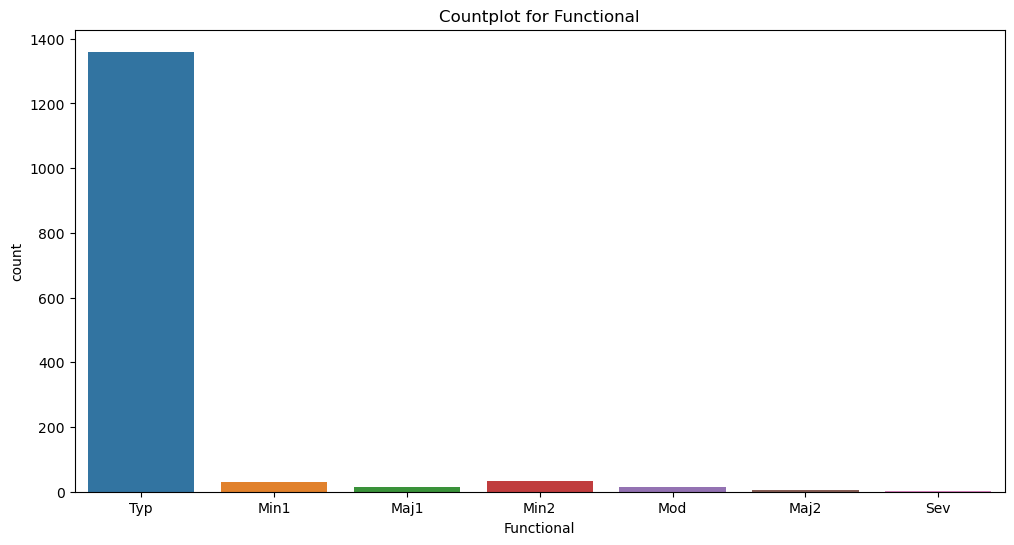

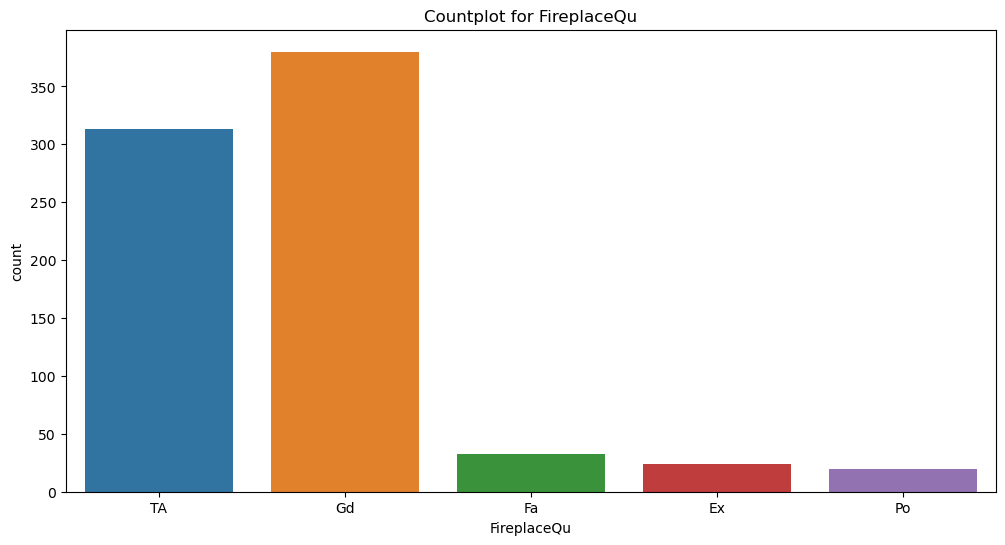

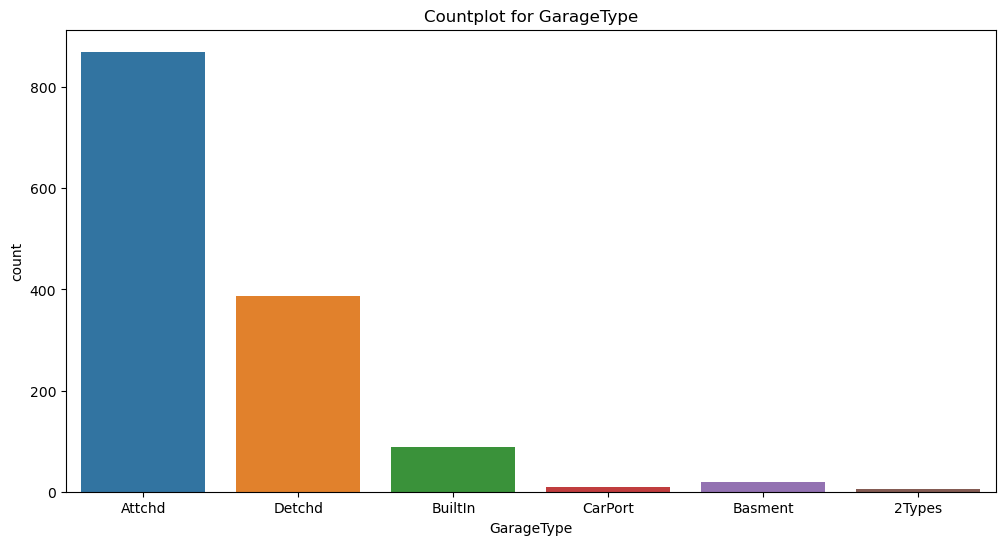

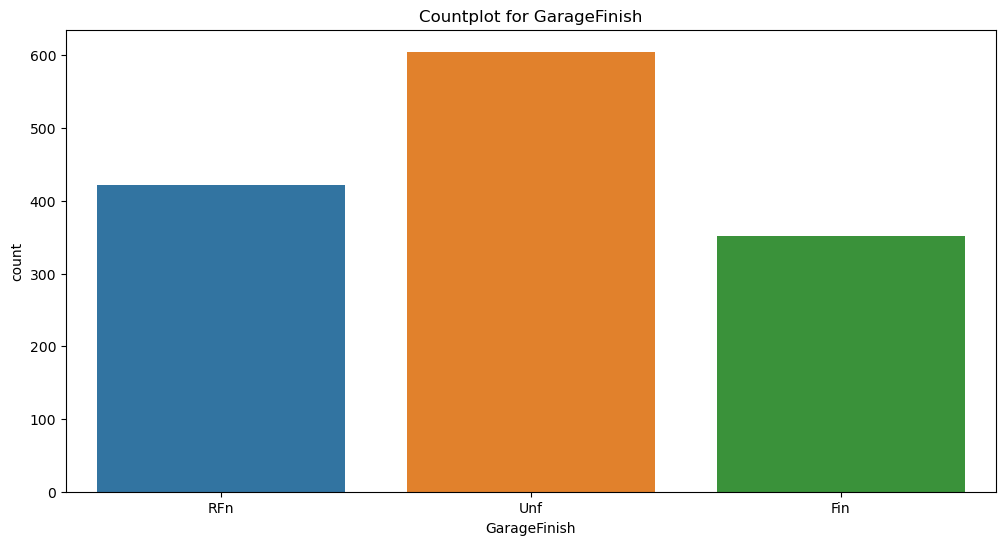

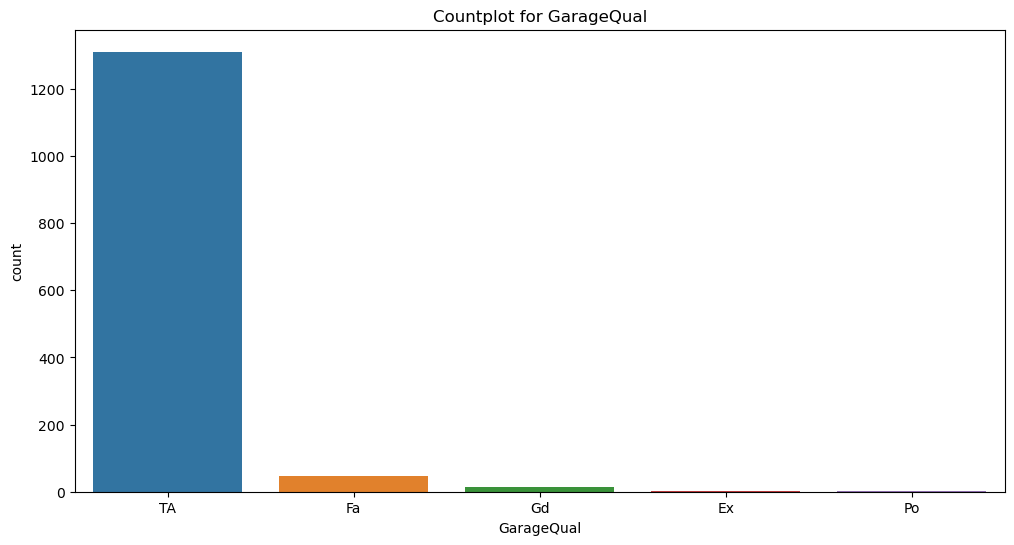

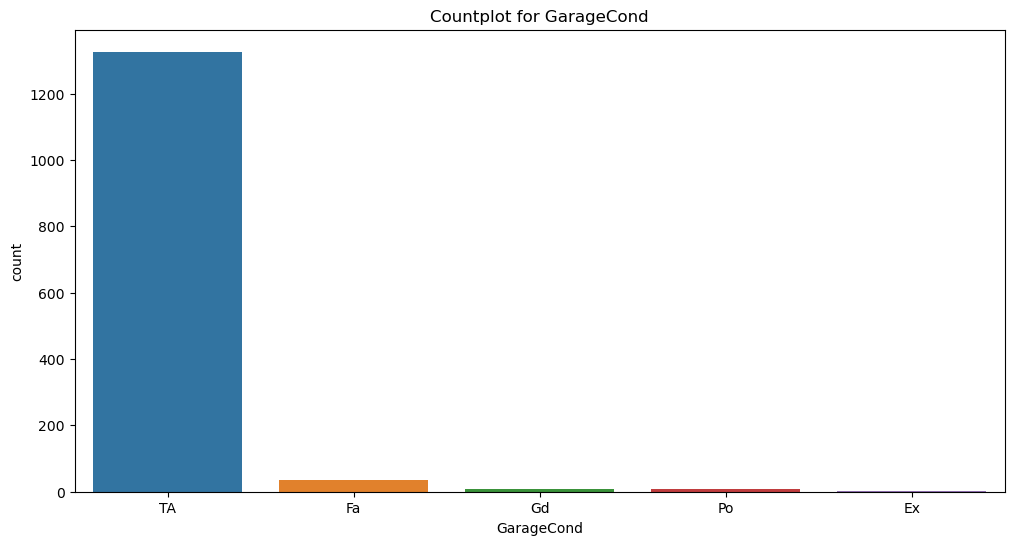

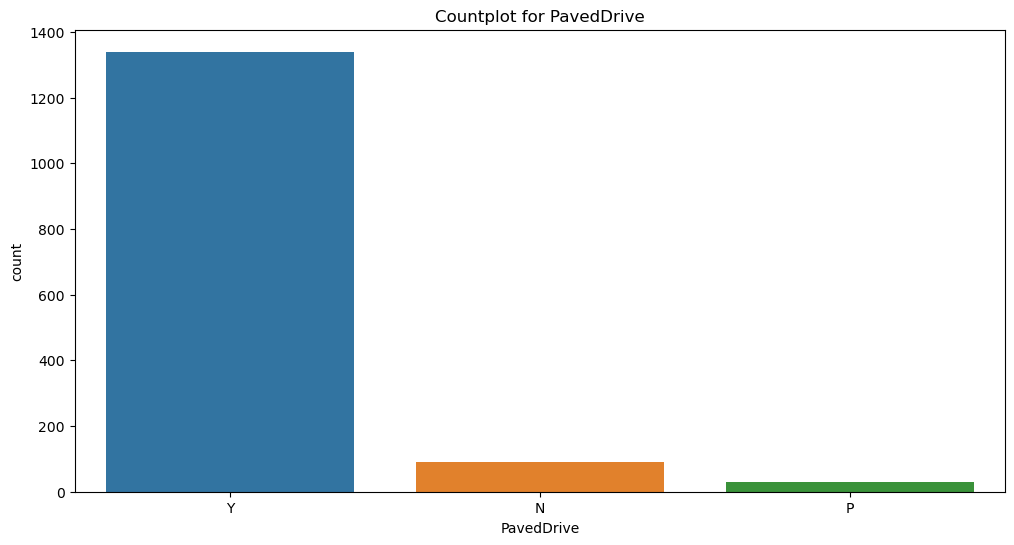

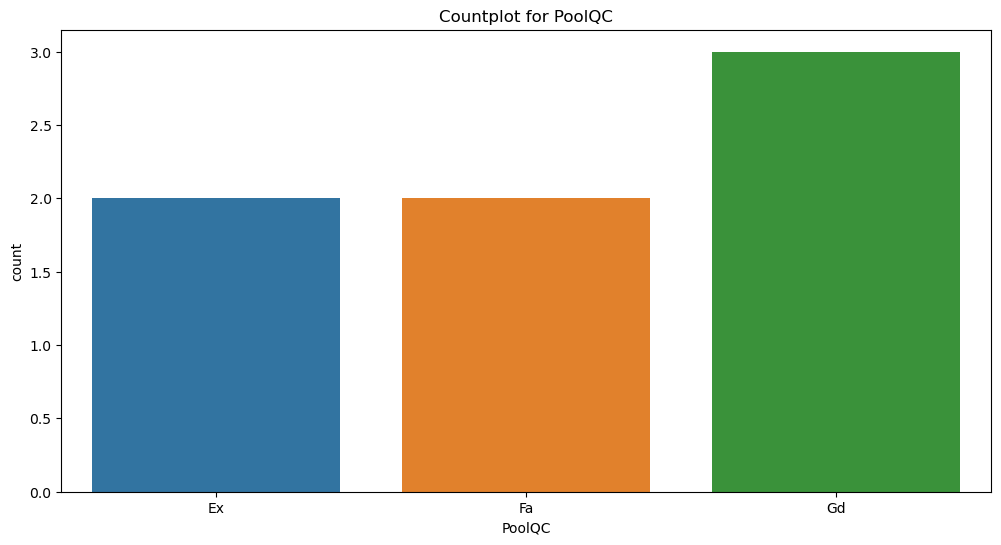

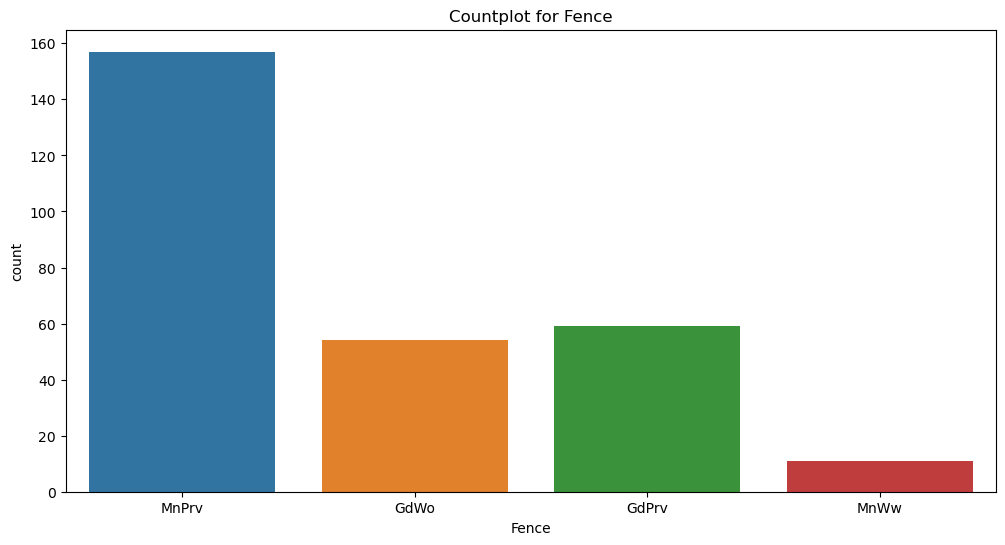

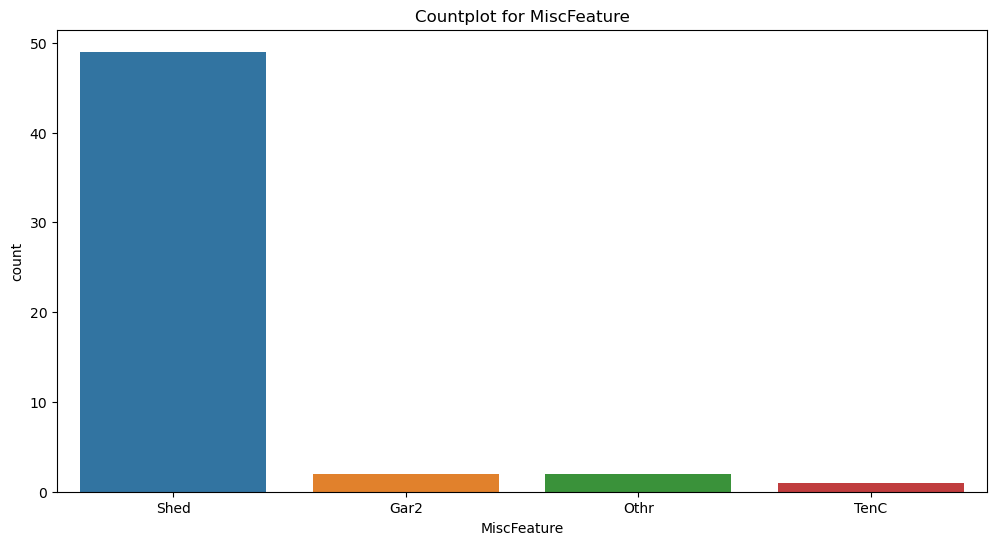

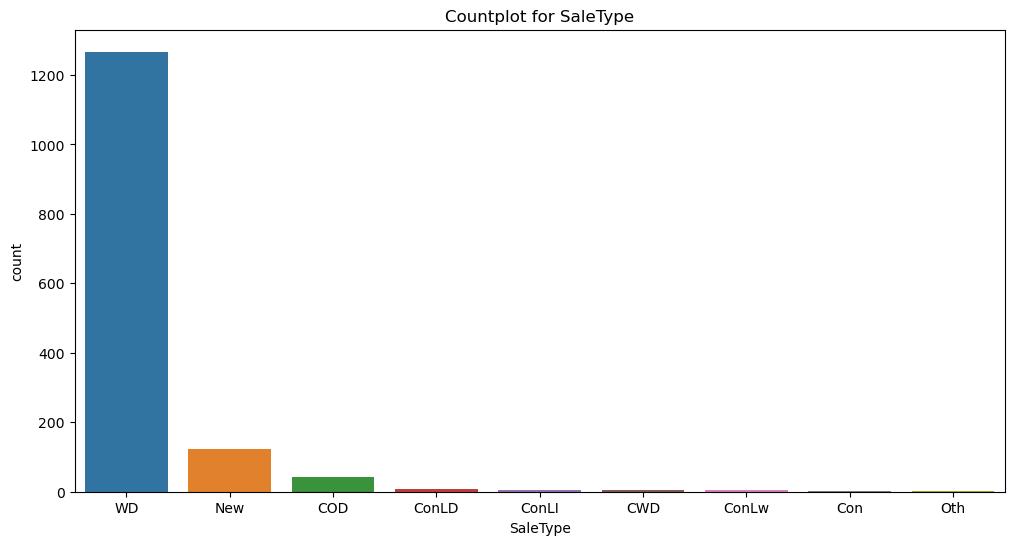

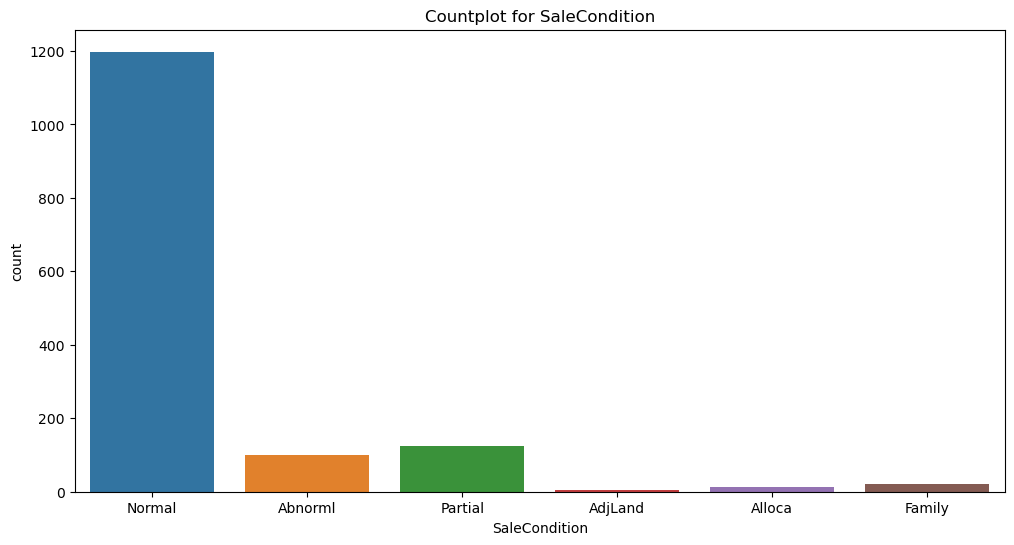

In [15]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot for {i}')
    plt.show()

### Con features - Histogram

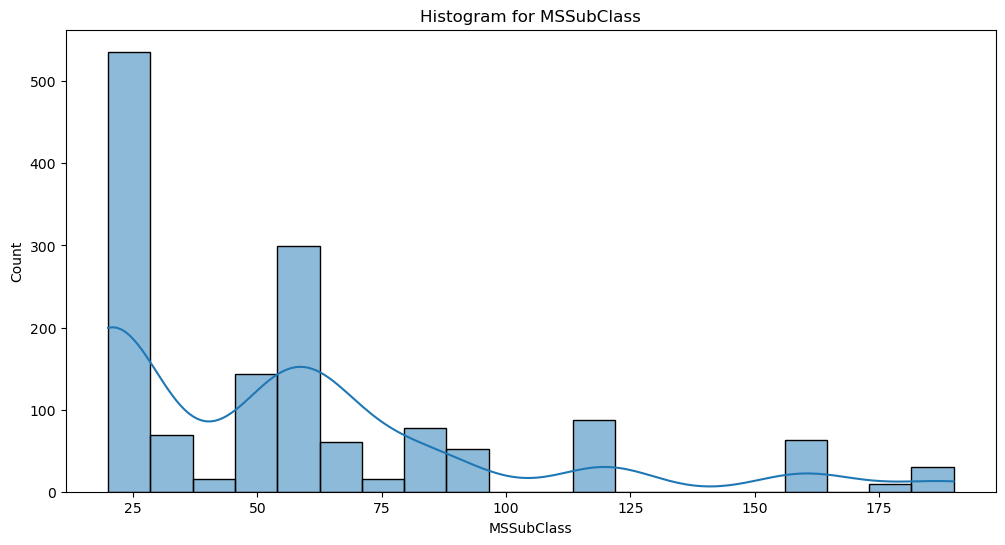

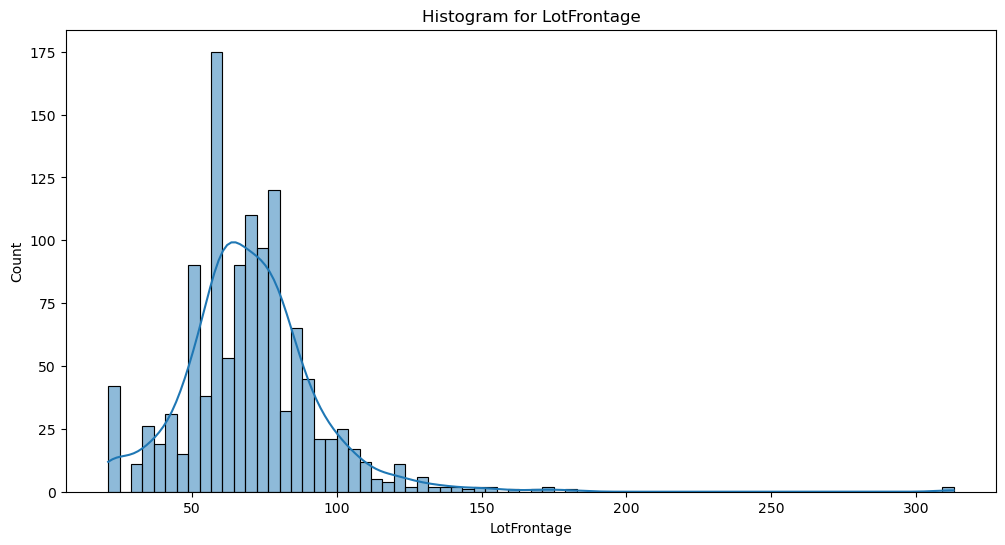

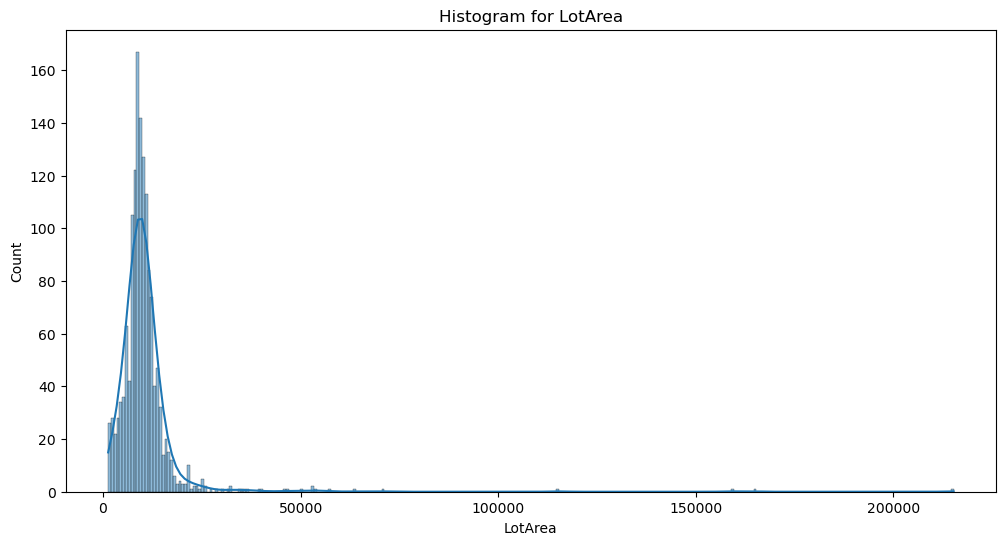

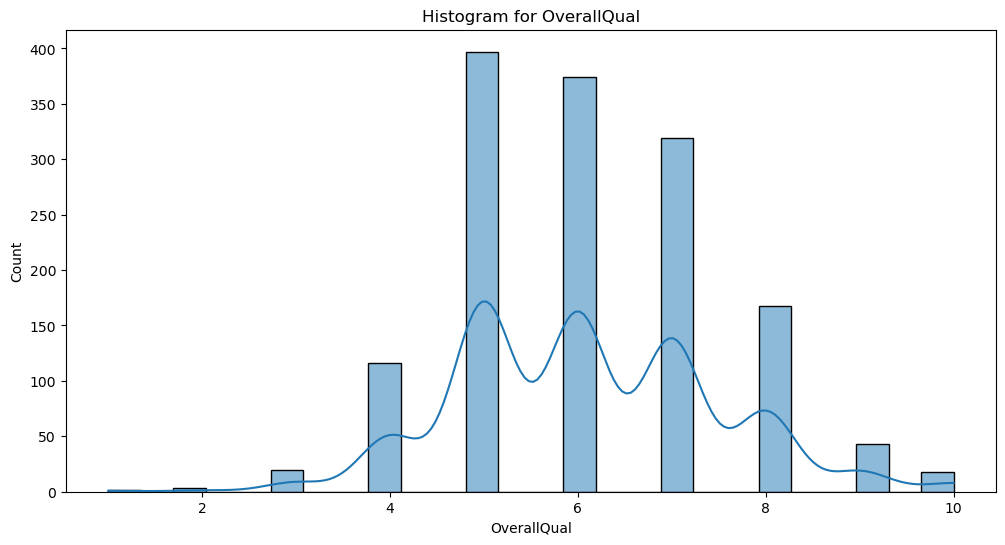

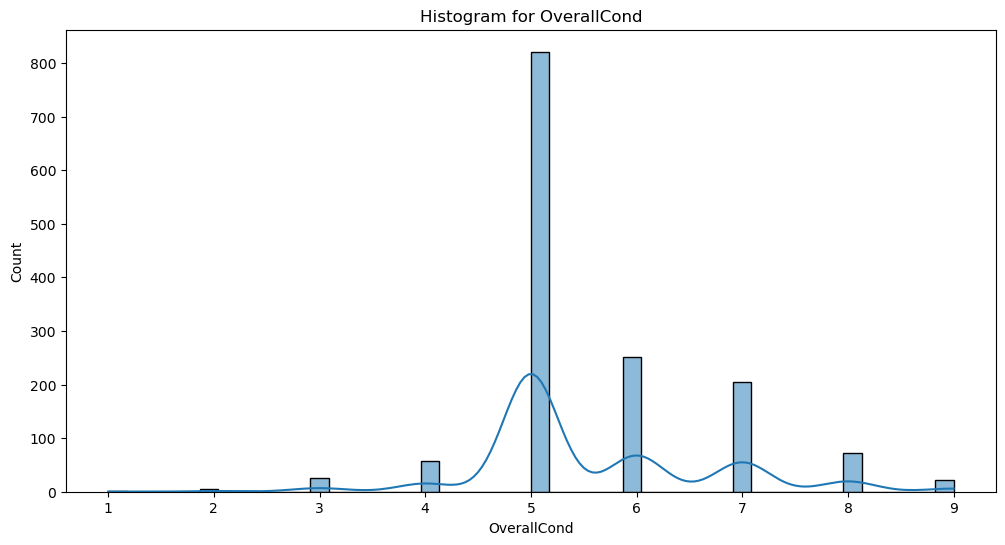

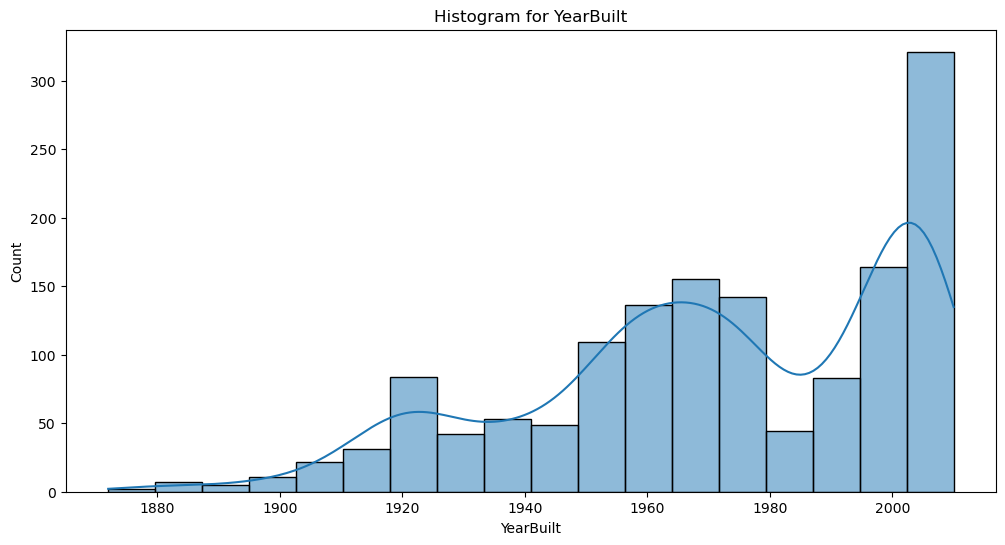

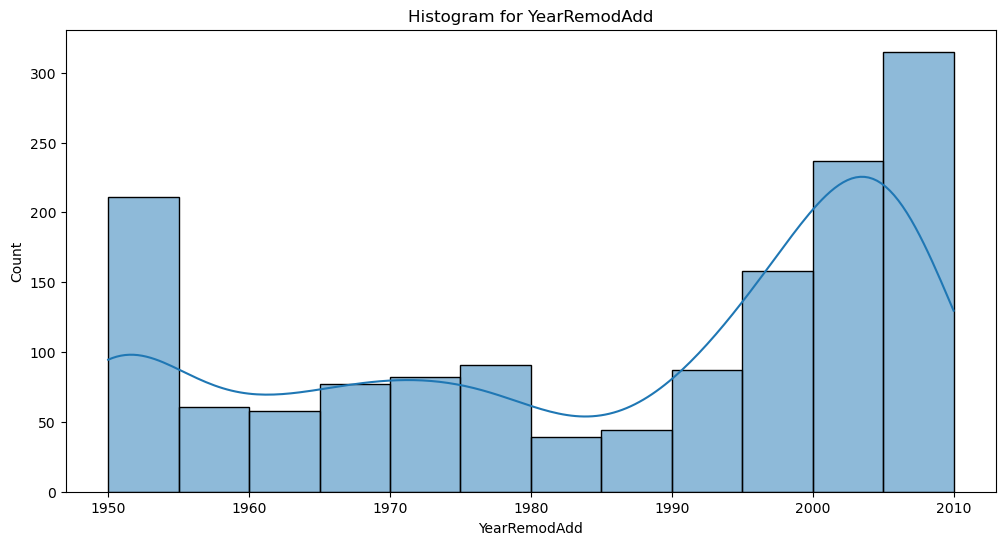

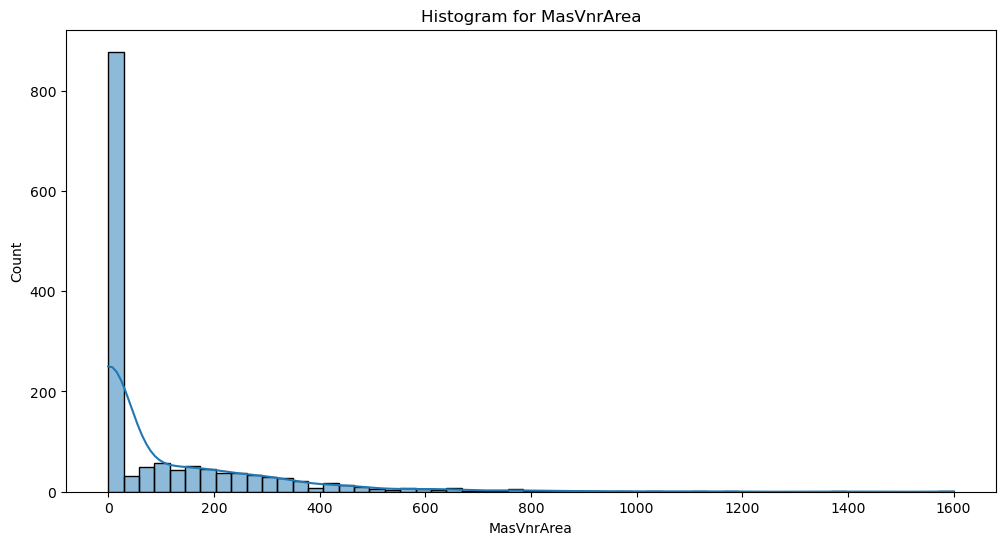

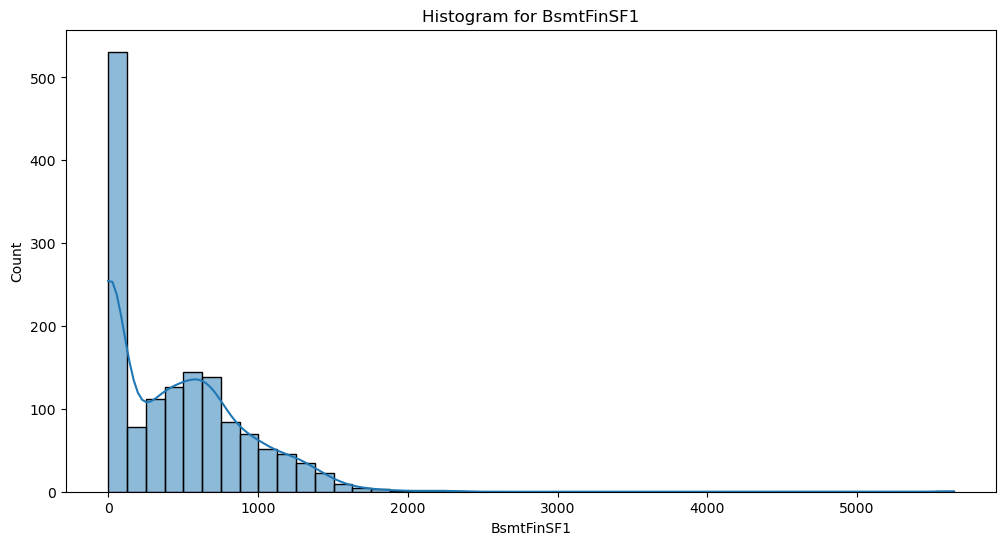

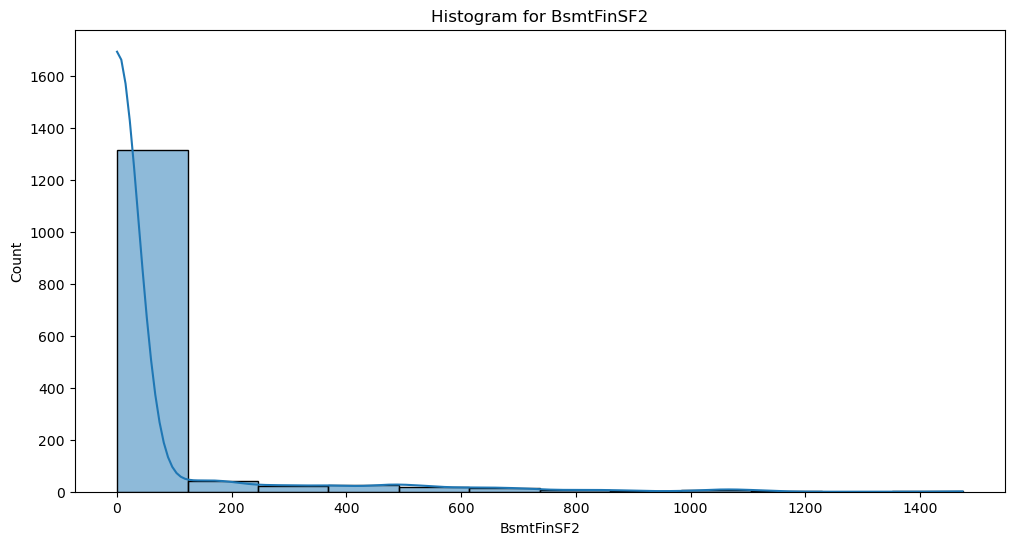

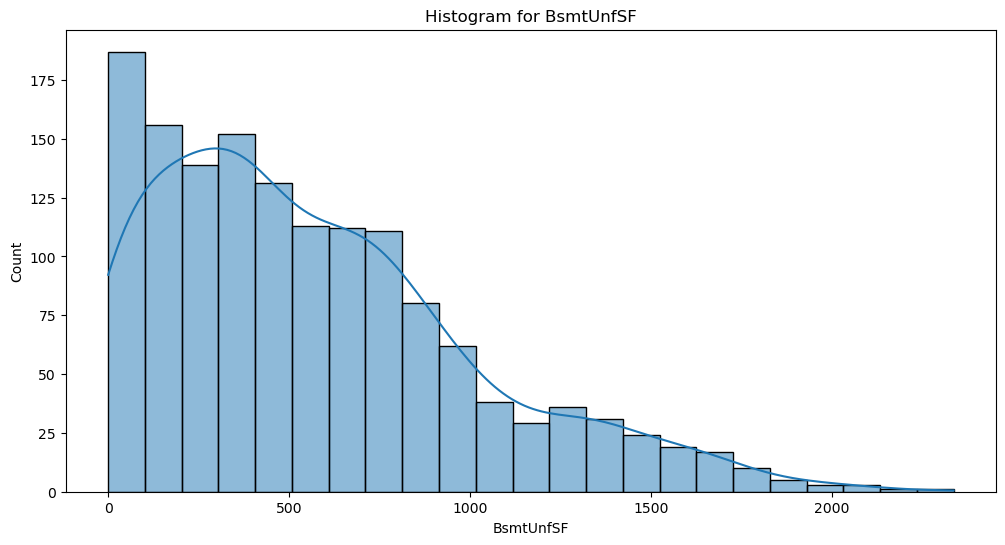

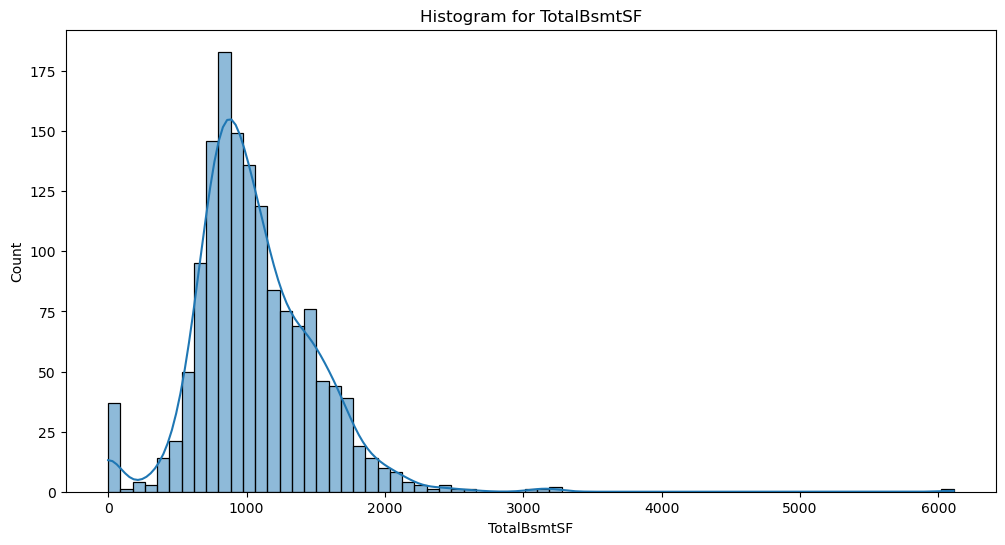

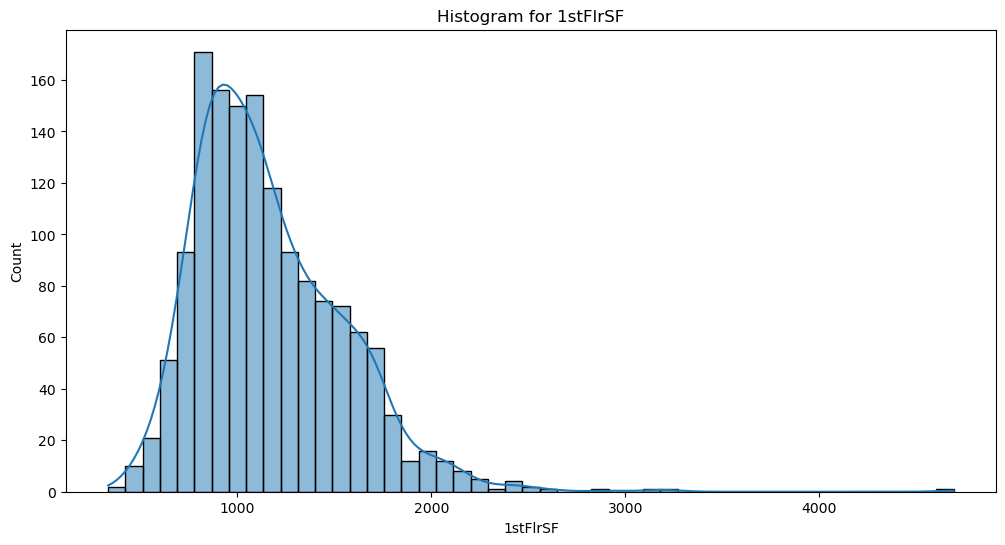

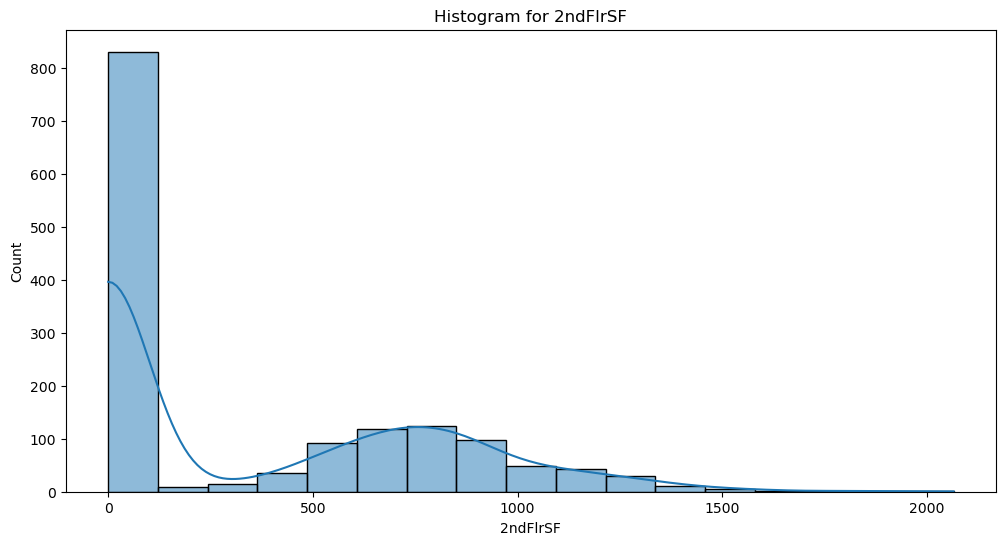

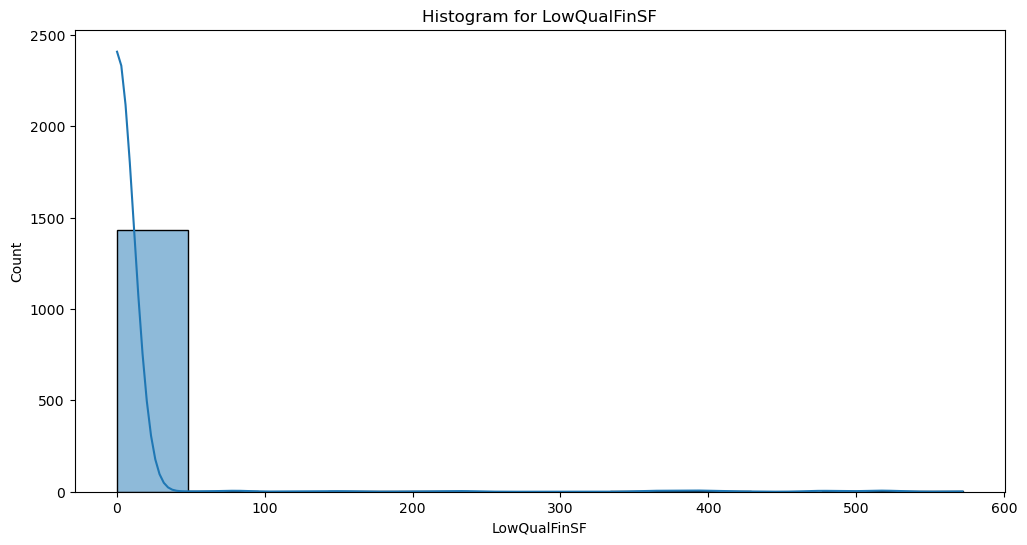

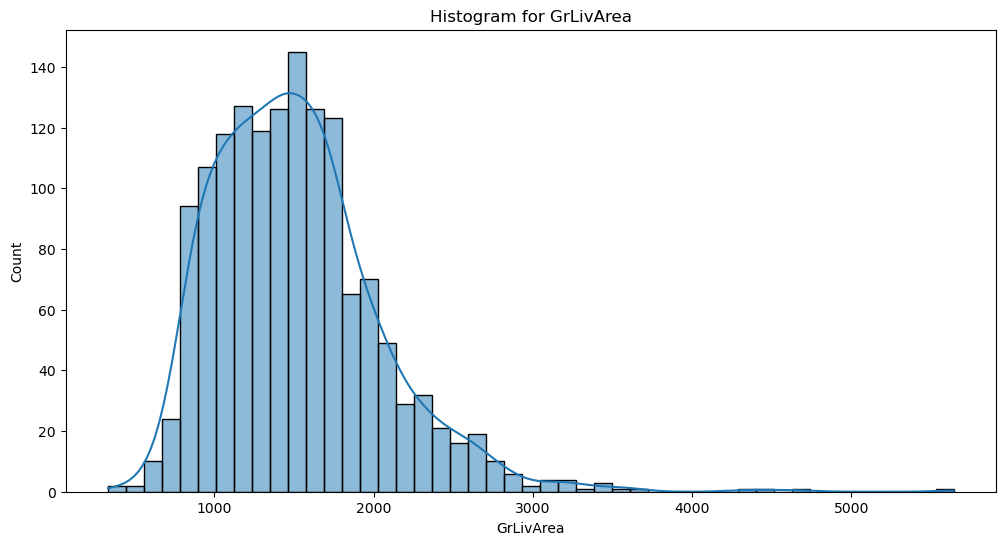

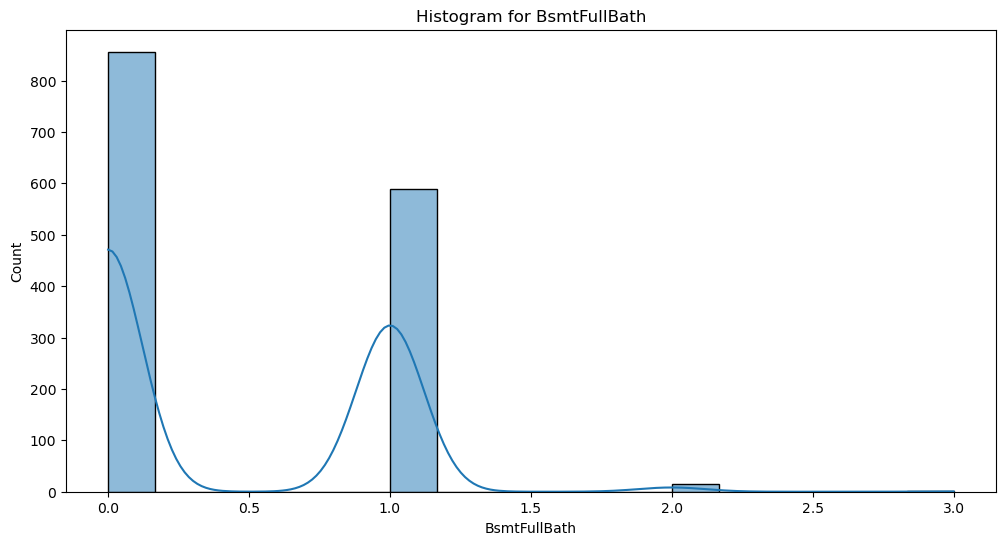

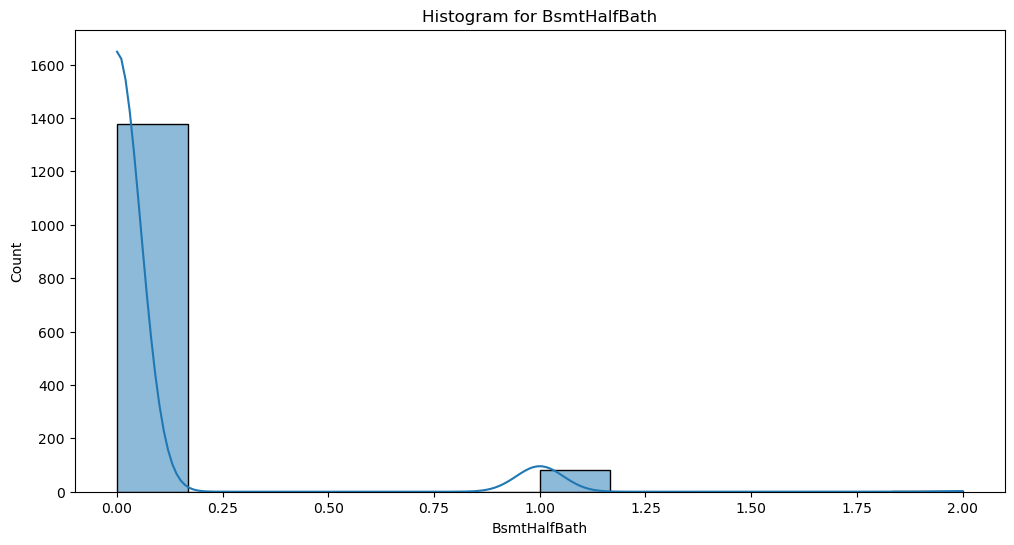

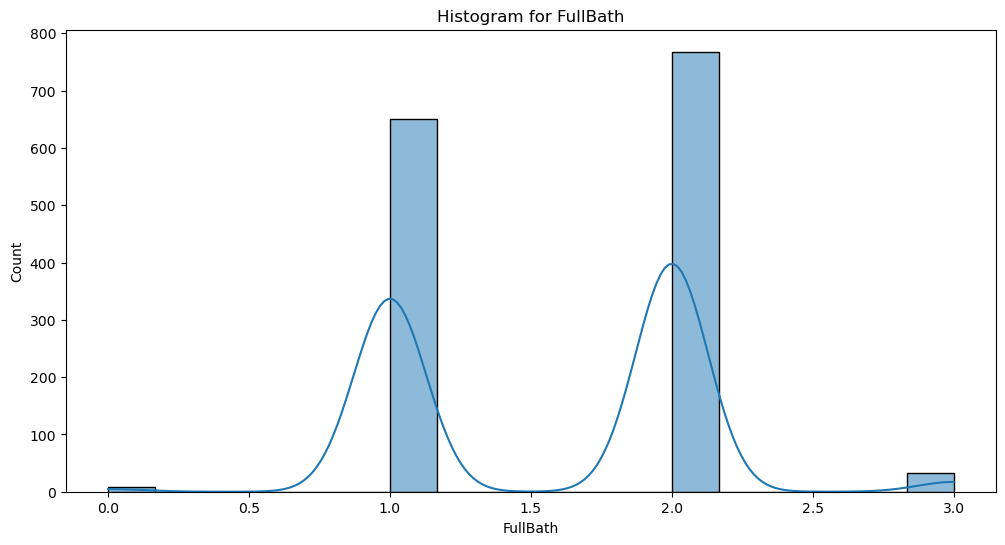

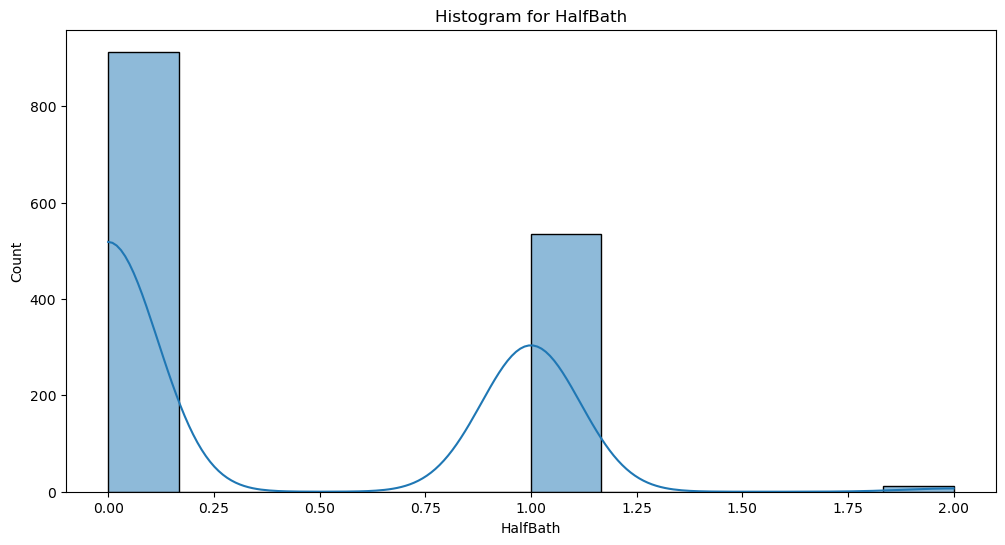

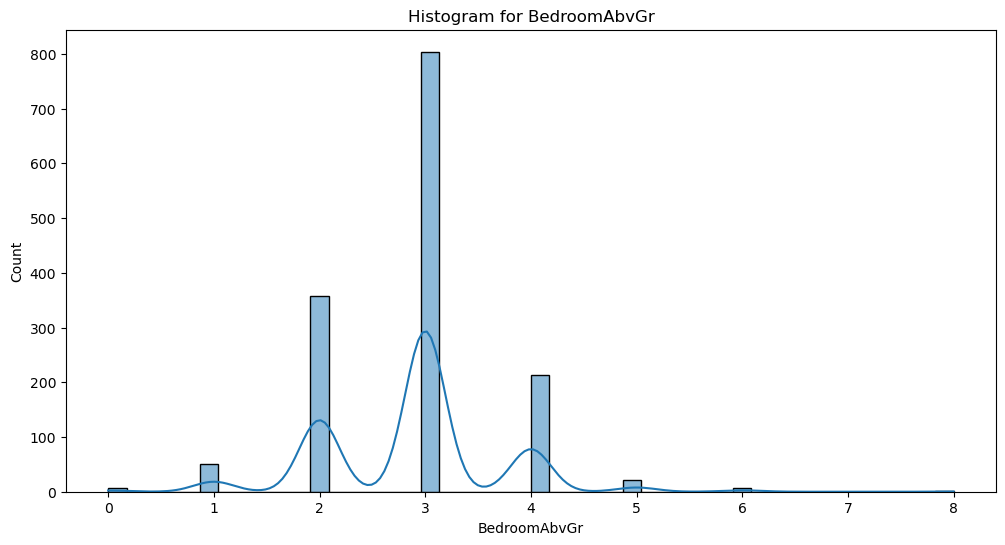

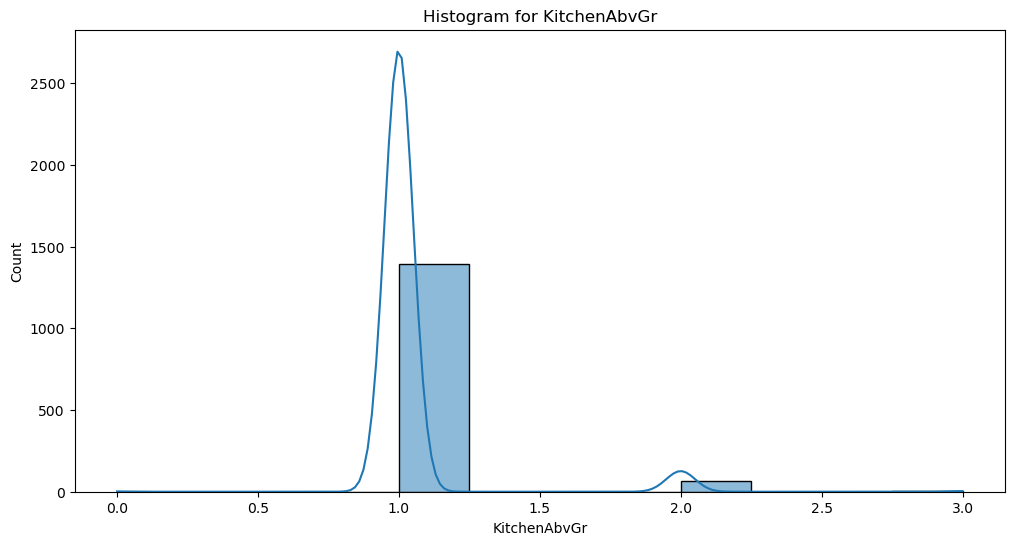

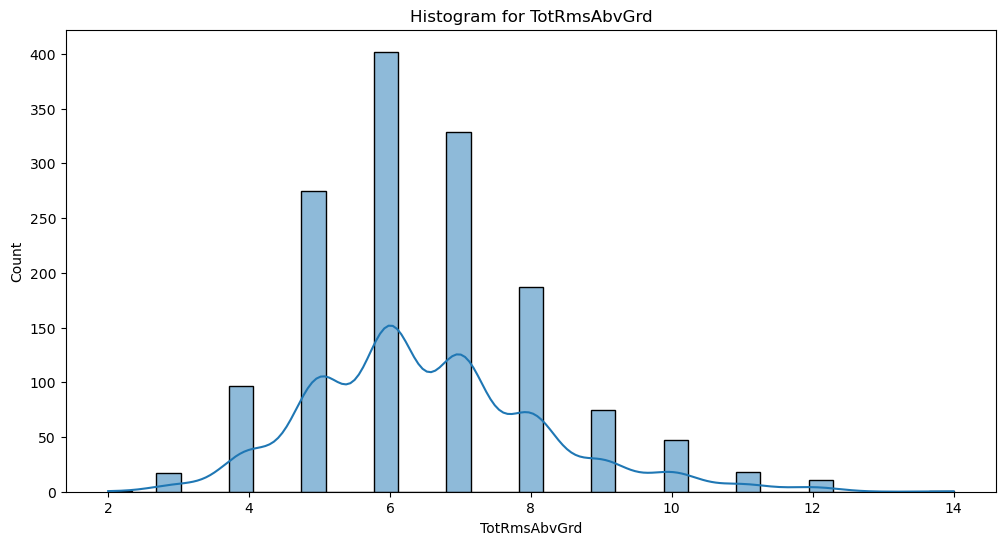

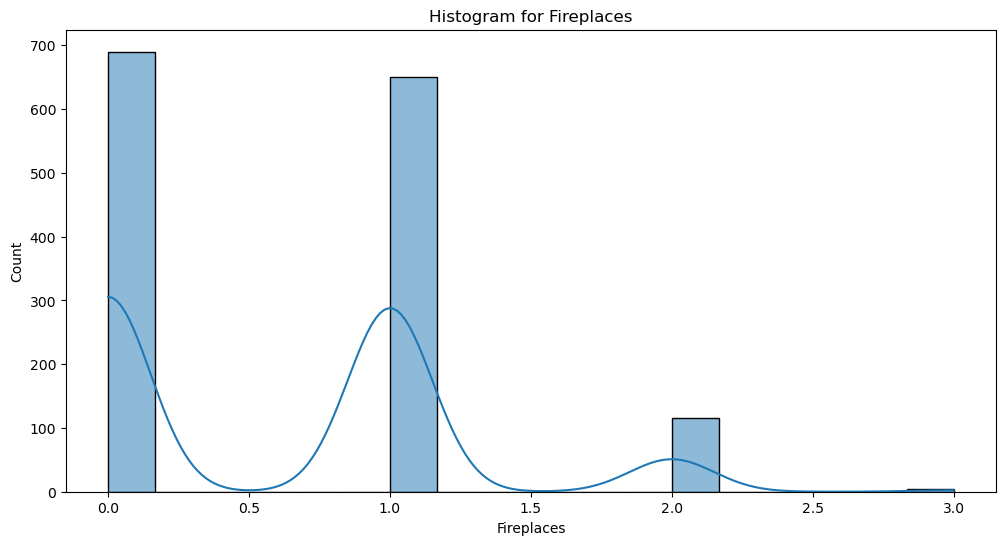

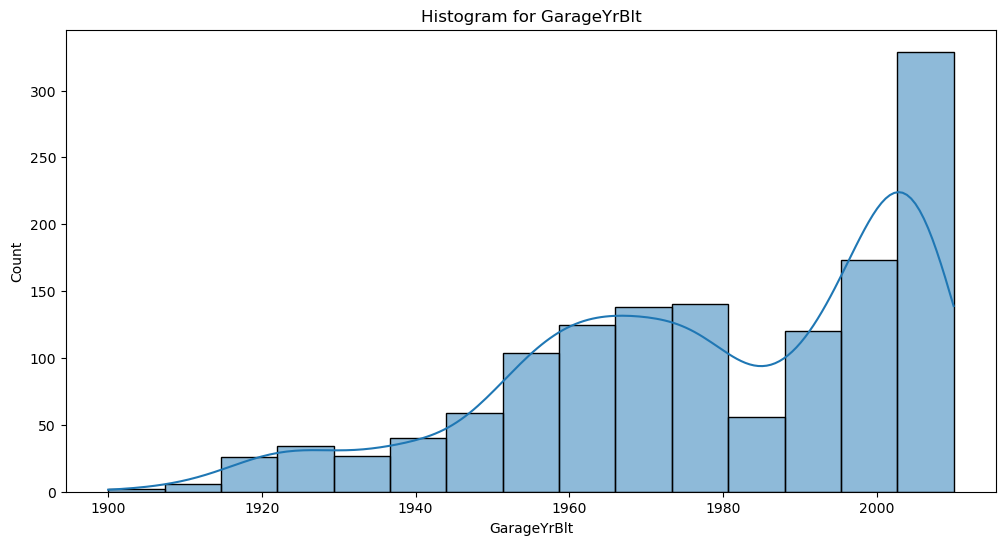

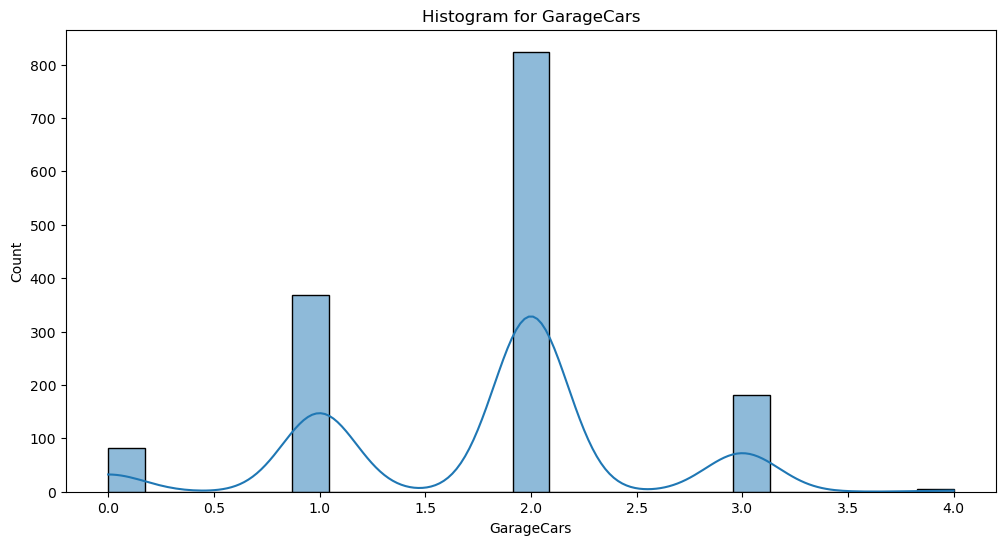

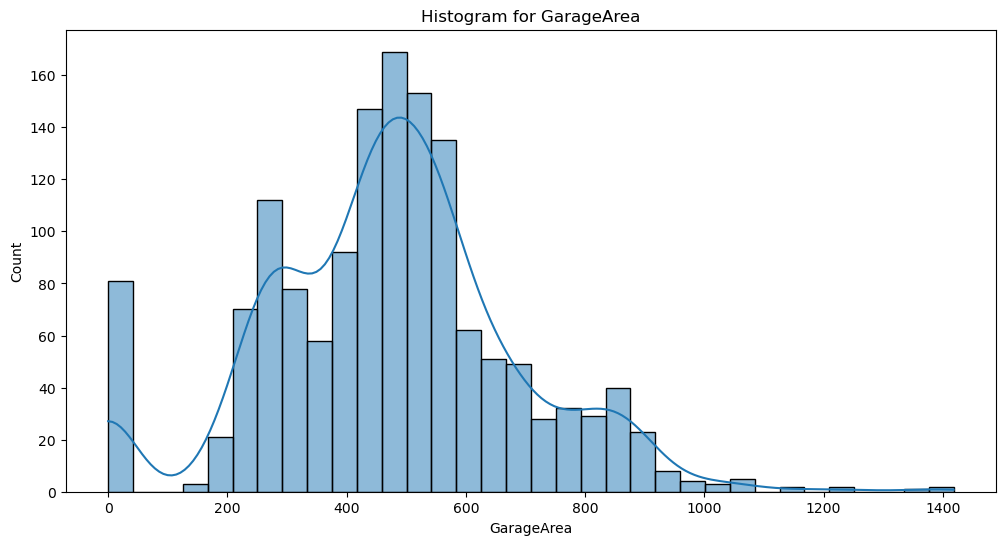

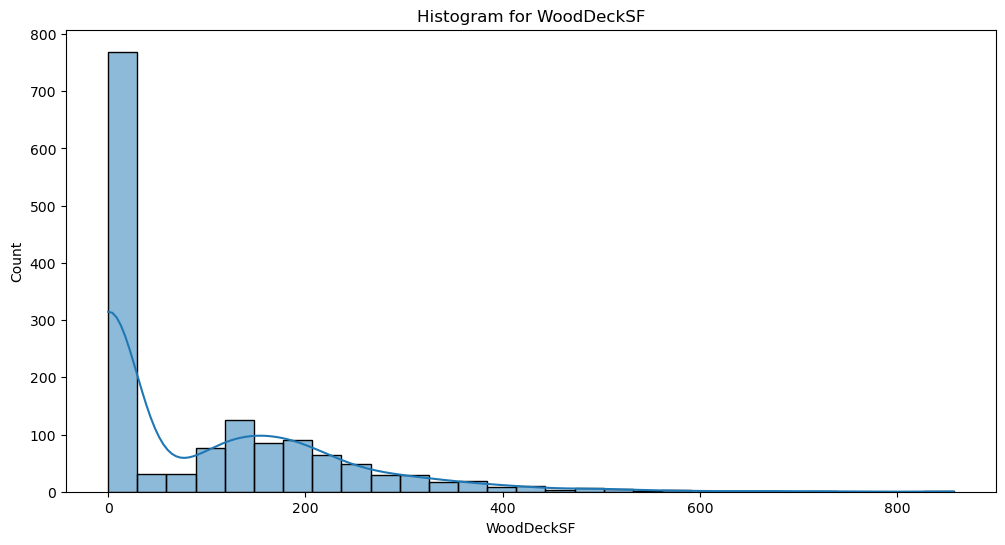

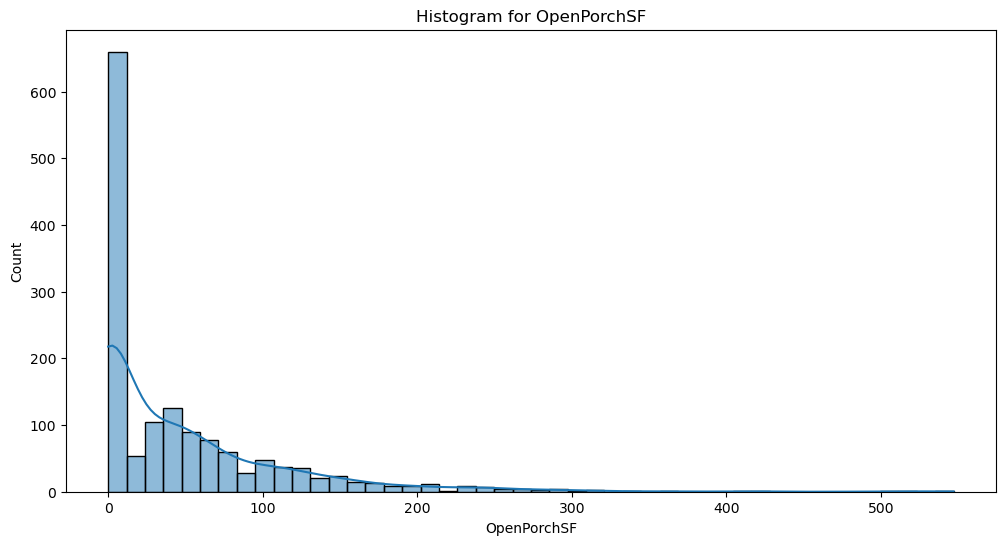

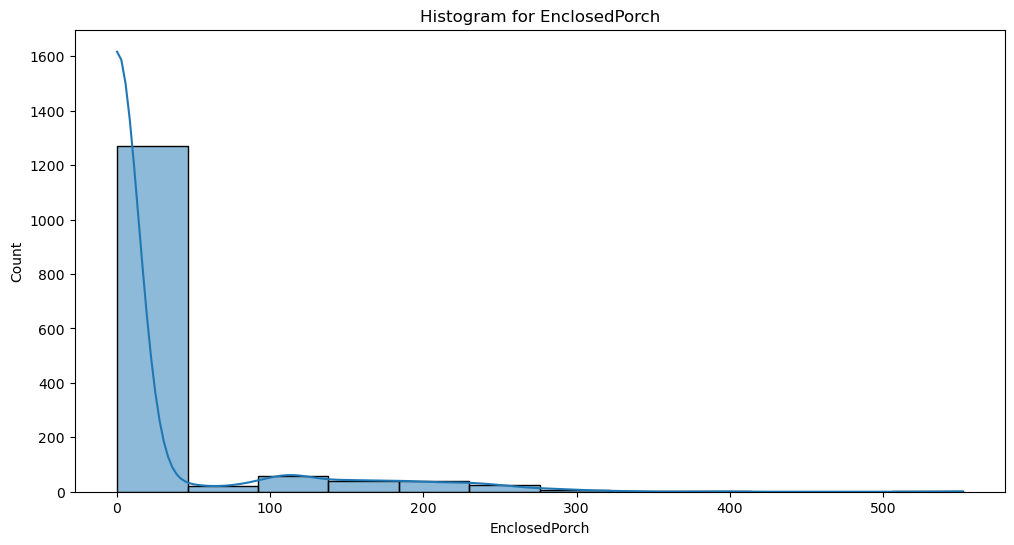

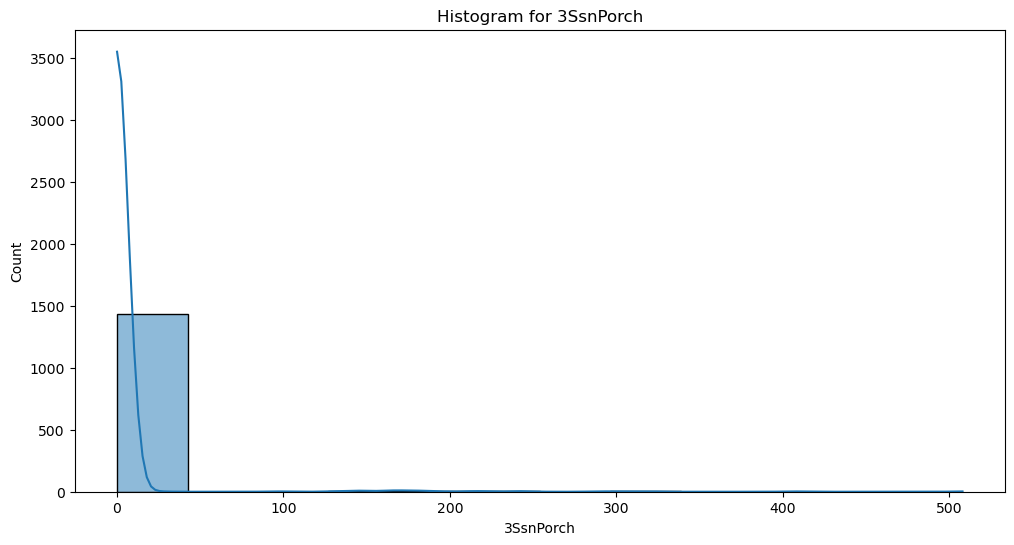

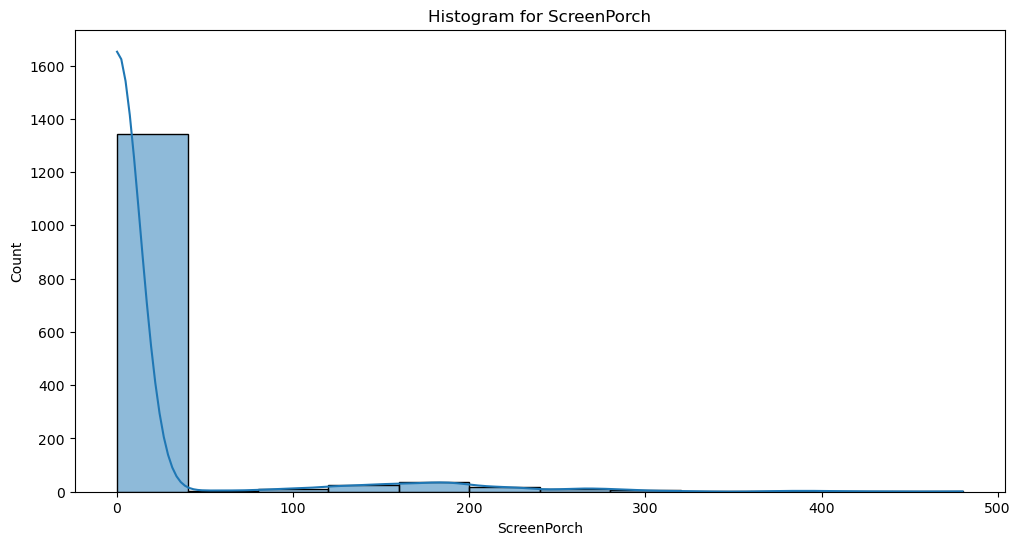

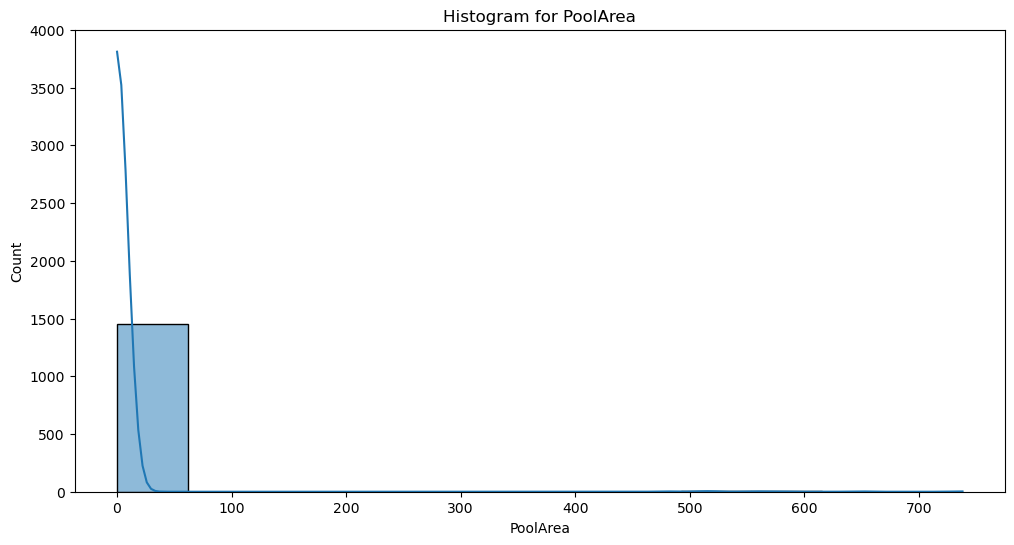

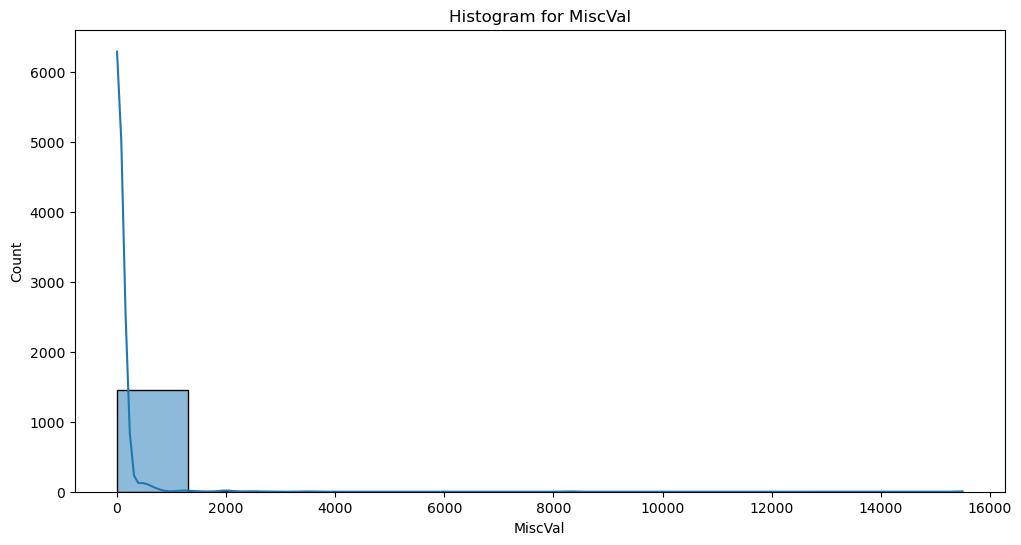

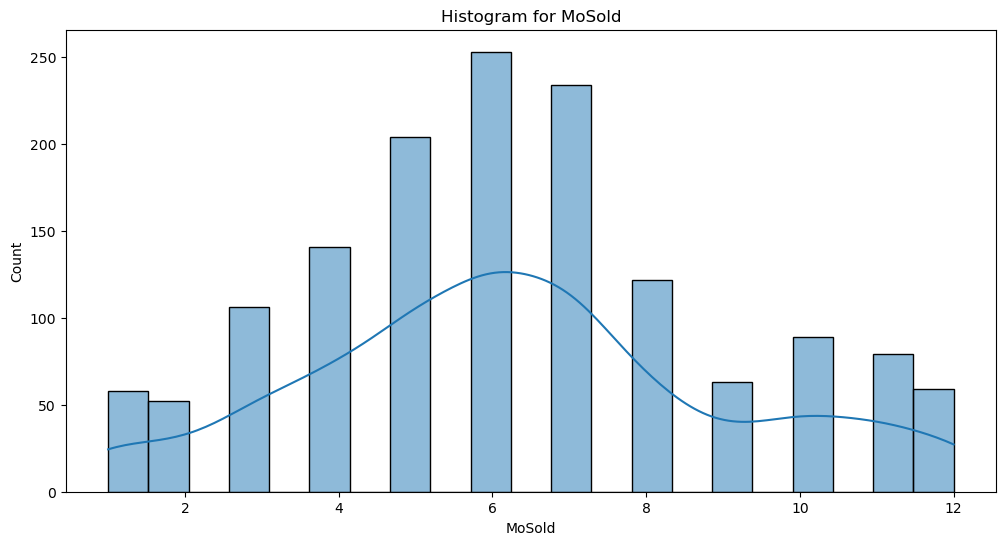

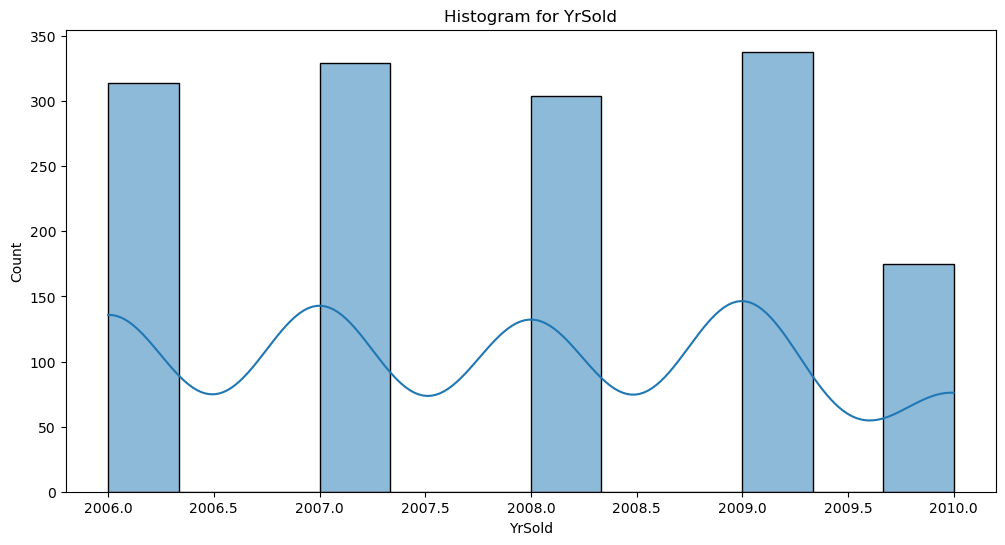

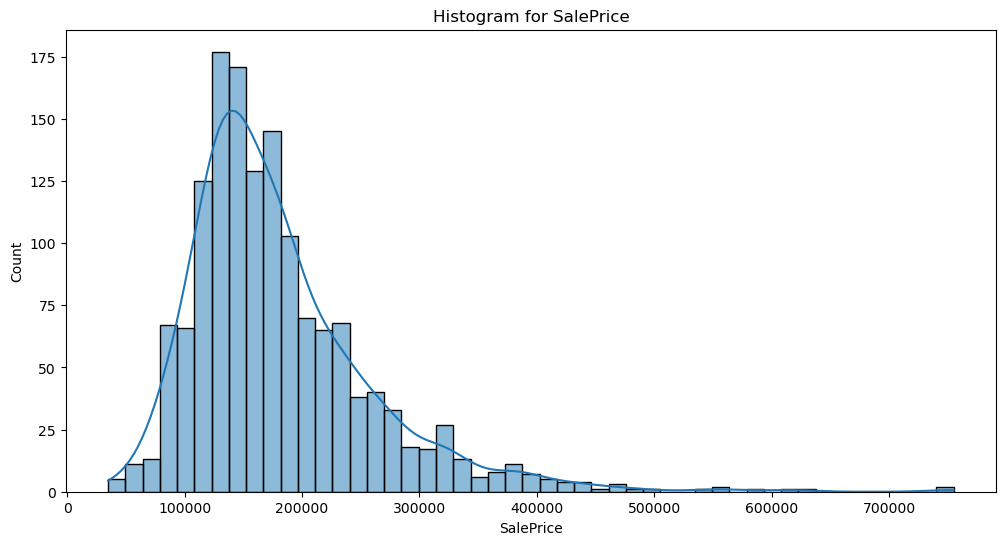

In [16]:
for i in con:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

### Bivariate Analysis

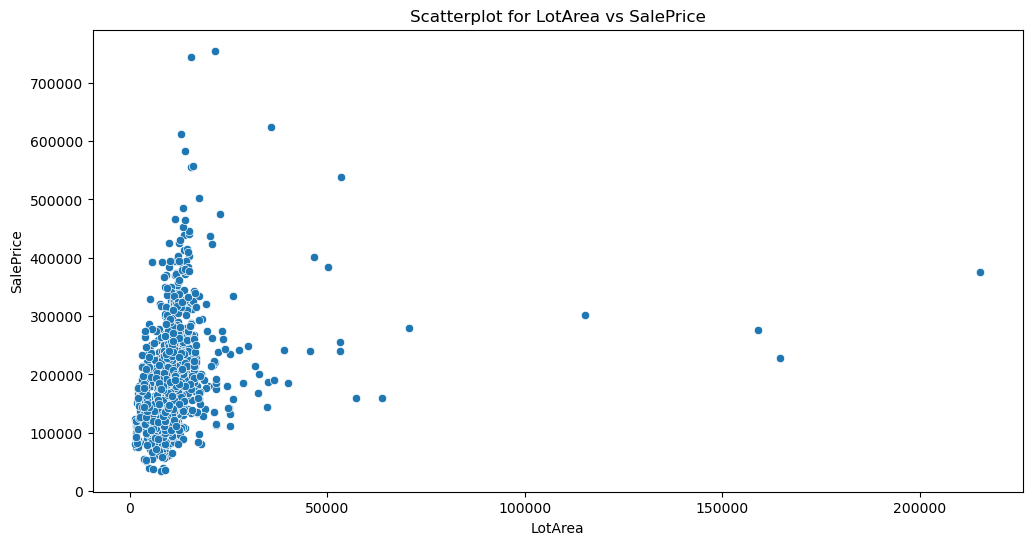

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='LotArea', y='SalePrice')
plt.title('Scatterplot for LotArea vs SalePrice')
plt.show()

### Correlation Heatmap

In [18]:
df[con].corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [19]:
df[con].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<Axes: >

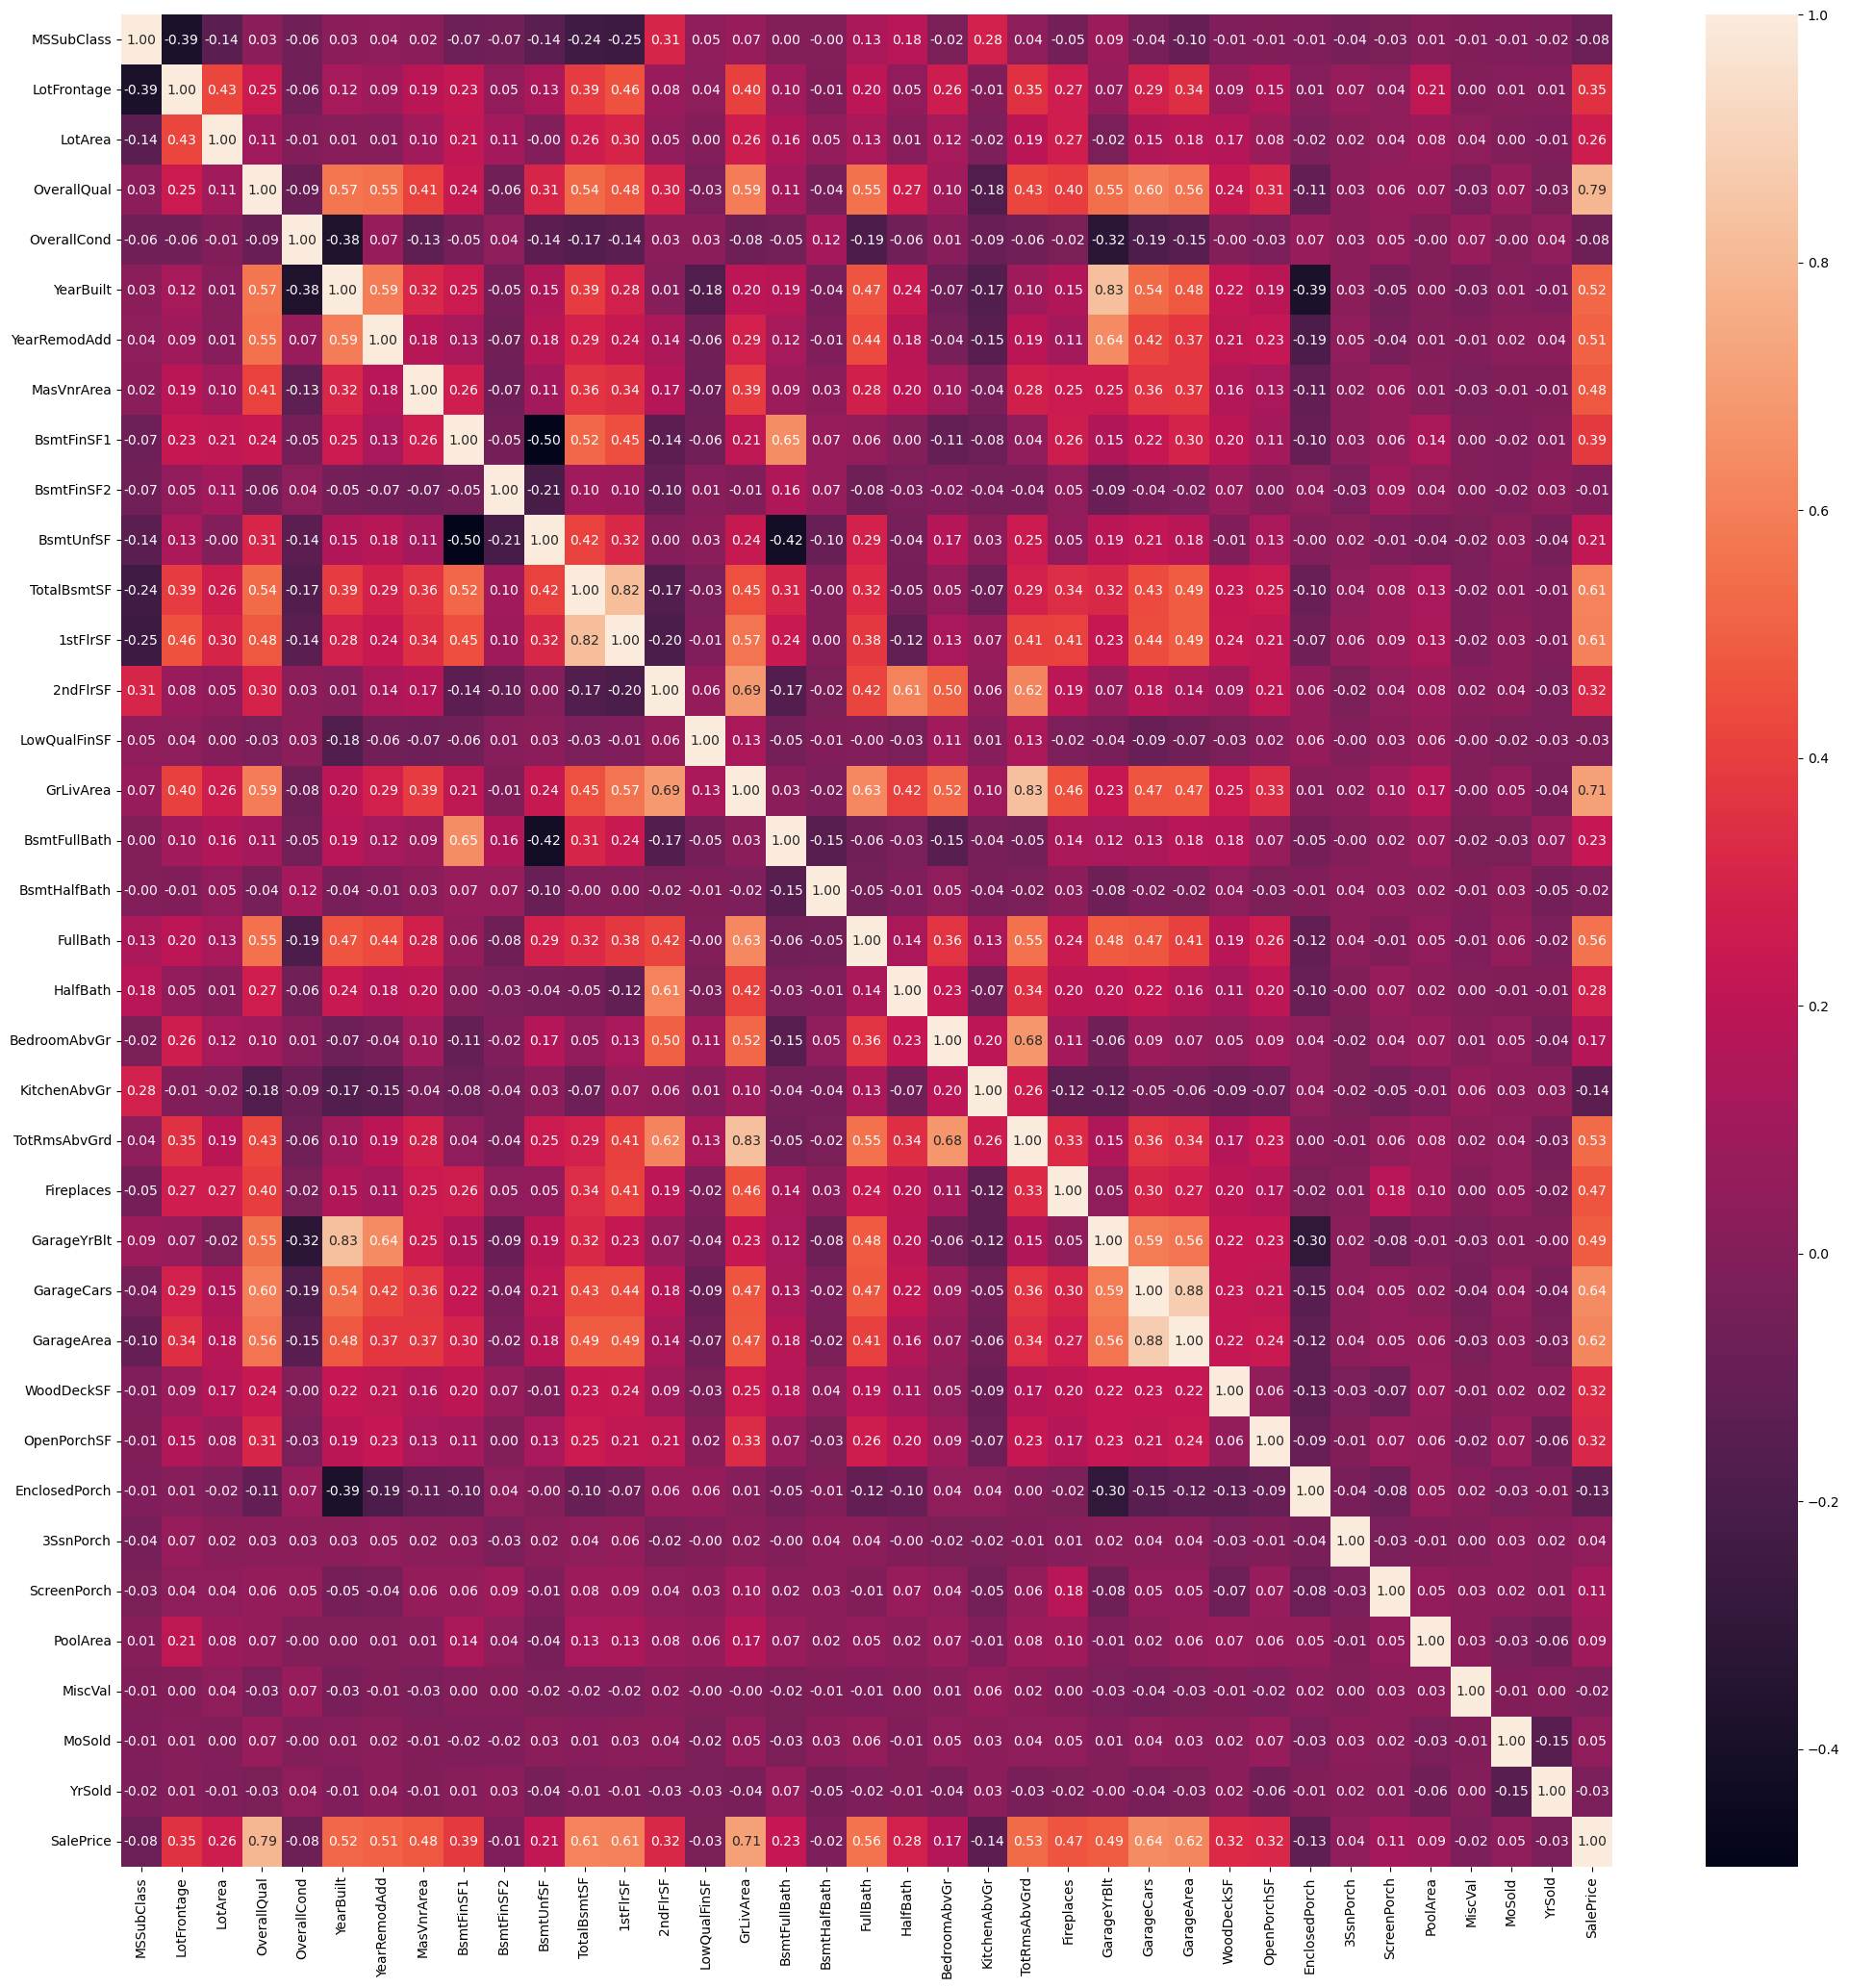

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(data=df[con].corr(), annot=True, fmt='.2f')

### Cat vs Con - Boxplot

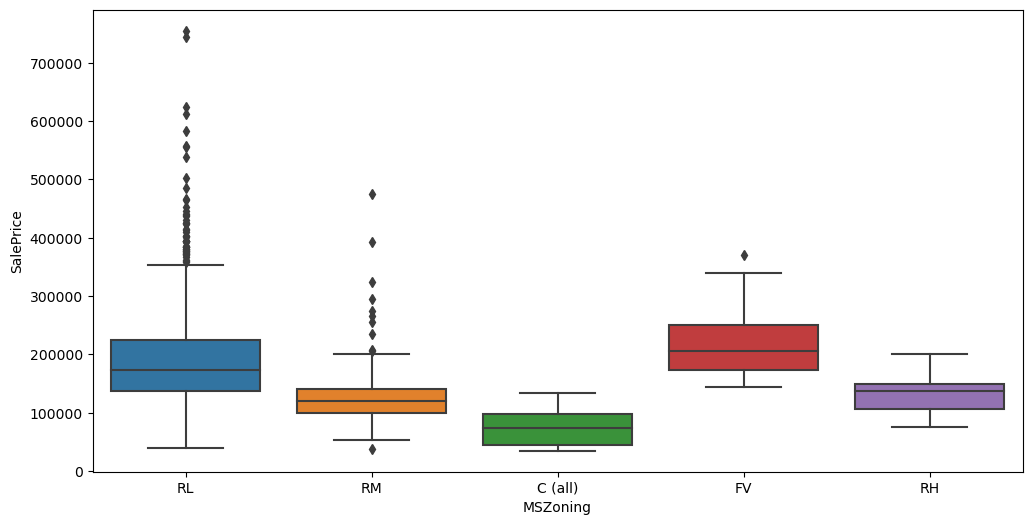

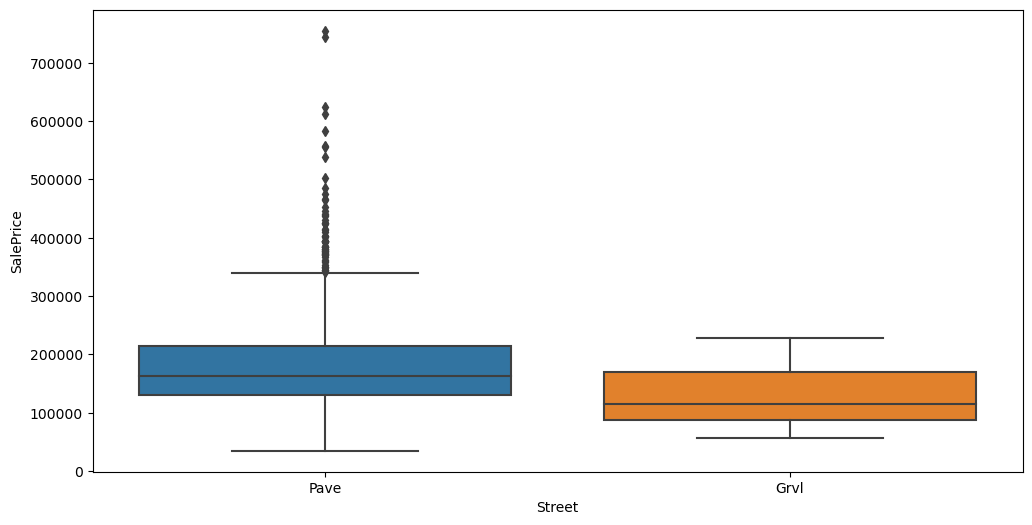

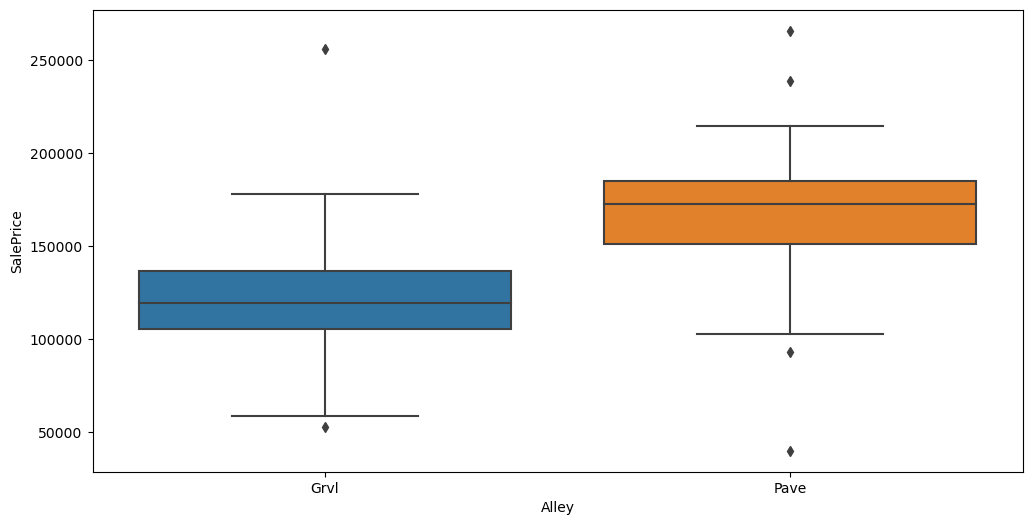

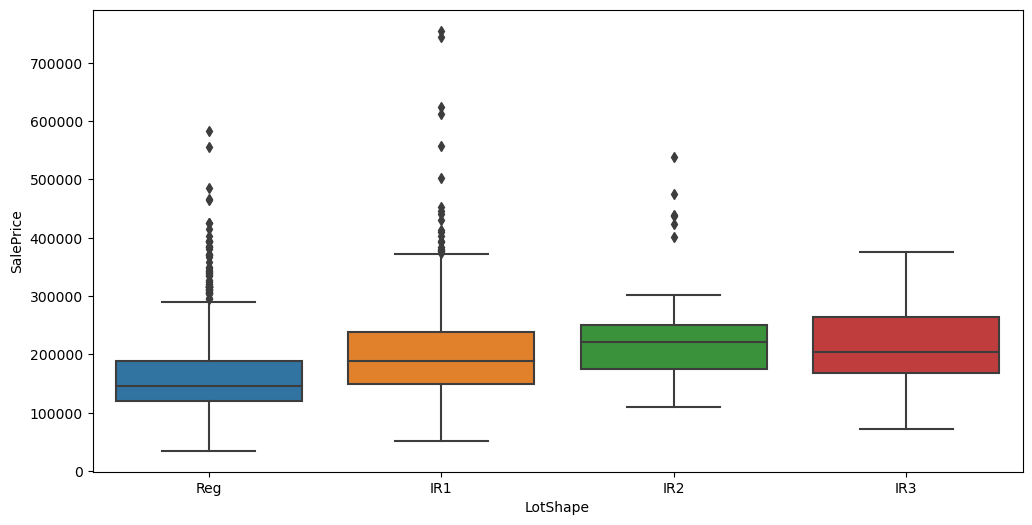

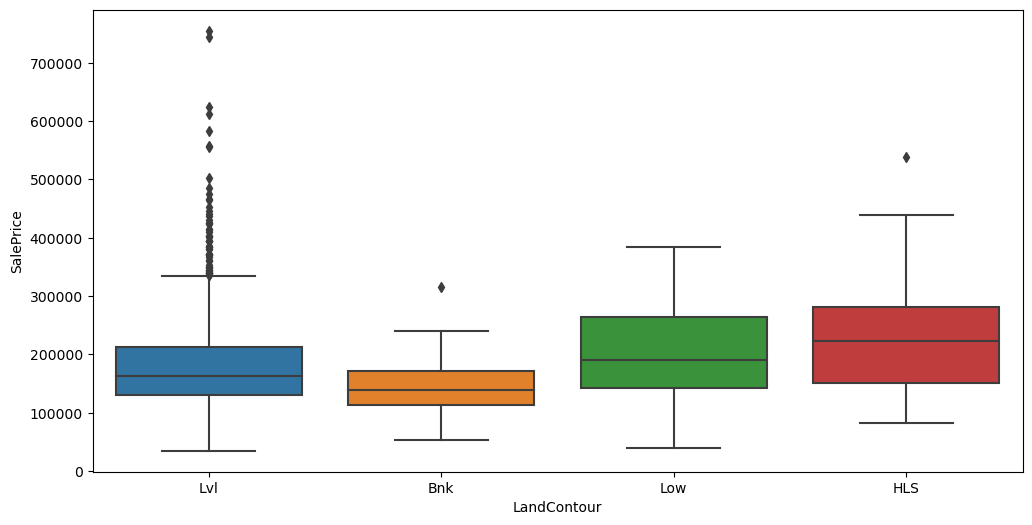

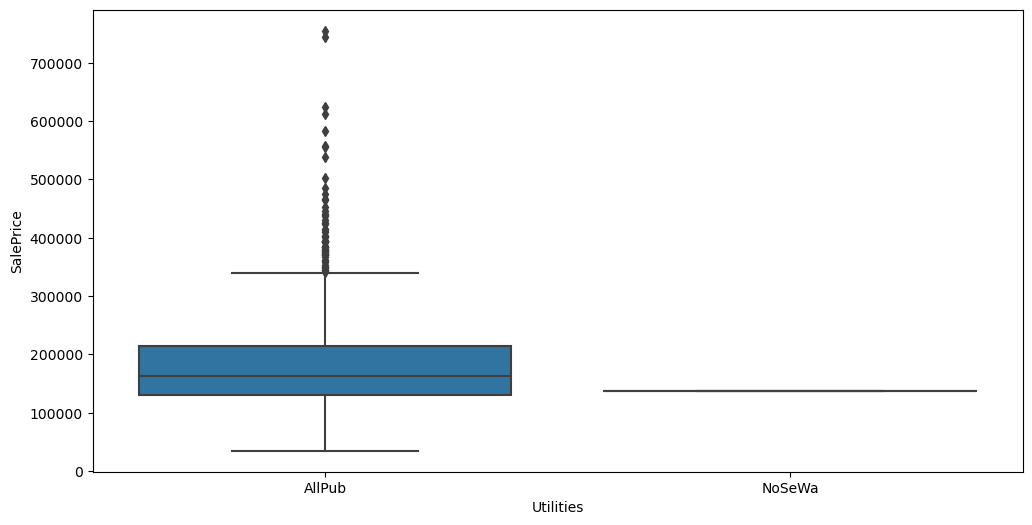

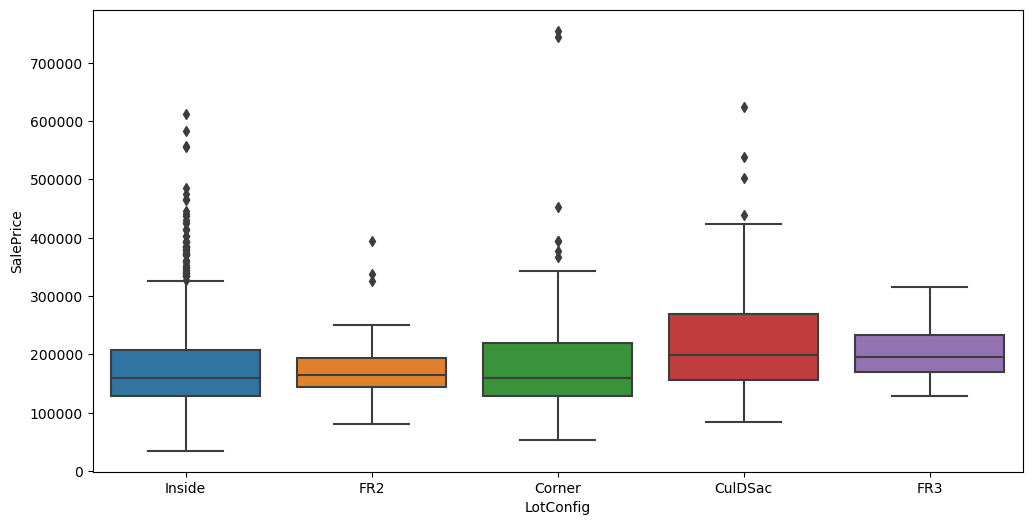

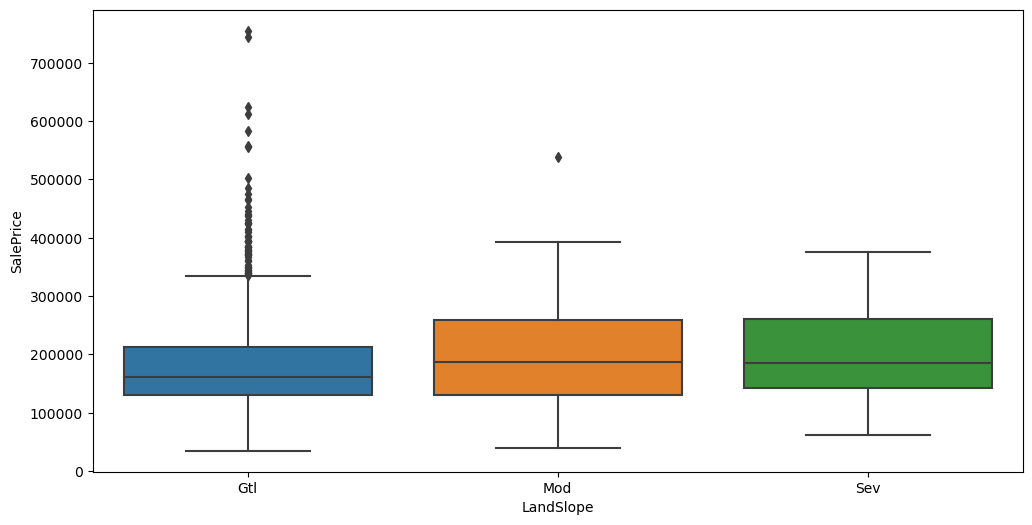

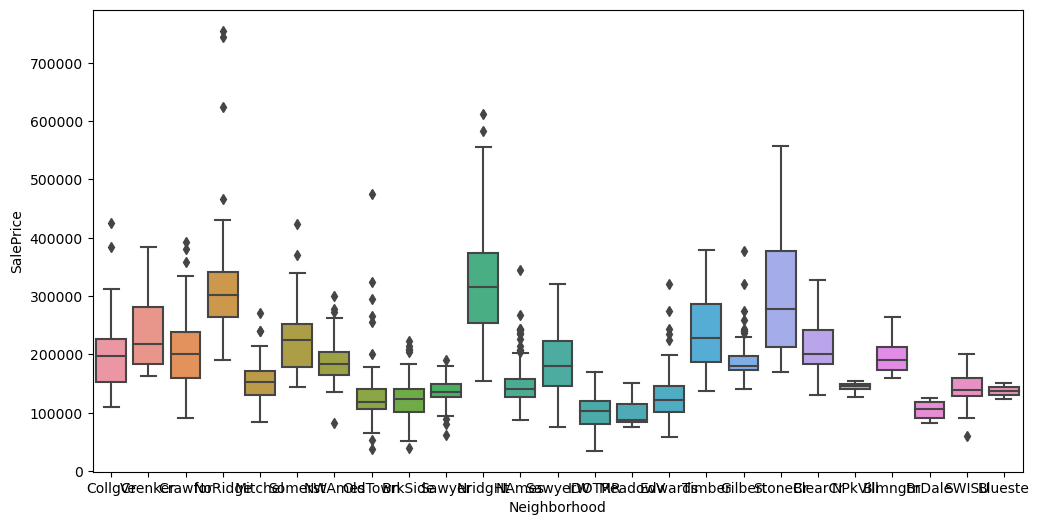

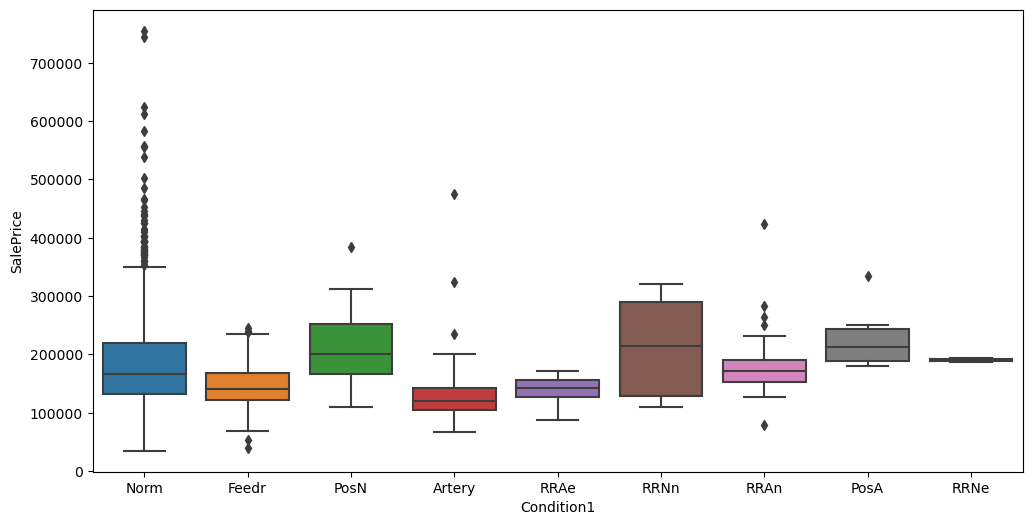

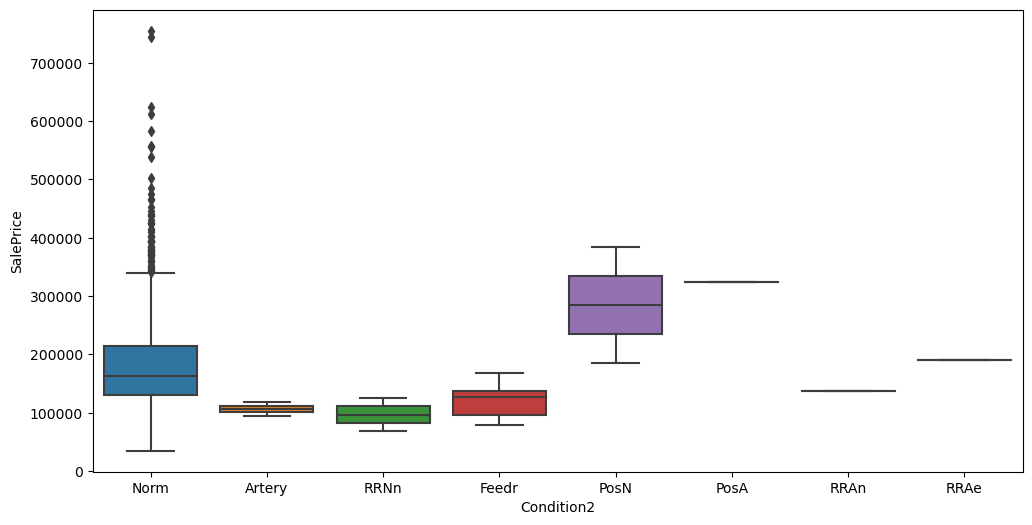

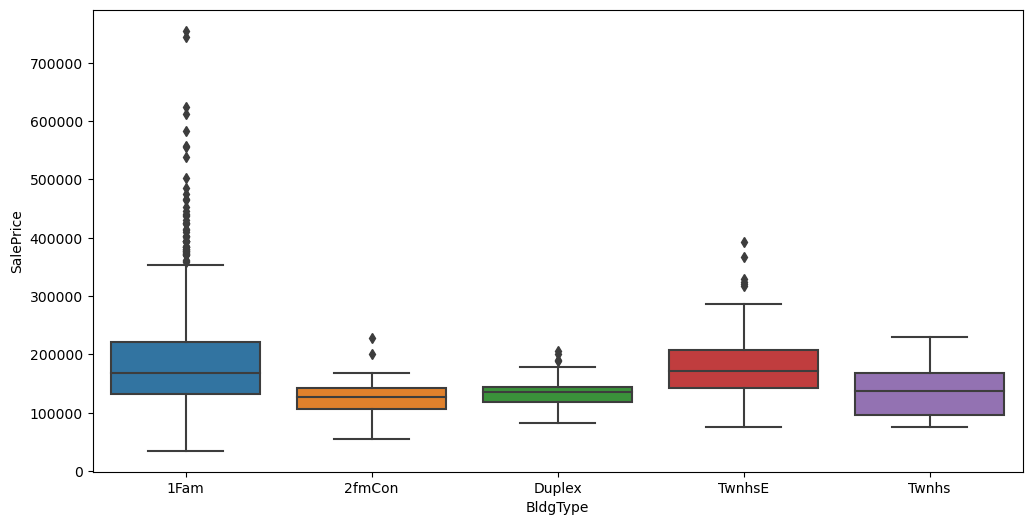

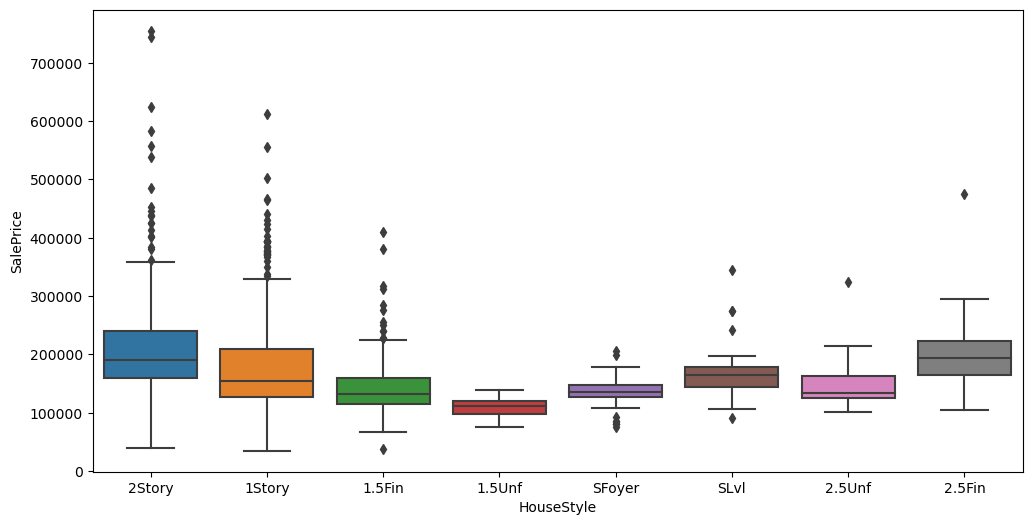

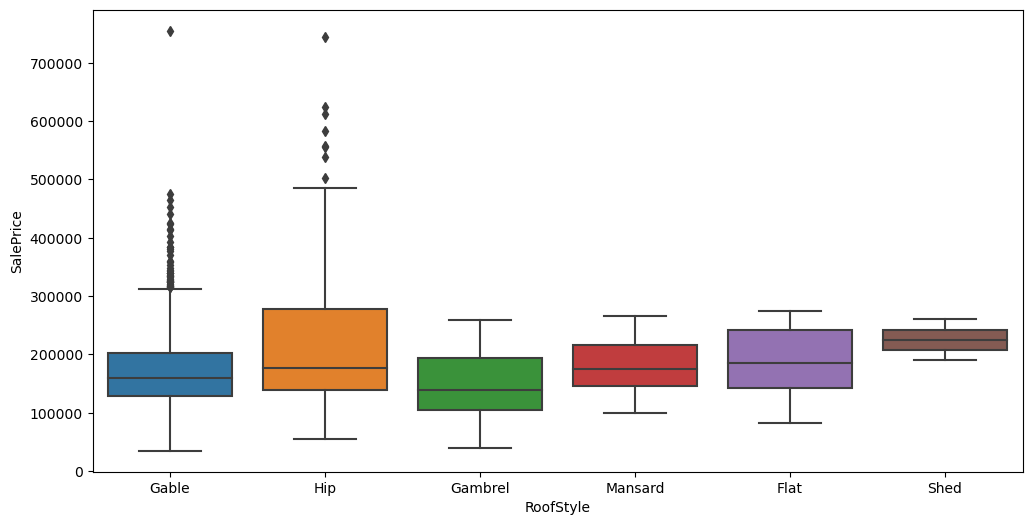

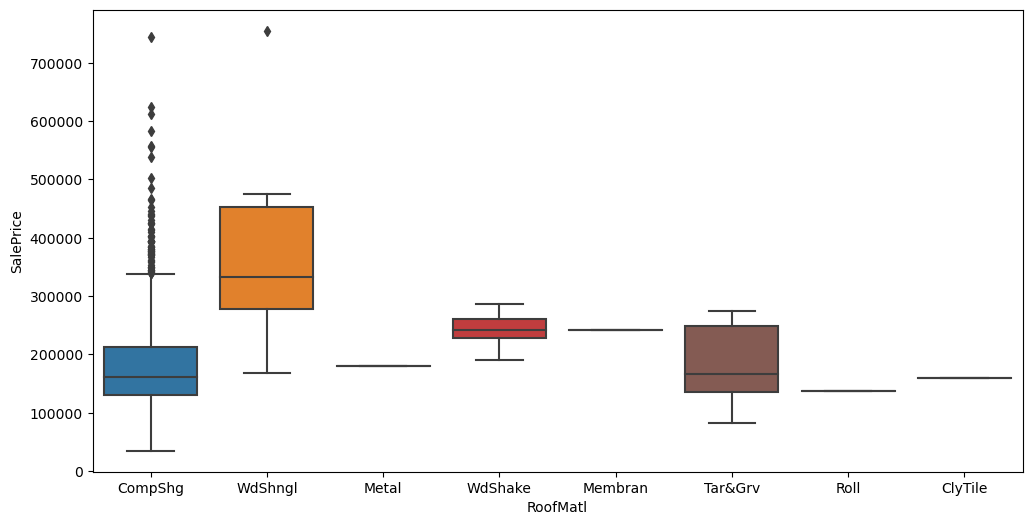

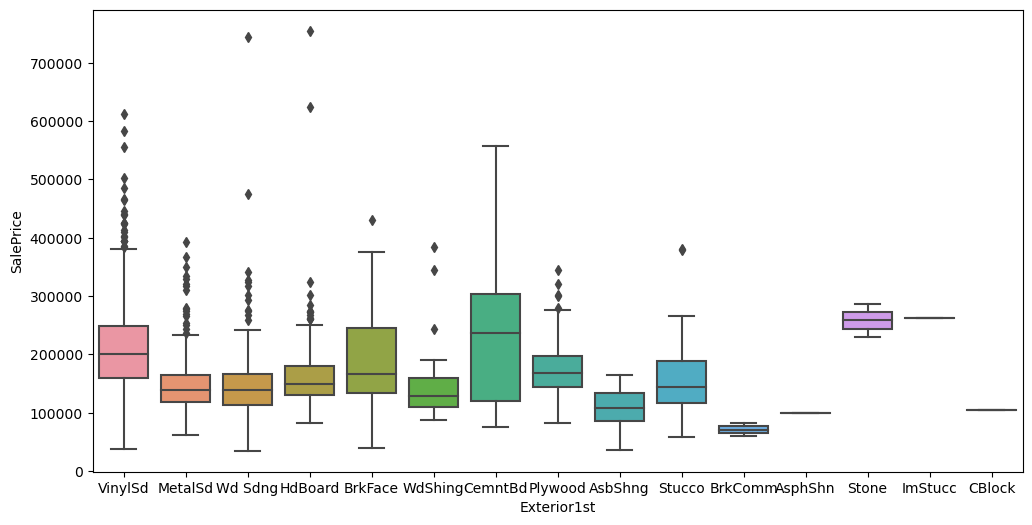

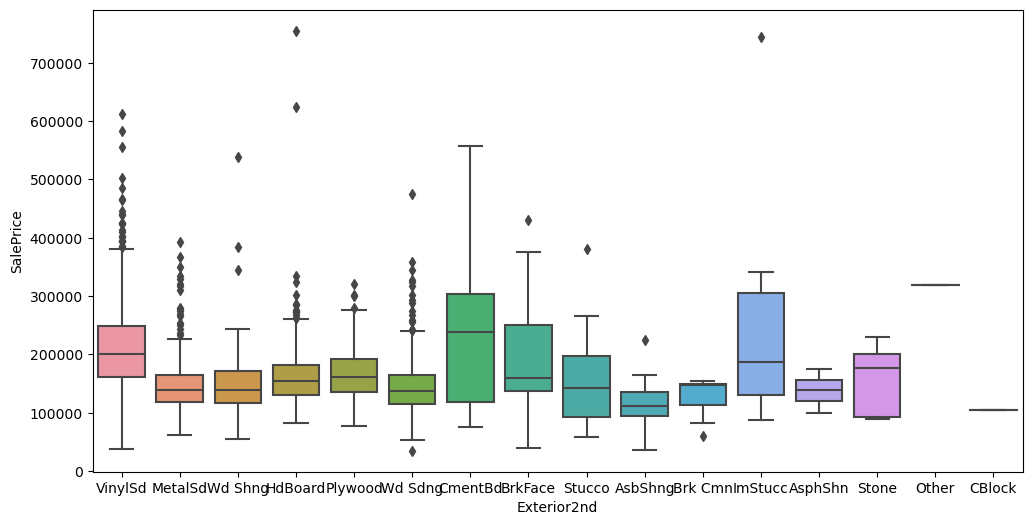

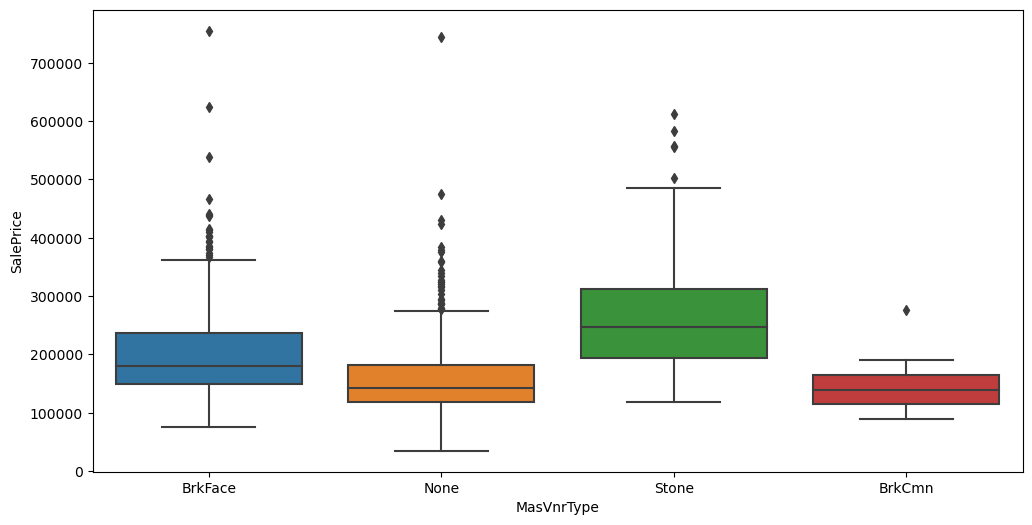

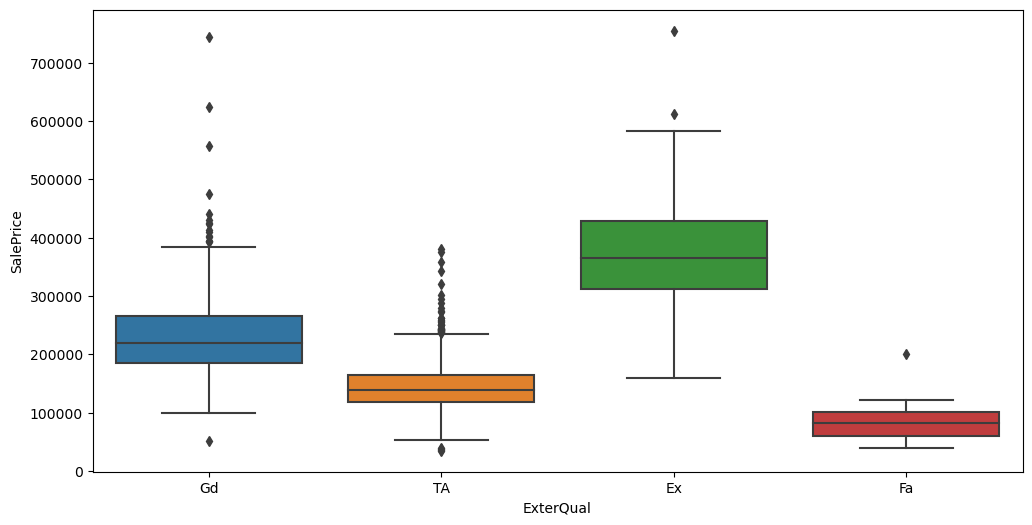

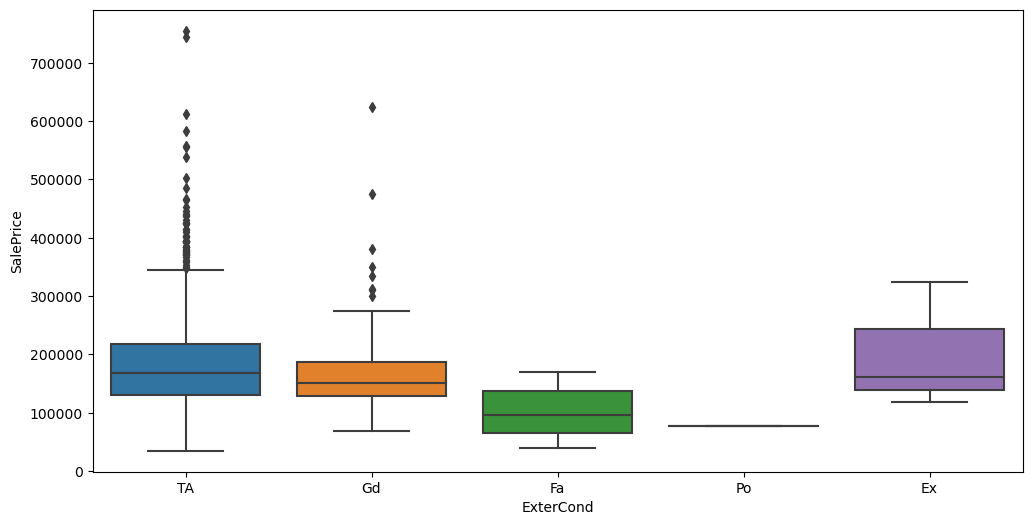

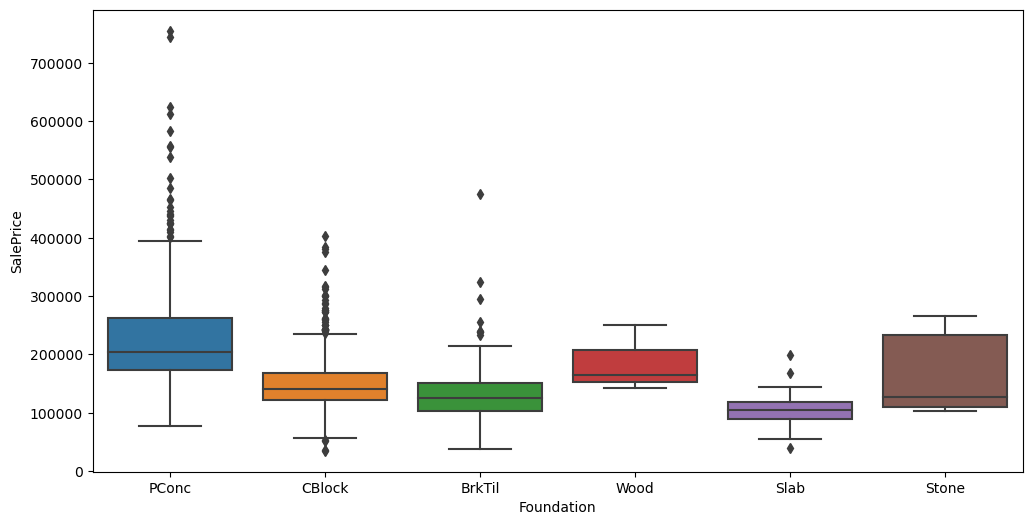

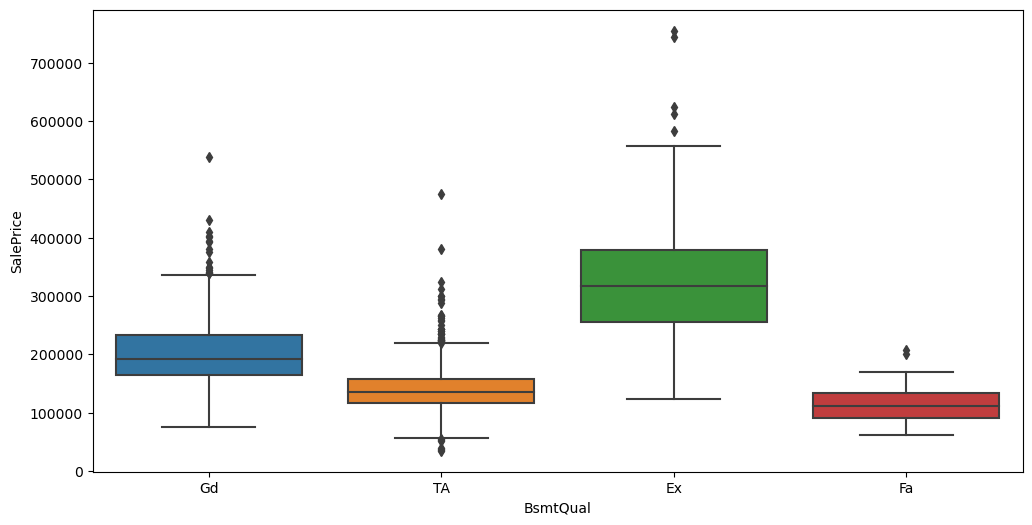

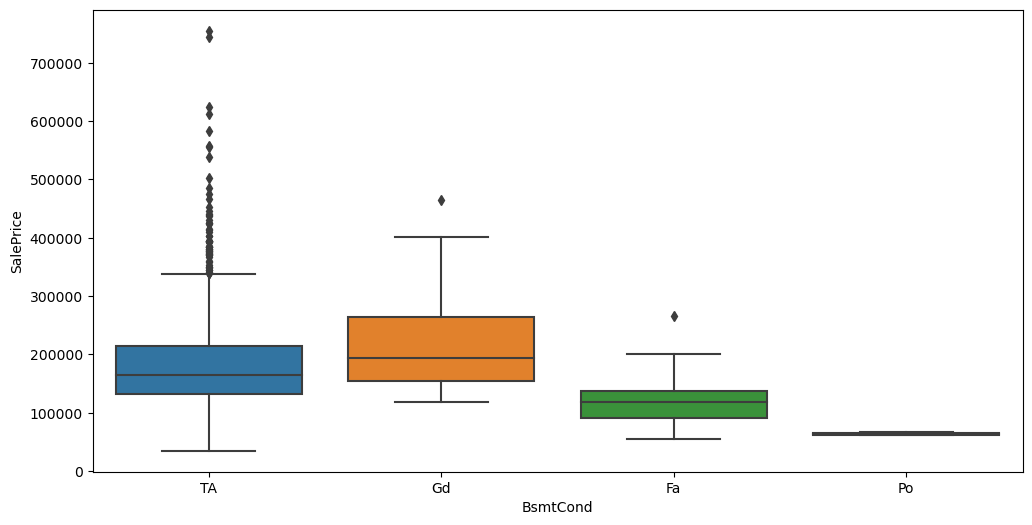

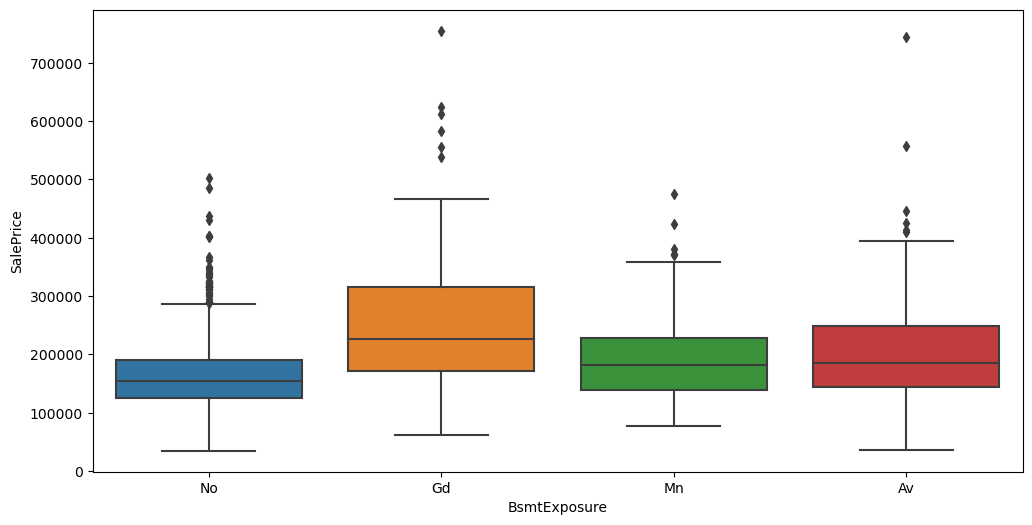

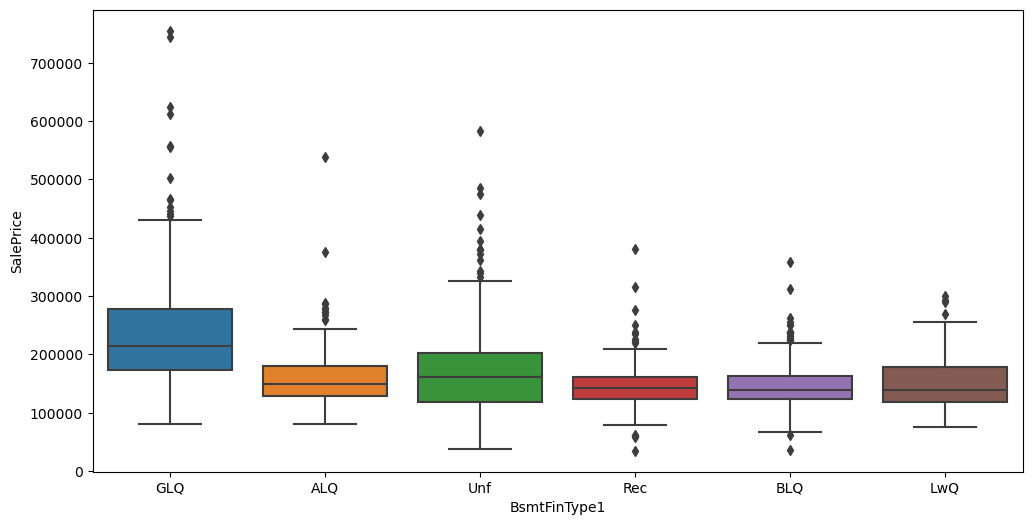

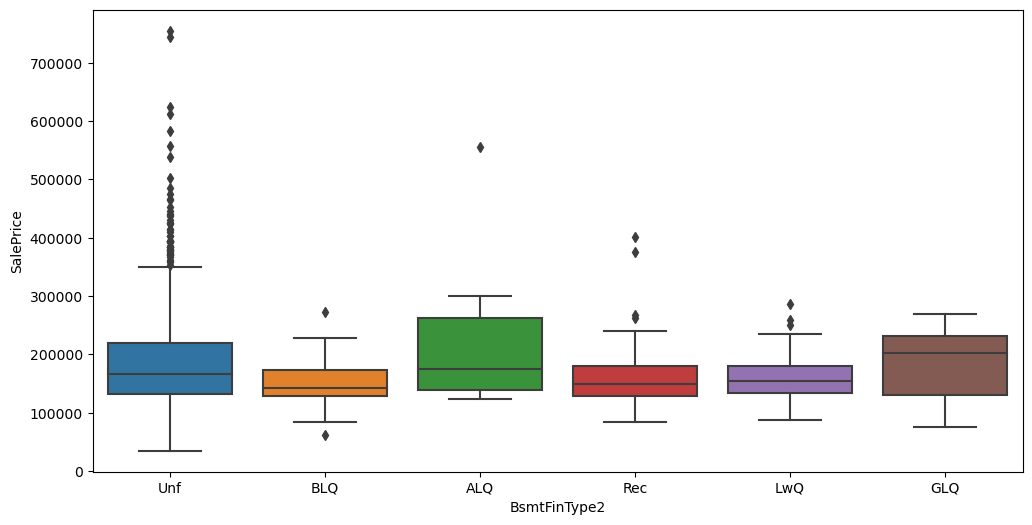

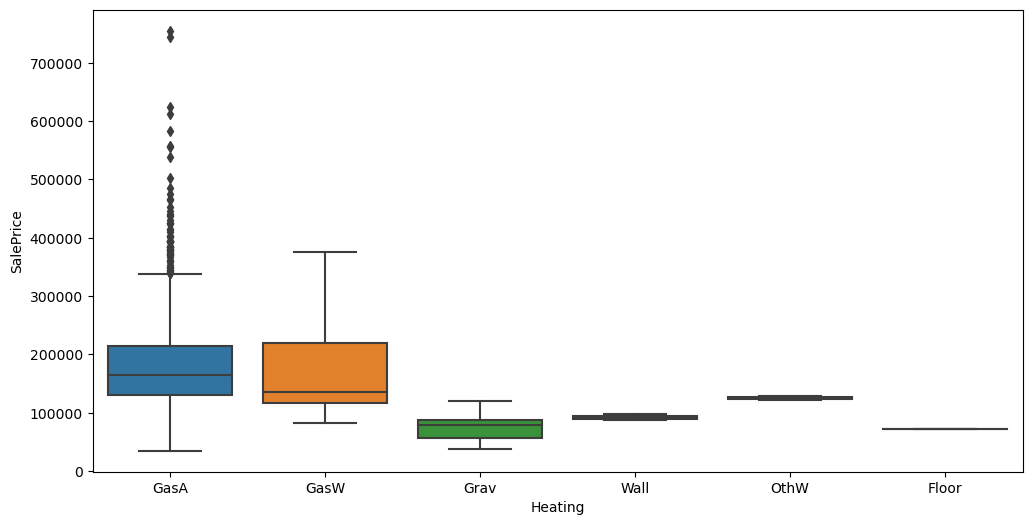

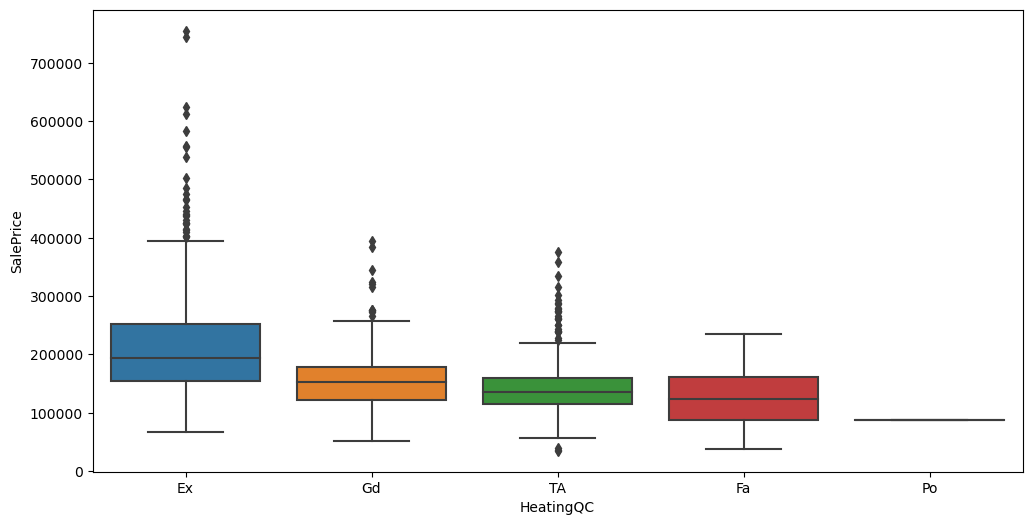

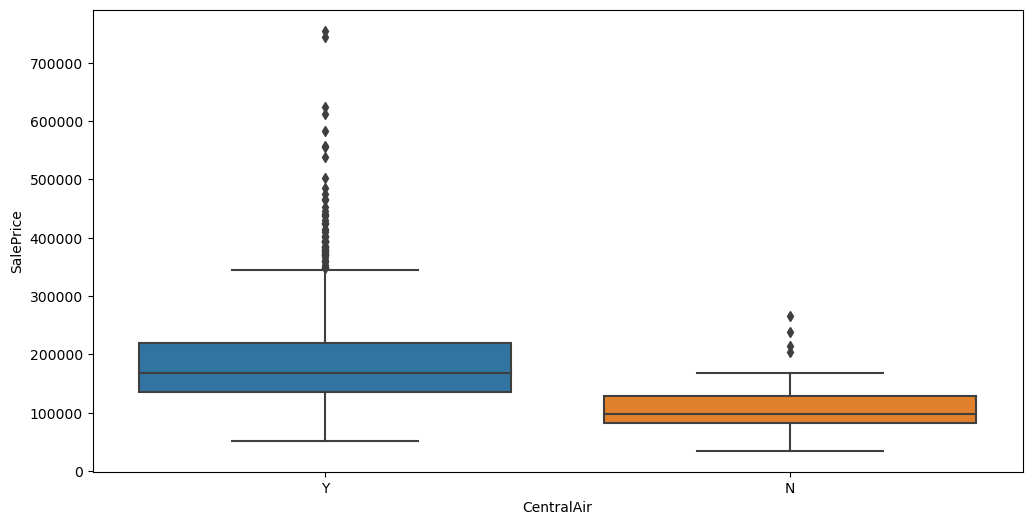

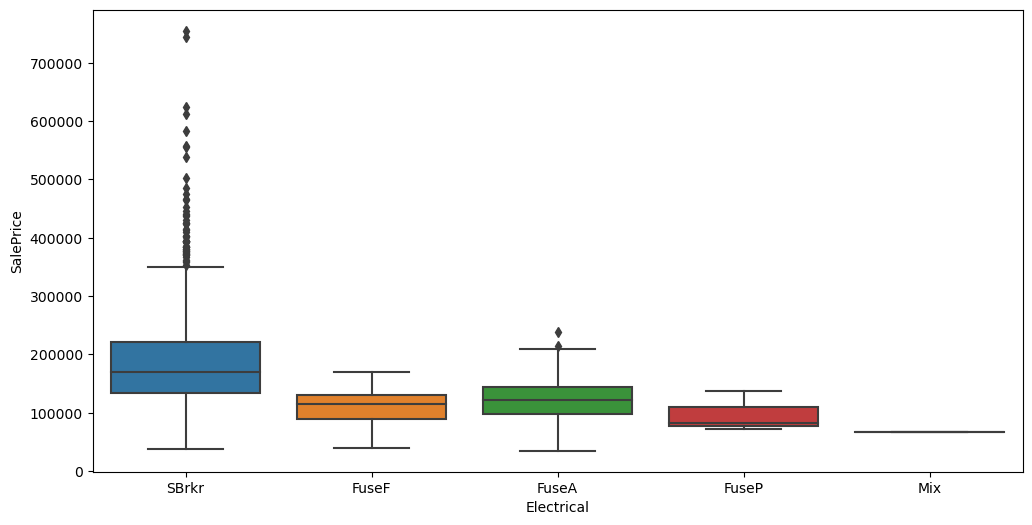

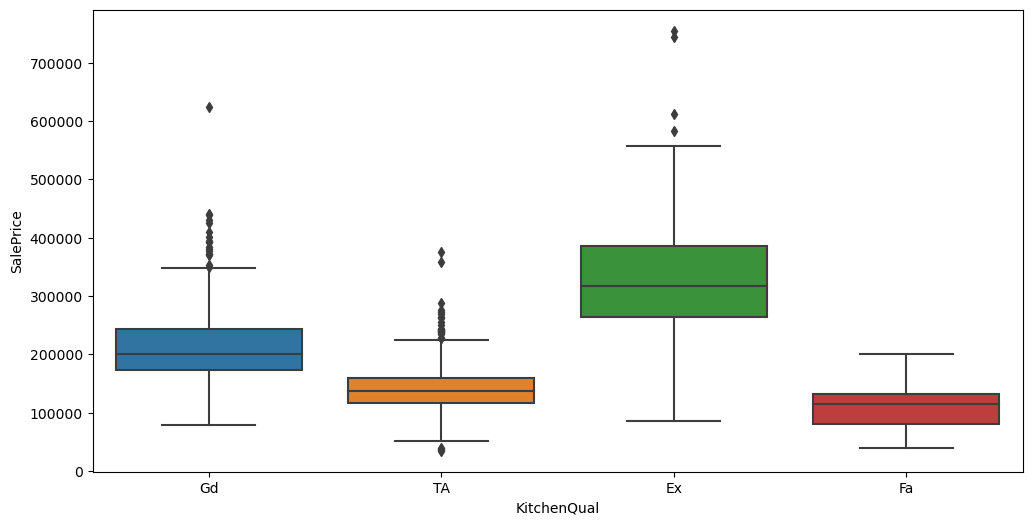

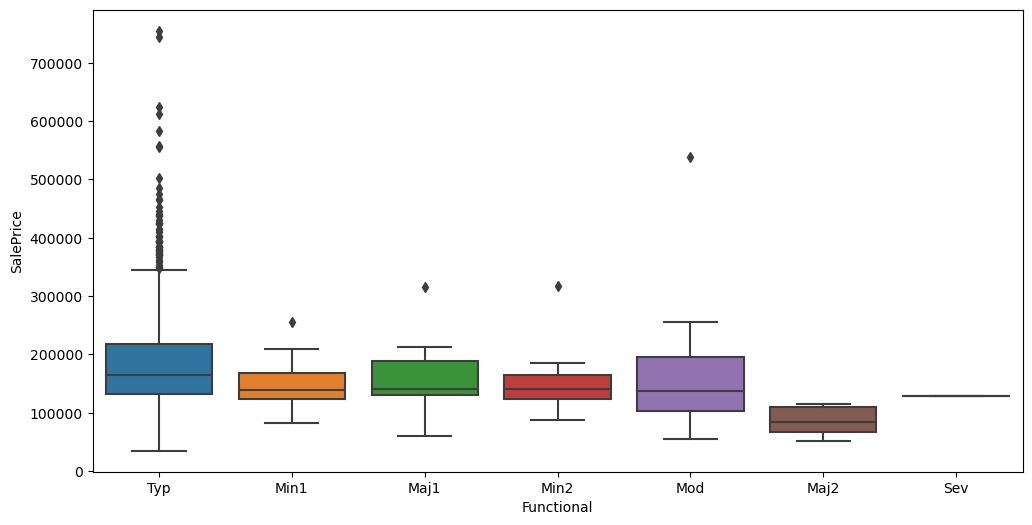

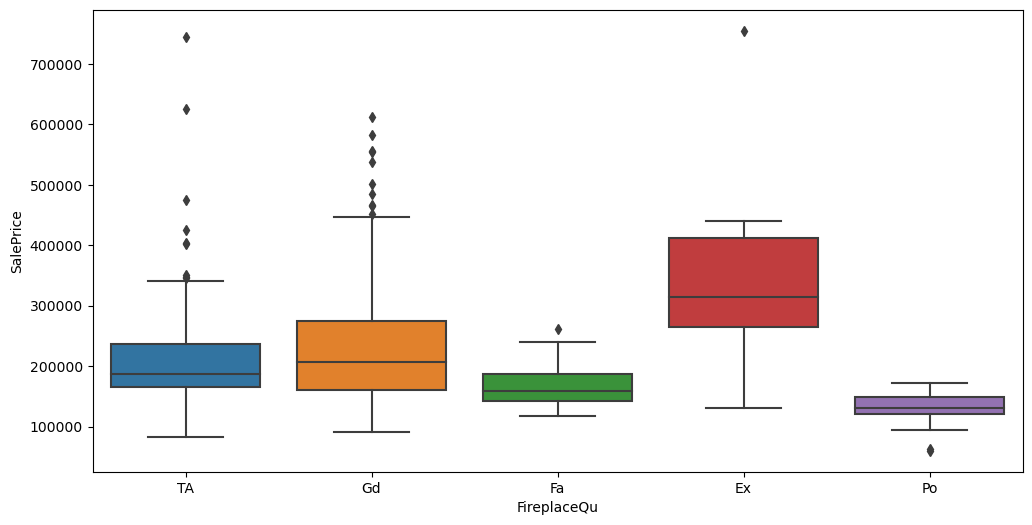

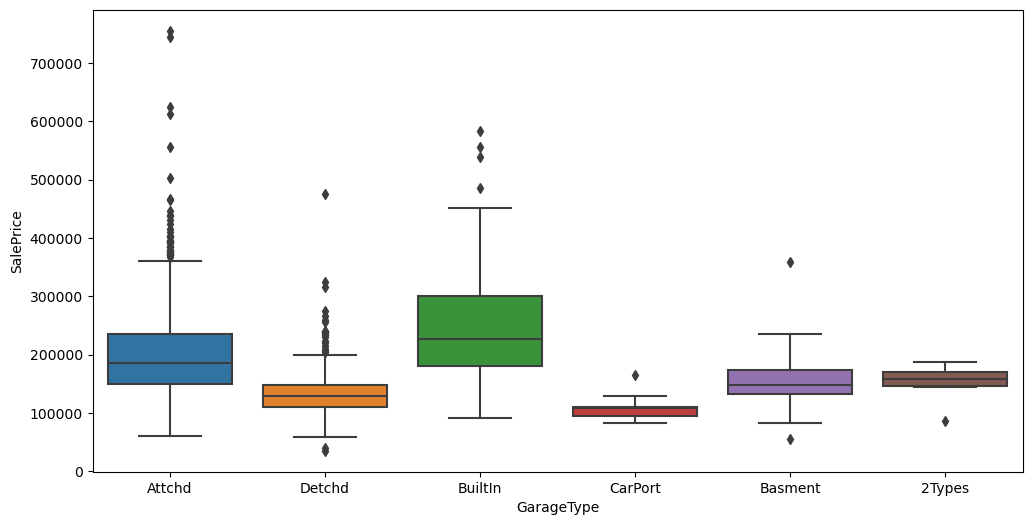

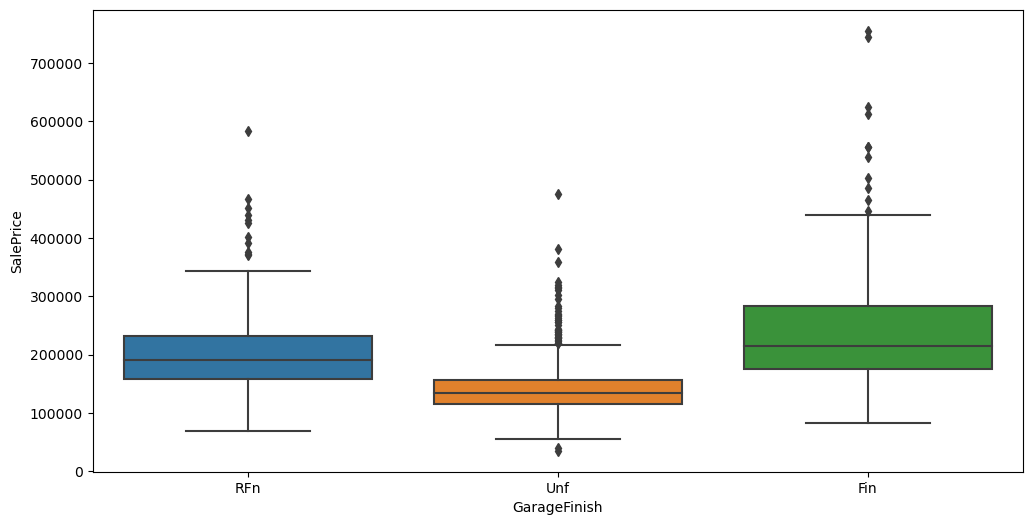

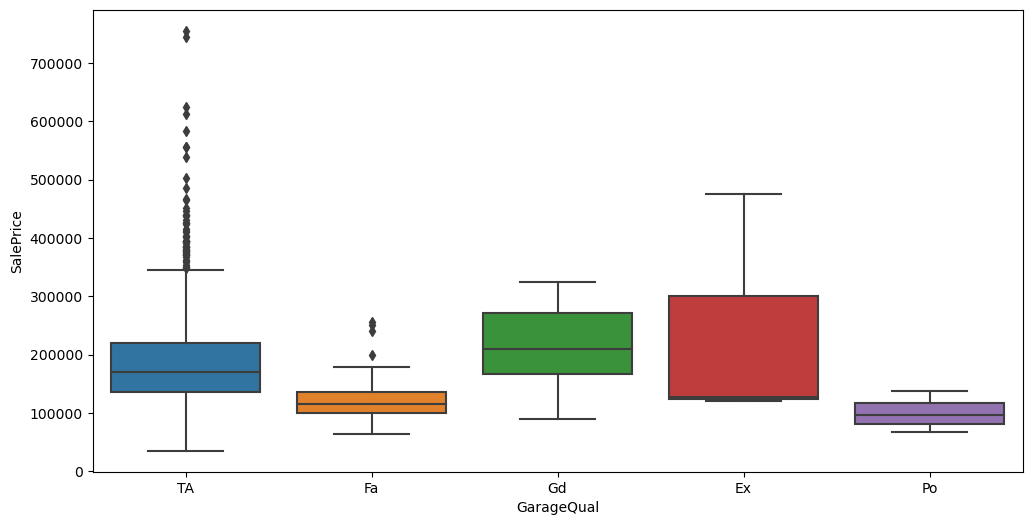

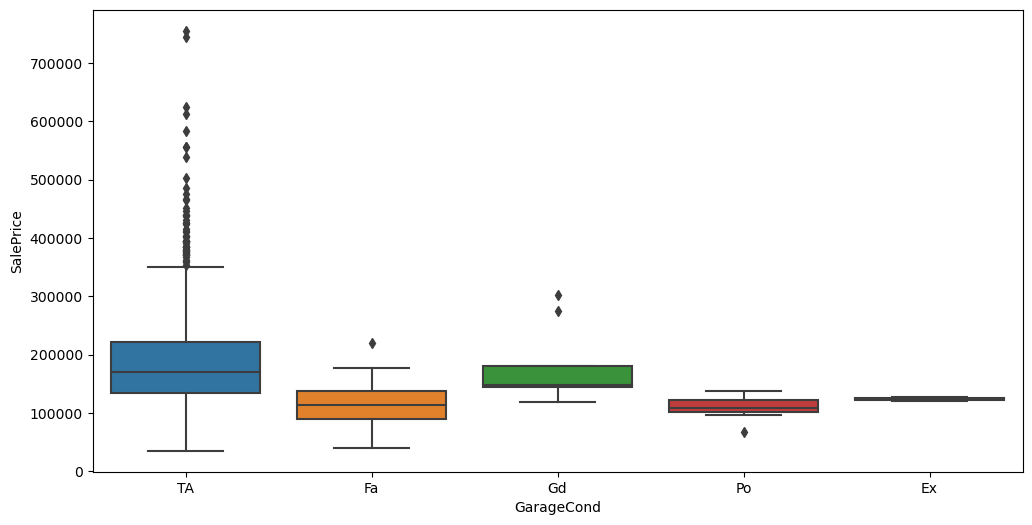

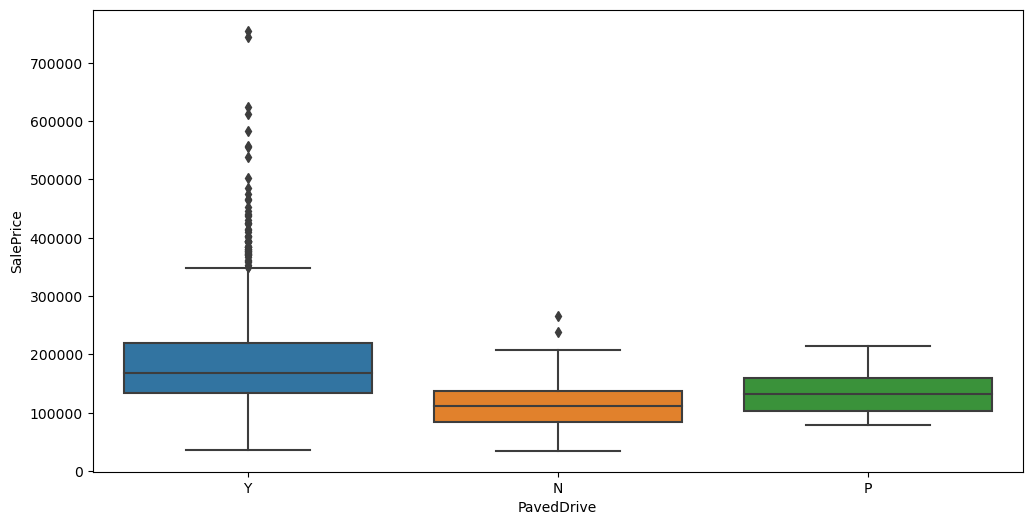

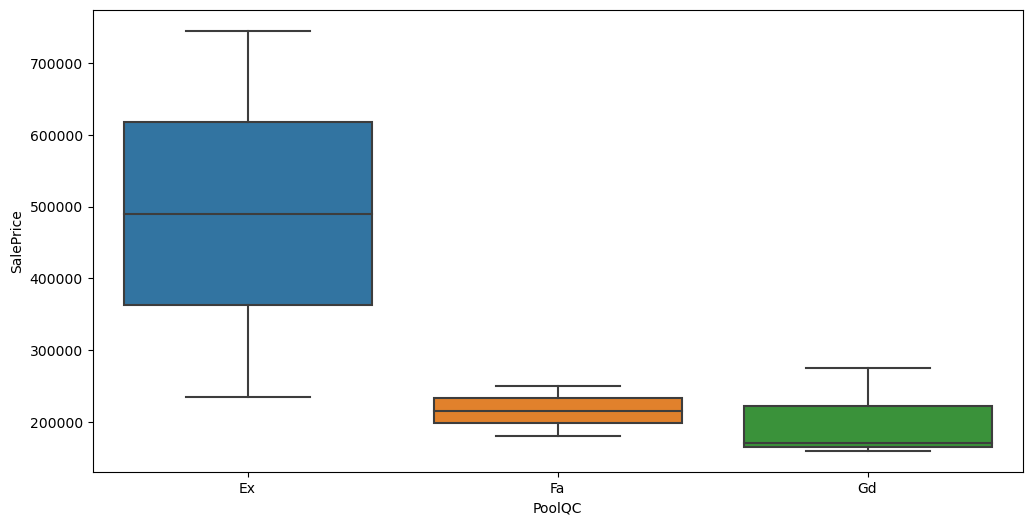

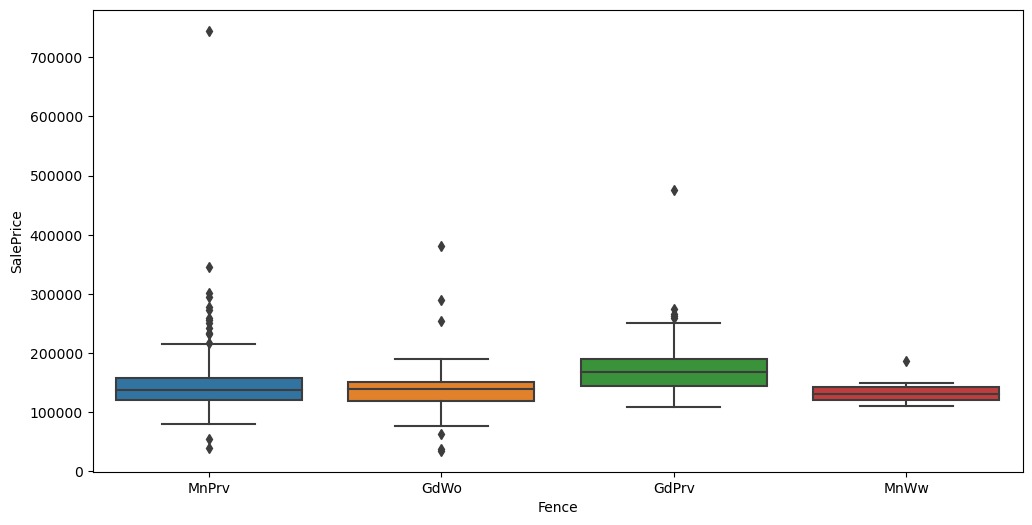

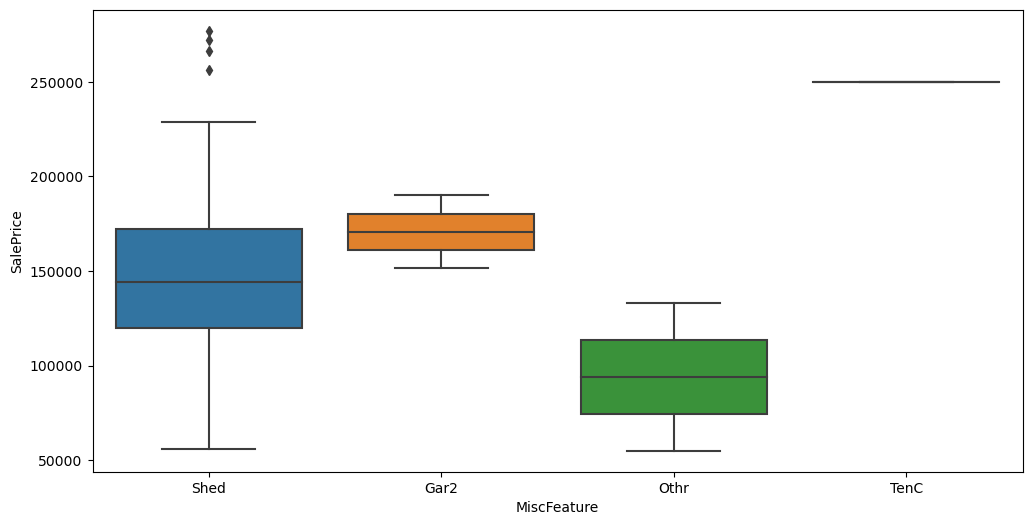

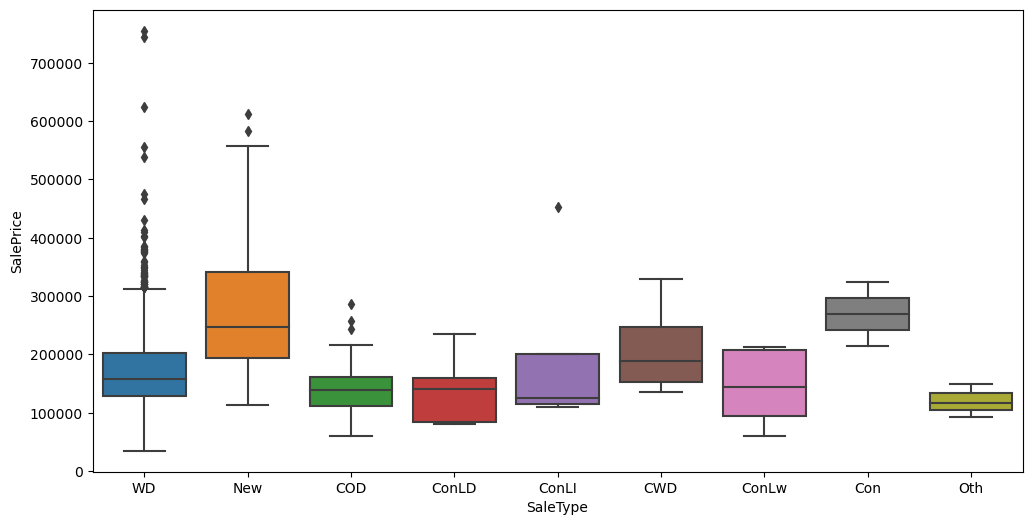

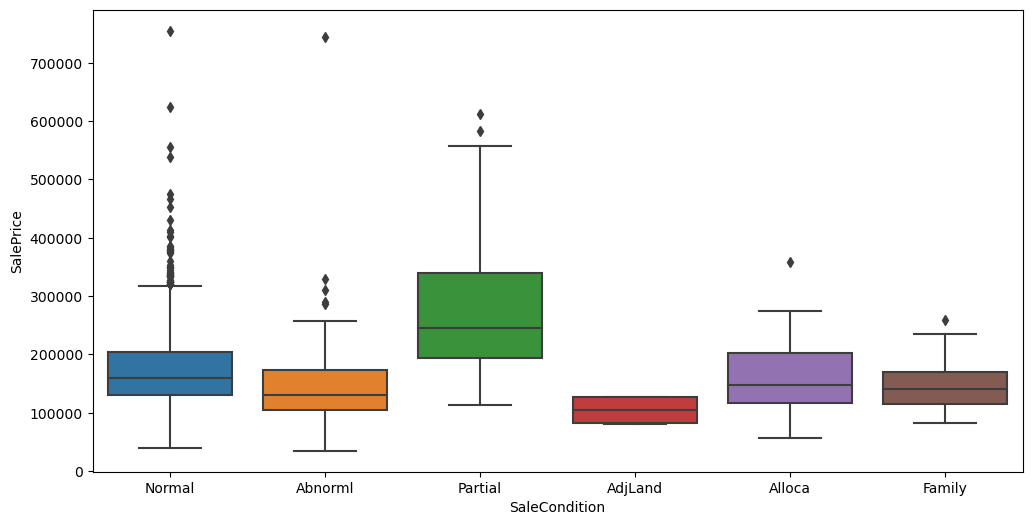

In [21]:
for i in cat:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=i, y='SalePrice')
    plt.show()

### Cat vs Cat Crosstab heatmap

In [22]:
ctab = pd.crosstab(df['ExterQual'], df['ExterCond'])
ctab

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

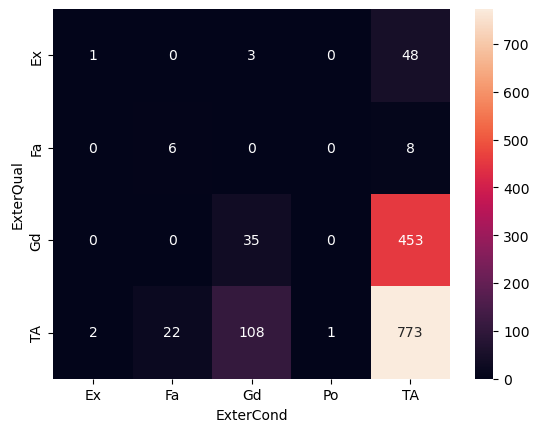

In [23]:
sns.heatmap(ctab, annot=True, fmt='d')

### EDA is completed

### Seperate X and Y (SalePrice)

In [24]:
X = df.drop(columns=['SalePrice'])
Y = df[['SalePrice']]


In [25]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [26]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

### Seperate cat and con features for X

In [27]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [28]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [29]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Create pipeline for feature selection

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [31]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [32]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvail')),
                            ('Ordinal', OrdinalEncoder())])

In [33]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [34]:
X_pre = pre1.fit_transform(X)
X_pre

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0            0.073375         -0.220875     -0.207142          0.651479   
1           -0.872563          0.460320     -0.091886         -0.071836   
2            0.073375         -0.084636      0.073480          0.651479   
3            0.309859         -0.447940     -0.096897          0.651479   
4            0.073375          0.641972      0.375148          1.374795   
...               ...               ...           ...               ...   
1455         0.073375         -0.357114     -0.260560         -0.071836   
1456        -0.872563          0.687385      0.266407         -0.071836   
1457         0.309859         -0.175462     -0.147810          0.651479   
1458        -0.872563         -0.084636     -0.080160         -0.795151   
1459        -0.872563          0.233255     -0.058112         -0.795151   

      num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0            -0.517200        1.050994           0.878668         0.514104   
1             2.179628        0.156734          -0.429577        -0.570750   
2            -0.517200        0.984752           0.830215         0.325915   
3            -0.517200       -1.863632          -0.720298        -0.570750   
4            -0.517200        0.951632           0.733308         1.366489   
...                ...             ...                ...              ...   
1455         -0.517200        0.918511           0.733308        -0.570750   
1456          0.381743        0.222975           0.151865         0.087911   
1457          3.078570       -1.002492           1.024029        -0.570750   
1458          0.381743       -0.704406           0.539493        -0.570750   
1459          0.381743       -0.207594          -0.962566        -0.570750   

      num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  \
0            0.575425        -0.288653  ...              1.0   
1            1.171992        -0.288653  ...              1.0   
2            0.092907        -0.288653  ...              1.0   
3           -0.499274        -0.288653  ...              5.0   
4            0.463568        -0.288653  ...              1.0   
...               ...              ...  ...              ...   
1455        -0.973018        -0.288653  ...              1.0   
1456         0.759659         0.722112  ...              1.0   
1457        -0.369871        -0.288653  ...              1.0   
1458        -0.865548         6.092188  ...              1.0   
1459         0.847389         1.509640  ...              1.0   

      cat__GarageFinish  cat__GarageQual  cat__GarageCond  cat__PavedDrive  \
0                   2.0              5.0              5.0              2.0   
1                   2.0              5.0              5.0              2.0   
2                   2.0              5.0              5.0              2.0   
3                   3.0              5.0              5.0              2.0   
4                   2.0              5.0              5.0              2.0   
...                 ...              ...              ...              ...   
1455                2.0              5.0              5.0              2.0   
1456                3.0              5.0              5.0              2.0   
1457                2.0              5.0              5.0              2.0   
1458                3.0              5.0              5.0              2.0   
1459                0.0              5.0              5.0              2.0   

      cat__PoolQC  cat__Fence  cat__MiscFeature  cat__SaleType  \
0             3.0         4.0               1.0            8.0   
1             3.0         4.0               1.0            8.0   
2             3.0         4.0               1.0            8.0   
3             3.0         4.0               1.0            8.0   
4             3.0         4.0               1.0            8.0   
...           ...         ...               ...            ...   


### Sequential Feature selection

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

### Backward selection

In [36]:
lr = LinearRegression()
sel = SequentialFeatureSelector(lr, direction='backward')
sel_feat = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__BsmtHalfBath', 'num__KitchenAbvGr', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold',
       'cat__LandContour', 'cat__Neighborhood', 'cat__BldgType',
       'cat__HouseStyle', 'cat__RoofStyle', 'cat__RoofMatl',
       'cat__MasVnrType', 'cat__ExterQual', 'cat__Foundation',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__BsmtFinType1', 'cat__KitchenQual', 'cat__Functional',
       'cat__GarageFinish', 'cat__PavedDrive', 'cat__MiscFeature',
       'cat__SaleCondition'], dtype=object)

In [37]:
len(sel_cols)

40

In [38]:
sel_cols[0]

'num__MSSubClass'

In [39]:
sel_cols[0].split('__')

['num', 'MSSubClass']

In [40]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [41]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)


In [42]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [43]:
X_sel = X[imp_cols]

In [44]:
X_sel

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0             60     8450            7            5       2003       196.0   
1             20     9600            6            8       1976         0.0   
2             60    11250            7            5       2001       162.0   
3             70     9550            7            5       1915         0.0   
4             60    14260            8            5       2000       350.0   
...          ...      ...          ...          ...        ...         ...   
1455          60     7917            6            5       1999         0.0   
1456          20    13175            6            6       1978       119.0   
1457          70     9042            7            9       1941         0.0   
1458          20     9717            5            6       1950         0.0   
1459          20     9937            5            6       1965         0.0   

      BsmtFinSF2  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  BsmtQual  BsmtCond  \
0              0       856       854             0  ...        Gd        TA   
1              0      1262         0             0  ...        Gd        TA   
2              0       920       866             0  ...        Gd        TA   
3              0       961       756             0  ...        TA        Gd   
4              0      1145      1053             0  ...        Gd        TA   
...          ...       ...       ...           ...  ...       ...       ...   
1455           0       953       694             0  ...        Gd        TA   
1456         163      2073         0             0  ...        Gd        TA   
1457           0      1188      1152             0  ...        TA        Gd   
1458        1029      1078         0             0  ...        TA        TA   
1459         290      1256         0             0  ...        TA        TA   

      BsmtExposure  BsmtFinType1  KitchenQual  Functional  GarageFinish  \
0               No           GLQ           Gd         Typ           RFn   
1               Gd           ALQ           TA         Typ           RFn   
2               Mn           GLQ           Gd         Typ           RFn   
3               No           ALQ           Gd         Typ           Unf   
4               Av           GLQ           Gd         Typ           RFn   
...            ...           ...          ...         ...           ...   
1455            No           Unf           TA         Typ           RFn   
1456            No           ALQ           TA        Min1           Unf   
1457            No           GLQ           Gd         Typ           RFn   
1458            Mn           GLQ           Gd         Typ           Unf   
1459            No           BLQ           TA         Typ           Fin   

      PavedDrive  MiscFeature  SaleCondition  
0              Y          NaN         Normal  
1              Y          NaN         Normal  
2              Y          NaN         Normal  
3              Y          NaN        Abnorml  
4              Y          NaN         Normal  
...          ...          ...            ...  
1455           Y          NaN         Normal  
1456           Y          NaN         Normal  
1457           Y         Shed         Normal  
1458           Y          NaN         Normal  
1459           Y          NaN         Normal  

[1460 rows x 40 columns]

### Seperate categorical and continuous features for selected columns

In [45]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [46]:
cat_sel

['LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'PavedDrive',
 'MiscFeature',
 'SaleCondition']

In [47]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

### Create final pipeline

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [50]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='NotAvail')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [51]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [52]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
0        1.050994         0.514104        -0.288653      -0.793434   
1        0.156734        -0.570750        -0.288653       0.257140   
2        0.984752         0.325915        -0.288653      -0.627826   
3       -1.863632        -0.570750        -0.288653      -0.521734   
4        0.951632         1.366489        -0.288653      -0.045611   

   num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
0       1.161852          -0.120242  ...                        1.0   
1      -0.795163          -0.120242  ...                        1.0   
2       1.189351          -0.120242  ...                        1.0   
3       0.937276          -0.120242  ...                        1.0   
4       1.617877          -0.120242  ...                        1.0   

   cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         1.0                         0.0   
4                         0.0                         0.0   

   cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   cat__SaleCondition_Normal  cat__SaleCondition_Partial  
0                        1.0                         0.0  
1                        1.0                         0.0  
2                        1.0                         0.0  
3                        0.0                         0.0  
4                        1.0                         0.0  

[5 rows x 143 columns]

In [53]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF...
                                                  SimpleImputer(fill_value='NotAvail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Neighborhood', 'BldgType',
                                  'HouseStyle', 'RoofStyle', 'RoofMatl',
                                  'MasVnrType', 'ExterQual', 'Foundation',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType1', 'KitchenQual', 'Functional',
                                  'GarageFinish', 'PavedDrive', 'MiscFeature',
                                  'SaleCondition'])])

### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [55]:
xtrain.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
710         -0.636078     -0.640101         -2.241782          0.381743   
1098        -0.163109     -0.452686         -1.518467          0.381743   
1286        -0.872563     -0.072844         -0.071836         -0.517200   
992          0.073375     -0.075851         -0.071836          2.179628   
631          1.492282     -0.593999          1.374795         -0.517200   

      num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
710        -1.201217        -0.570750        -0.288653      -1.122062   
1098       -1.168096        -0.570750        -0.288653      -1.049608   
1286       -0.273836         1.925521         0.213629       0.427923   
992        -0.240715         1.311140         0.436865      -0.369064   
631         1.150356         0.027027        -0.288653       1.012726   

      num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
710       -0.795163          -0.120242  ...                        1.0   
1098       0.504166          -0.120242  ...                        1.0   
1286      -0.795163          -0.120242  ...                        1.0   
992        1.109145          -0.120242  ...                        1.0   
631       -0.795163          -0.120242  ...                        1.0   

      cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
710                     0.0                    0.0                    0.0   
1098                    0.0                    0.0                    0.0   
1286                    0.0                    0.0                    0.0   
992                     0.0                    0.0                    0.0   
631                     0.0                    0.0                    0.0   

      cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
710                          0.0                         0.0   
1098                         0.0                         0.0   
1286                         0.0                         0.0   
992                          0.0                         0.0   
631                          0.0                         0.0   

      cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
710                         0.0                        0.0   
1098                        0.0                        0.0   
1286                        0.0                        0.0   
992                         0.0                        0.0   
631                         0.0                        0.0   

      cat__SaleCondition_Normal  cat__SaleCondition_Partial  
710                         1.0                         0.0  
1098                        1.0                         0.0  
1286                        1.0                         0.0  
992                         1.0                         0.0  
631                         1.0                         0.0  

[5 rows x 143 columns]

In [56]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [57]:
xtest.head()

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
880         -0.872563     -0.350058         -0.795151         -0.517200   
605          0.073375      0.309002          0.651479          0.381743   
1166        -0.872563     -0.004192          1.374795         -0.517200   
216         -0.872563     -0.207142          0.651479         -0.517200   
970         -0.163109      0.028380         -1.518467         -1.416142   

      num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
880         1.117235        -0.570750        -0.288653      -0.187930   
605        -0.207594         0.403405        -0.288653       0.060481   
1166        1.216598        -0.172232        -0.288653       1.374993   
216         1.084115         0.901552        -0.288653       0.707387   
970        -0.737526        -0.570750        -0.288653      -1.145350   

      num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
880       -0.795163          -0.120242  ...                        1.0   
605        1.038106          -0.120242  ...                        1.0   
1166      -0.795163          -0.120242  ...                        1.0   
216       -0.795163          -0.120242  ...                        1.0   
970        0.286466          -0.120242  ...                        1.0   

      cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
880                     0.0                    0.0                    0.0   
605                     0.0                    0.0                    0.0   
1166                    0.0                    0.0                    0.0   
216                     0.0                    0.0                    0.0   
970                     0.0                    0.0                    0.0   

      cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
880                          0.0                         0.0   
605                          0.0                         0.0   
1166                         0.0                         0.0   
216                          0.0                         0.0   
970                          1.0                         0.0   

      cat__SaleCondition_Alloca  cat__SaleCondition_Family  \
880                         0.0                        0.0   
605                         0.0                        0.0   
1166                        0.0                        0.0   
216                         0.0                        0.0   
970                         0.0                        0.0   

      cat__SaleCondition_Normal  cat__SaleCondition_Partial  
880                         1.0                         0.0  
605                         1.0                         0.0  
1166                        1.0                         0.0  
216                         1.0                         0.0  
970                         0.0                         0.0  

[5 rows x 143 columns]

In [58]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

### Model building

In [59]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [60]:
model.score(xtrain, ytrain)

0.9208830274649417

In [61]:
model.score(xtest, ytest)

0.8243010582746068

### Check MSE, RMSE, MAE, R2

In [62]:
from catconfuction import evaluate_model

In [63]:
evaluate_model(xtrain, ytrain, model)

Mean Squared Error : 489649050.50
Root Mean Squared Error : 22128.02
Mean Absolute Error : 15133.94
R2 Score : 0.9209


In [64]:
evaluate_model(xtest, ytest, model)

Mean Squared Error : 1190766543.17
Root Mean Squared Error : 34507.49
Mean Absolute Error : 17169.40
R2 Score : 0.8243


### Creating and tuning Ridge model

In [65]:
import numpy as np

In [66]:
params = {'alpha':np.arange(0.1, 100, 0.1)}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
gscv1 = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [68]:
gscv1.best_params_

{'alpha': 14.9}

In [69]:
gscv1.best_score_

-947237518.53174

In [70]:
best_ridge = gscv1.best_estimator_
best_ridge

Ridge(alpha=14.9)

In [71]:
best_ridge.score(xtrain, ytrain)

0.8874823168218656

In [72]:
best_ridge.score(xtest, ytest)

0.8353764493787093

In [73]:
evaluate_model(xtrain, ytrain, best_ridge)

Mean Squared Error : 696363561.03
Root Mean Squared Error : 26388.70
Mean Absolute Error : 16003.05
R2 Score : 0.8875


In [74]:
evaluate_model(xtest, ytest, best_ridge)

Mean Squared Error : 1115705162.32
Root Mean Squared Error : 33402.17
Mean Absolute Error : 17208.75
R2 Score : 0.8354


### Hyperparameter tuning lasso model

In [80]:
from sklearn.linear_model import Lasso
ls = Lasso()
gscv2 = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv2.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [81]:
gscv2.best_params_

{'alpha': 97.0}

In [82]:
gscv2.best_score_

-921507022.9094976

In [83]:
best_lasso = gscv2.best_estimator_
best_lasso

Lasso(alpha=97.0)

In [84]:
best_lasso.score(xtrain, ytrain)

0.9131193227296084

In [85]:
best_lasso.score(xtest, ytest)

0.8291388178795756

In [86]:
evaluate_model(xtrain, ytrain, best_lasso)

Mean Squared Error : 537698040.87
Root Mean Squared Error : 23188.32
Mean Absolute Error : 15494.16
R2 Score : 0.9131


In [87]:
evaluate_model(xtest, ytest, best_lasso)

Mean Squared Error : 1157979537.03
Root Mean Squared Error : 34029.10
Mean Absolute Error : 17052.96
R2 Score : 0.8291


### Ridge model is selected

### Predict results for train and test

In [88]:
ypred_tr = best_ridge.predict(xtrain)
ypred_ts = best_ridge.predict(xtest)

In [89]:
ypred_tr[0:5]

array([[ 62816.98928635],
       [115881.11939917],
       [167975.93099758],
       [225305.63951093],
       [225181.49176841]])

In [90]:
ytrain.head()

SalePrice
710       52000
1098     128000
1286     143000
992      187000
631      209500

In [91]:
ypred_ts[0:5]

array([[169280.71012169],
       [207573.16381026],
       [230568.8706802 ],
       [206124.46089127],
       [ 86159.73383251]])

In [92]:
ytest.head()

SalePrice
880      157000
605      205000
1166     245350
216      210000
970      135000

In [93]:
xtrain.shape

(1168, 143)

### Prediction of out of sample data

In [94]:
xnew = pd.read_csv('sample_set.csv')
xnew

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [95]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF...
                                                  SimpleImputer(fill_value='NotAvail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Neighborhood', 'BldgType',
                                  'HouseStyle', 'RoofStyle', 'RoofMatl',
                                  'MasVnrType', 'ExterQual', 'Foundation',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType1', 'KitchenQual', 'Functional',
                                  'GarageFinish', 'PavedDrive', 'MiscFeature',
                                  'SaleCondition'])])

In [96]:
xnew_pre = pre2.transform(xnew)
xnew_pre

num__MSSubClass  num__LotArea  num__OverallQual  num__OverallCond  \
0           -0.872563      0.110763         -0.795151          0.381743   
1           -0.872563      0.375850         -0.071836          0.381743   
2            0.073375      0.332053         -0.795151         -0.517200   
3            0.073375     -0.054002         -0.071836          0.381743   
4            1.492282     -0.552407          1.374795         -0.517200   
...               ...           ...               ...               ...   
1454         2.438219     -0.859988         -1.518467          1.280685   
1455         2.438219     -0.864197         -1.518467         -0.517200   
1456        -0.872563      0.950423         -0.795151          1.280685   
1457         0.664586     -0.007600         -0.795151         -0.517200   
1458         0.073375     -0.089180          0.651479         -0.517200   

      num__YearBuilt  num__MasVnrArea  num__BsmtFinSF2  num__1stFlrSF  \
0          -0.340077        -0.570750         0.604293      -0.689929   
1          -0.439440         0.027027        -0.288653       0.430511   
2           0.852269        -0.570750        -0.288653      -0.607125   
3           0.885390        -0.460051        -0.288653      -0.612300   
4           0.686666        -0.570750        -0.288653       0.303718   
...              ...              ...              ...            ...   
1454       -0.041991        -0.570750        -0.288653      -1.595596   
1455       -0.041991        -0.570750        -0.288653      -1.595596   
1456       -0.373198        -0.570750        -0.288653       0.158811   
1457        0.686666        -0.570750        -0.288653      -0.498445   
1458        0.719786        -0.050463        -0.288653      -0.431167   

      num__2ndFlrSF  num__LowQualFinSF  ...  cat__MiscFeature_NotAvail  \
0         -0.795163          -0.120242  ...                        1.0   
1         -0.795163          -0.120242  ...                        0.0   
2          0.811239          -0.120242  ...                        1.0   
3          0.758532          -0.120242  ...                        1.0   
4         -0.795163          -0.120242  ...                        1.0   
...             ...                ...  ...                        ...   
1454       0.456043          -0.120242  ...                        1.0   
1455       0.456043          -0.120242  ...                        1.0   
1456      -0.795163          -0.120242  ...                        1.0   
1457      -0.795163          -0.120242  ...                        0.0   
1458       1.505590          -0.120242  ...                        1.0   

      cat__MiscFeature_Othr  cat__MiscFeature_Shed  cat__MiscFeature_TenC  \
0                       0.0                    0.0                    0.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
1454                    0.0                    0.0                    0.0   
1455                    0.0                    0.0                    0.0   
1456                    0.0                    0.0                    0.0   
1457                    0.0                    1.0                    0.0   
1458                    0.0                    0.0                    0.0   

      cat__SaleCondition_Abnorml  cat__SaleCondition_AdjLand  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          .

### Predict the new SalePrice

In [97]:
preds = best_ridge.predict(xnew_pre)
preds

array([[118590.46138067],
       [149193.42358069],
       [174005.2126871 ],
       ...,
       [161107.54980037],
       [113056.88245268],
       [218855.60818426]])

### Save above in dataframe

In [98]:
df_final = xnew[['Id']]
df_final

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [99]:
df_final['SalePrice_pred']=preds

In [100]:
df_final['SalePrice_pred'] = df_final['SalePrice_pred'].apply(round, args=(2,))

In [101]:
df_final

Id  SalePrice_pred
0     1461       118590.46
1     1462       149193.42
2     1463       174005.21
3     1464       183041.13
4     1465       200230.69
...    ...             ...
1454  2915        79130.58
1455  2916        72959.94
1456  2917       161107.55
1457  2918       113056.88
1458  2919       218855.61

[1459 rows x 2 columns]

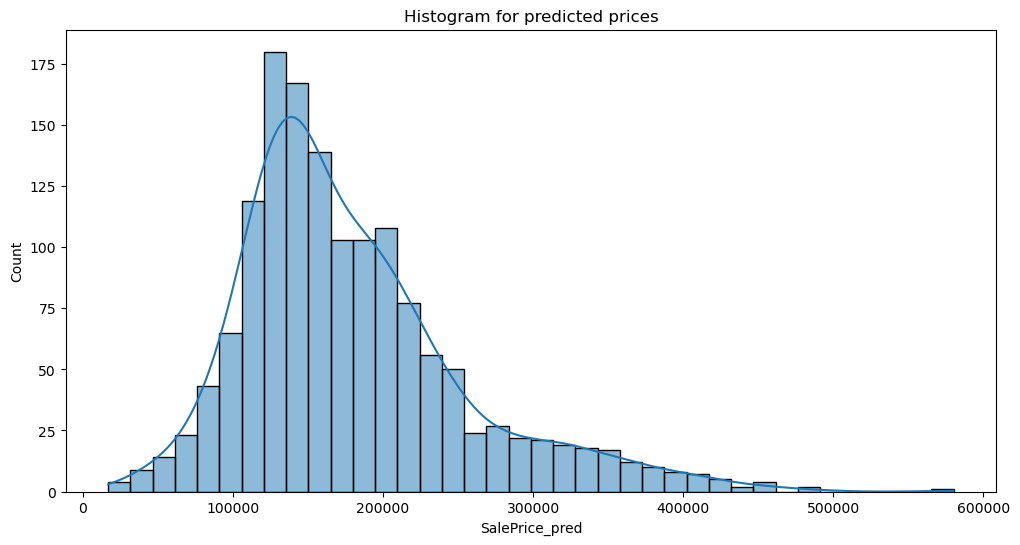

In [102]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_final, x='SalePrice_pred', kde=True)
plt.title('Histogram for predicted prices')
plt.show()

### Saving the df_final to HousePriceResults.csv

In [104]:
df_final.to_csv('HousePriceResults.csv', index=False)